In [1]:
import prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score,mean_absolute_percentage_error
import matplotlib.dates as mdates

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
com=5
commidity=['Bread (pita)', 'Rice (imported)', 'Oil (vegetable)', 'Pulses', 'Potatoes', 'Eggs', 'Meat (beef)', 'Meat (chicken)', 'Meat (chicken, whole)', 'Meat (lamb)', 'Cheese (white, boiled)', 'Milk (pasteurized)', 'Sugar', 'Oil (olive)', 'Beans (fava, dry)', 'Chickpeas', 'Lentils', 'Apples (red)', 'Bananas', 'Cucumbers', 'Garlic', 'Onions', 'Oranges (big size)', 'Tomatoes', 'Fuel (gas)', 'Fuel (kerosene)', 'Fuel (petrol-gasoline)', 'Bulgur', 'Pasta', 'Wheat flour', 'Fish (tuna, canned)', 'Cheese (picon)', 'Milk (powder)', 'Spinach', 'Salt (iodised)', 'Fuel (diesel)']
chosen_commidity=commidity[com]
chosen_commidity

'Eggs'

22:12:50 - cmdstanpy - INFO - Chain [1] start processing
22:12:50 - cmdstanpy - INFO - Chain [1] done processing


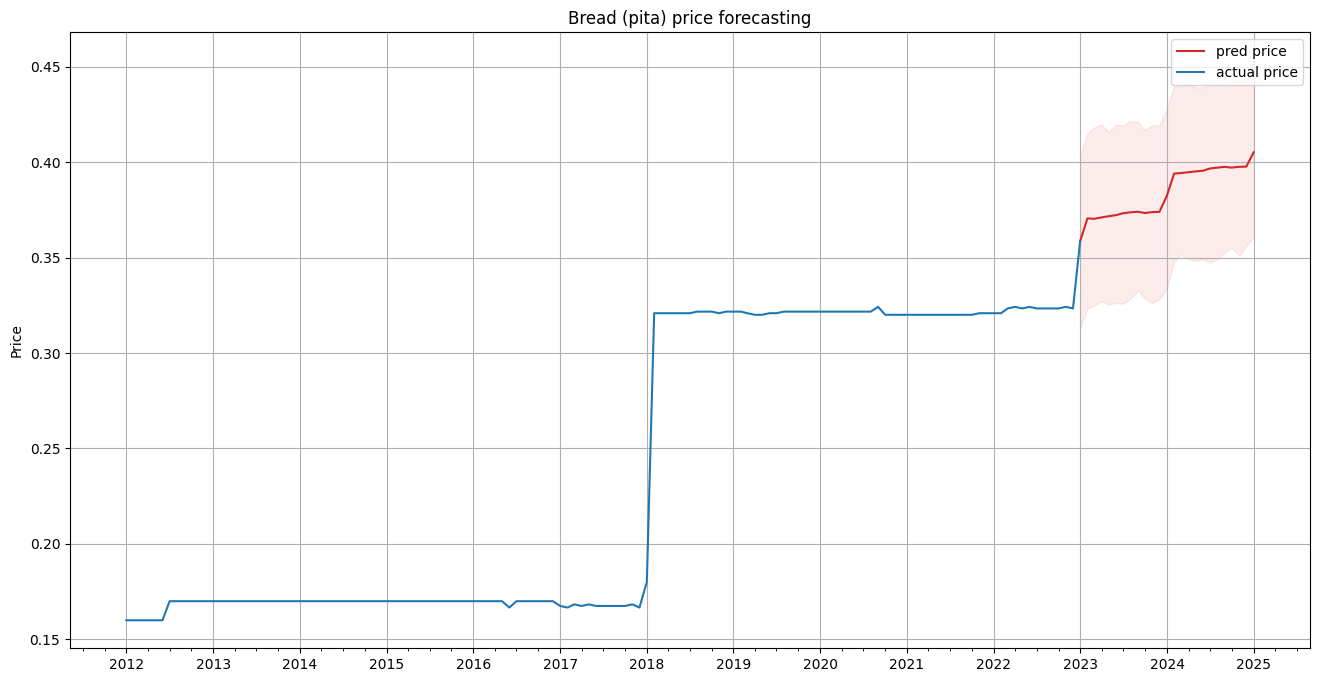

22:12:51 - cmdstanpy - INFO - Chain [1] start processing
22:12:51 - cmdstanpy - INFO - Chain [1] done processing


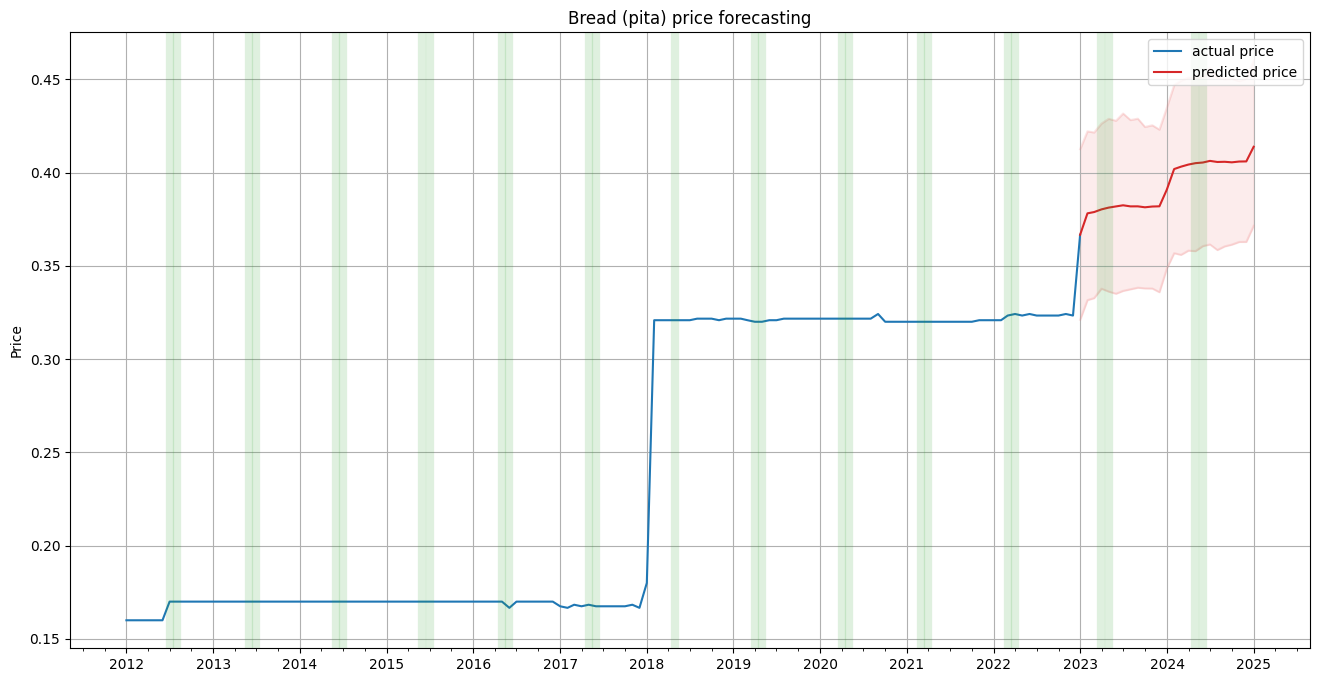

22:12:52 - cmdstanpy - INFO - Chain [1] start processing
22:12:52 - cmdstanpy - INFO - Chain [1] done processing


157


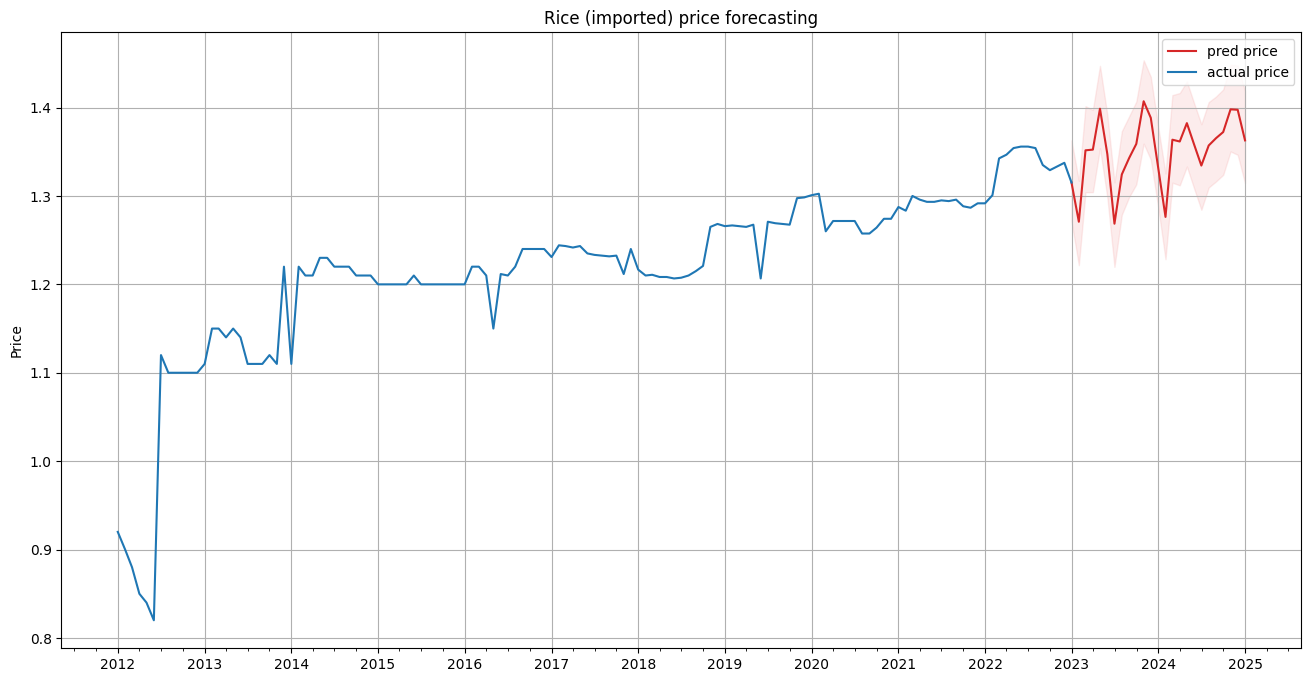

22:12:52 - cmdstanpy - INFO - Chain [1] start processing
22:12:52 - cmdstanpy - INFO - Chain [1] done processing


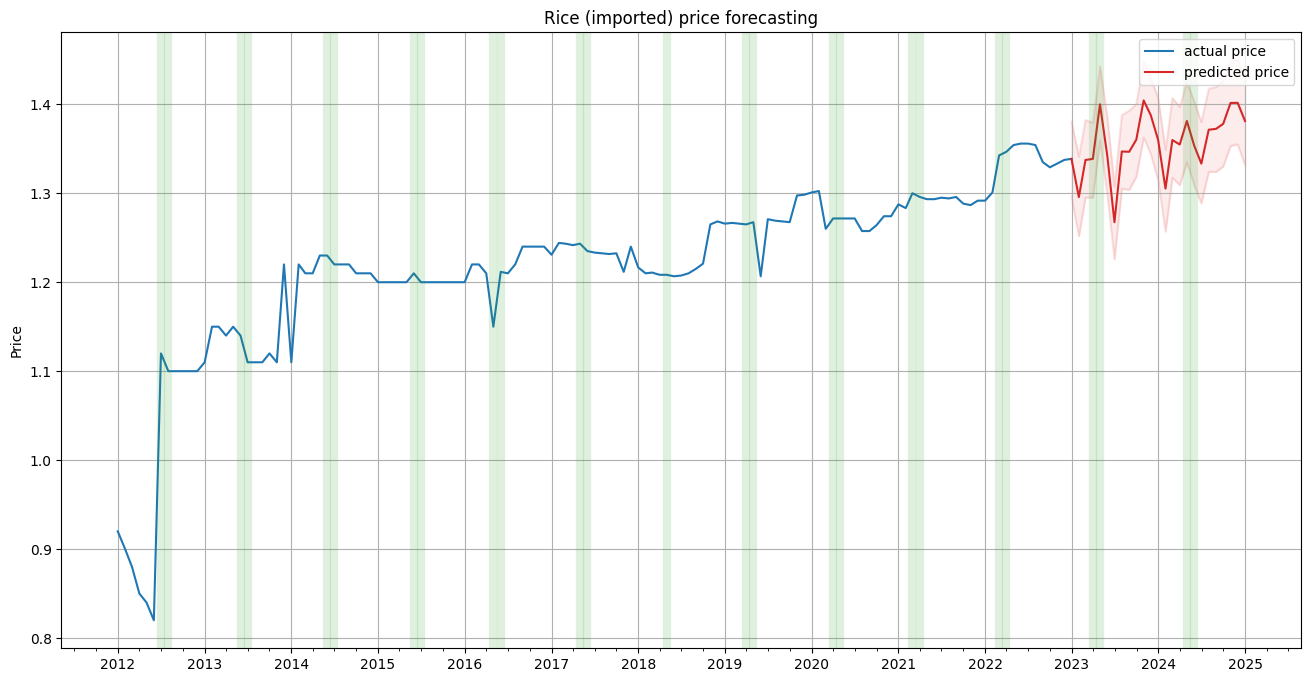

22:12:53 - cmdstanpy - INFO - Chain [1] start processing
22:12:53 - cmdstanpy - INFO - Chain [1] done processing


157


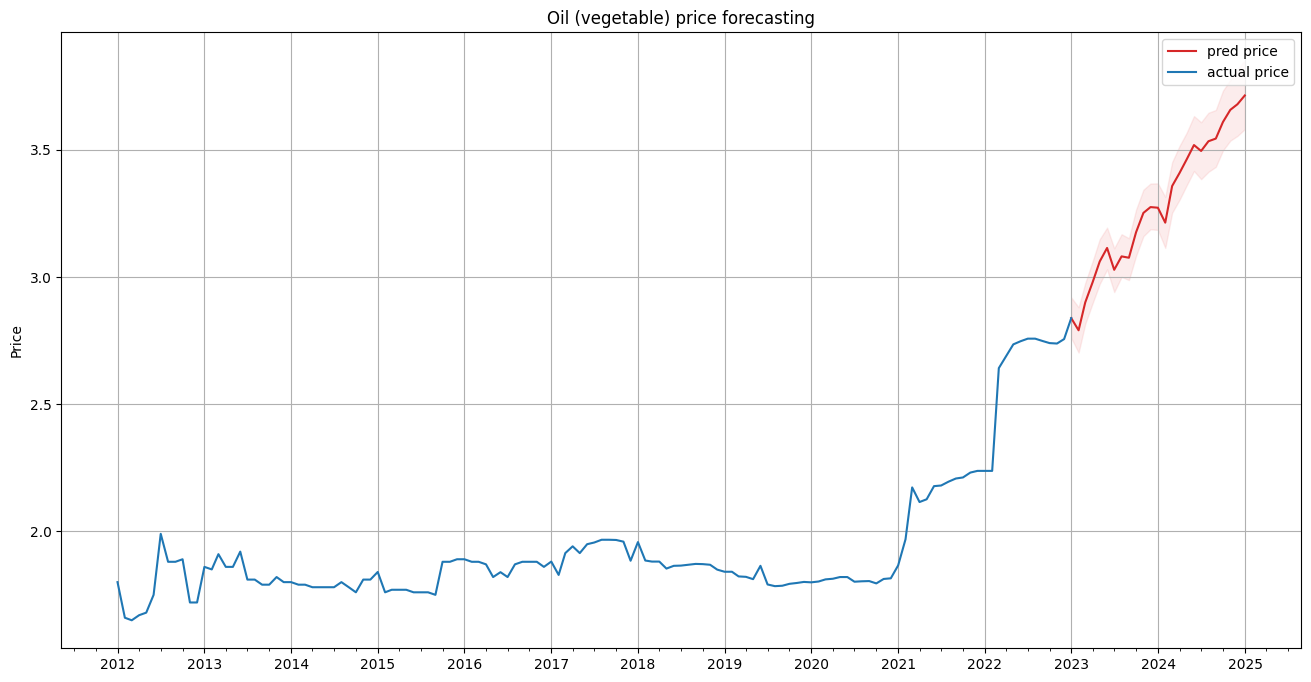

22:12:53 - cmdstanpy - INFO - Chain [1] start processing
22:12:54 - cmdstanpy - INFO - Chain [1] done processing


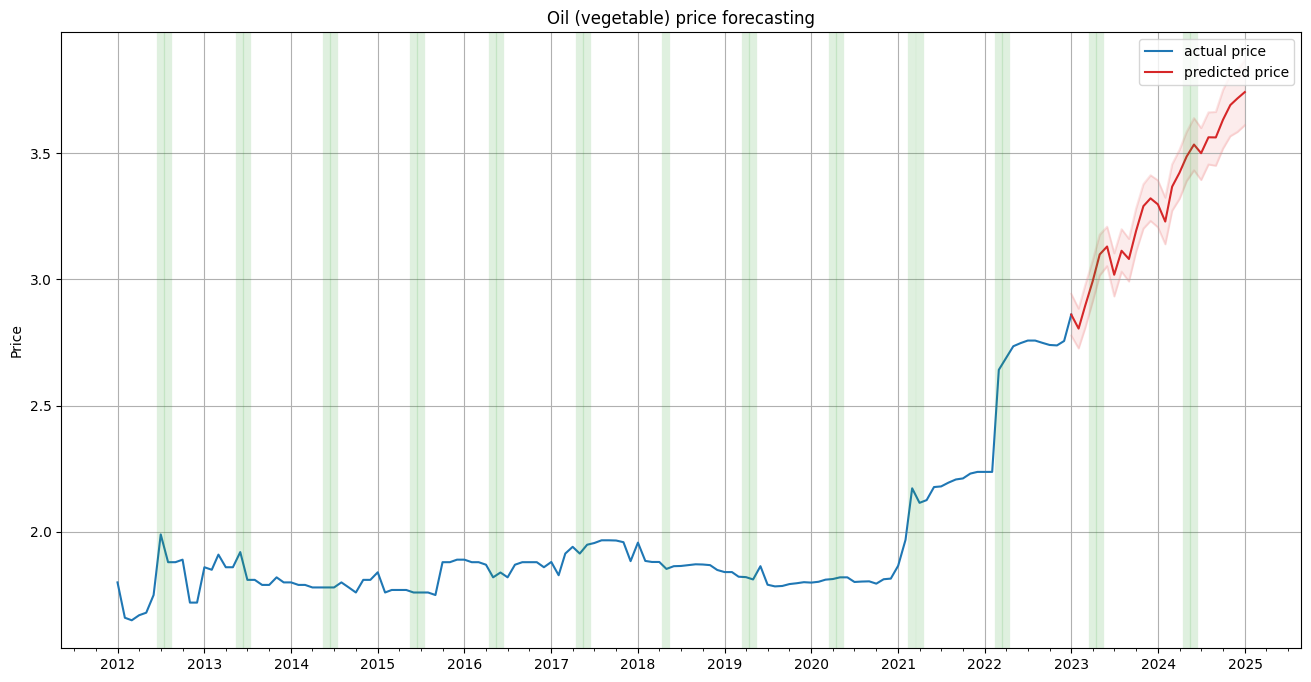

22:12:54 - cmdstanpy - INFO - Chain [1] start processing
22:12:54 - cmdstanpy - INFO - Chain [1] done processing


157


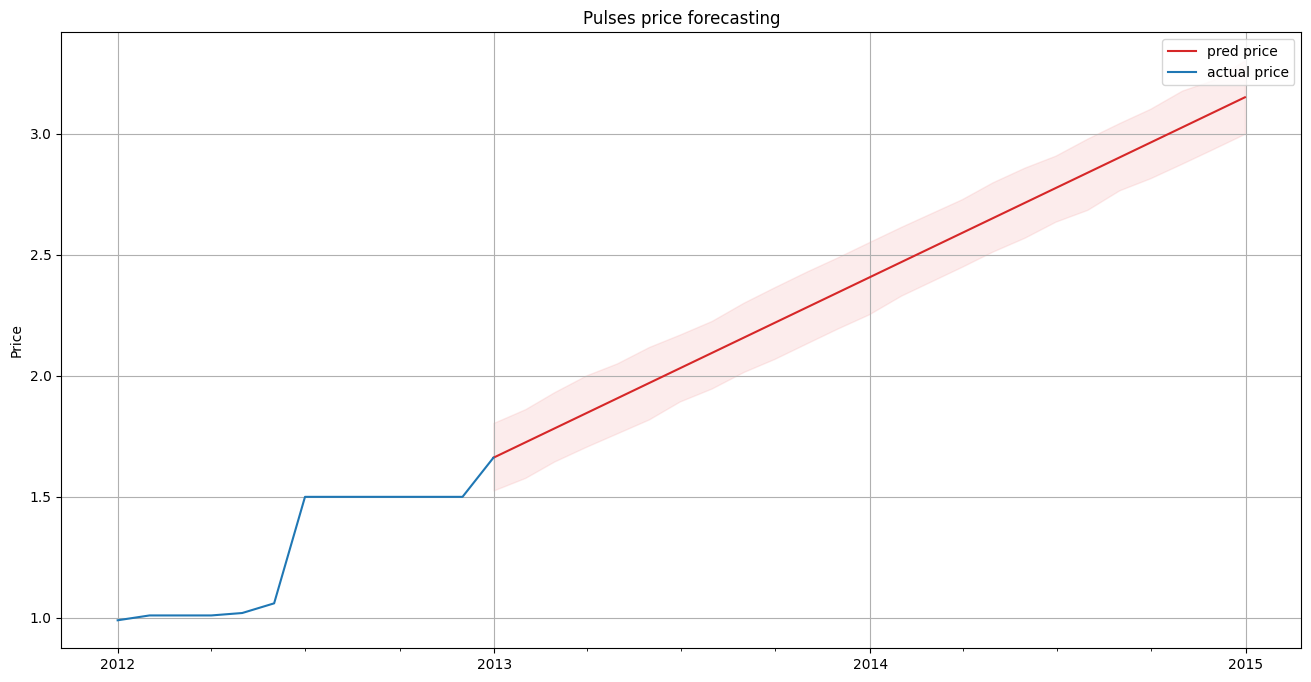

22:12:55 - cmdstanpy - INFO - Chain [1] start processing
22:12:55 - cmdstanpy - INFO - Chain [1] done processing


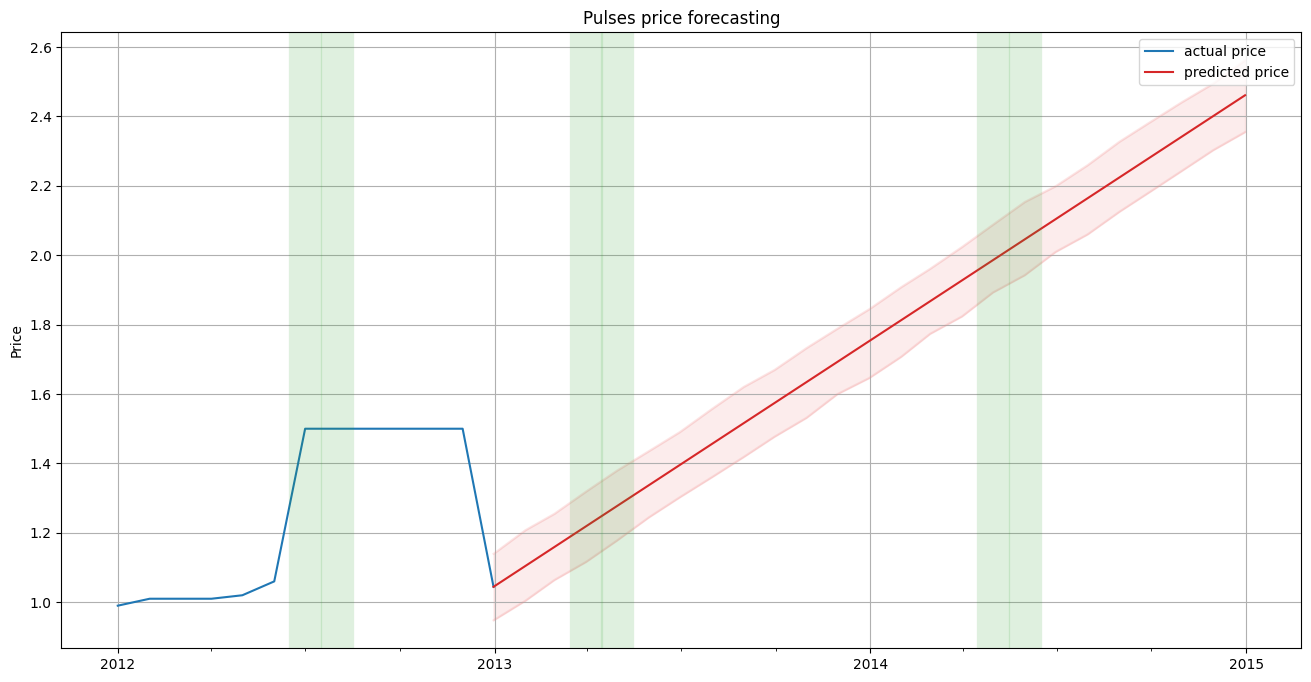

22:12:55 - cmdstanpy - INFO - Chain [1] start processing
22:12:55 - cmdstanpy - INFO - Chain [1] done processing


37


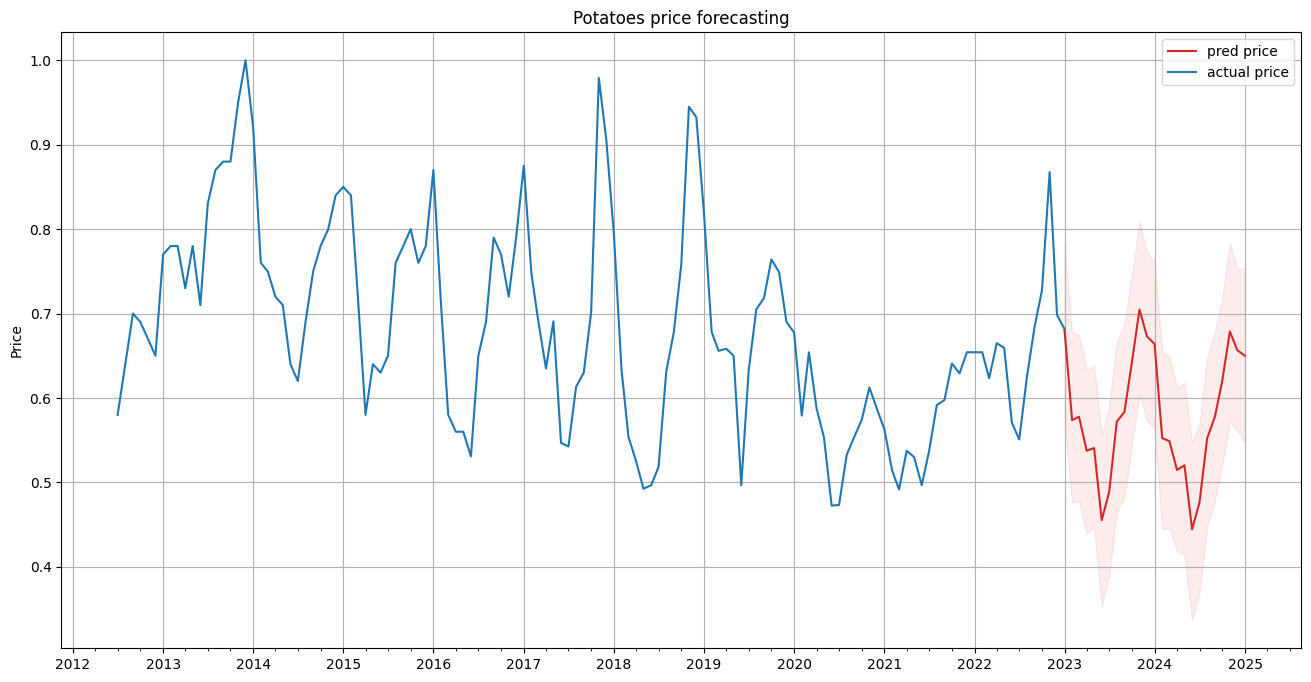

22:12:56 - cmdstanpy - INFO - Chain [1] start processing
22:12:56 - cmdstanpy - INFO - Chain [1] done processing


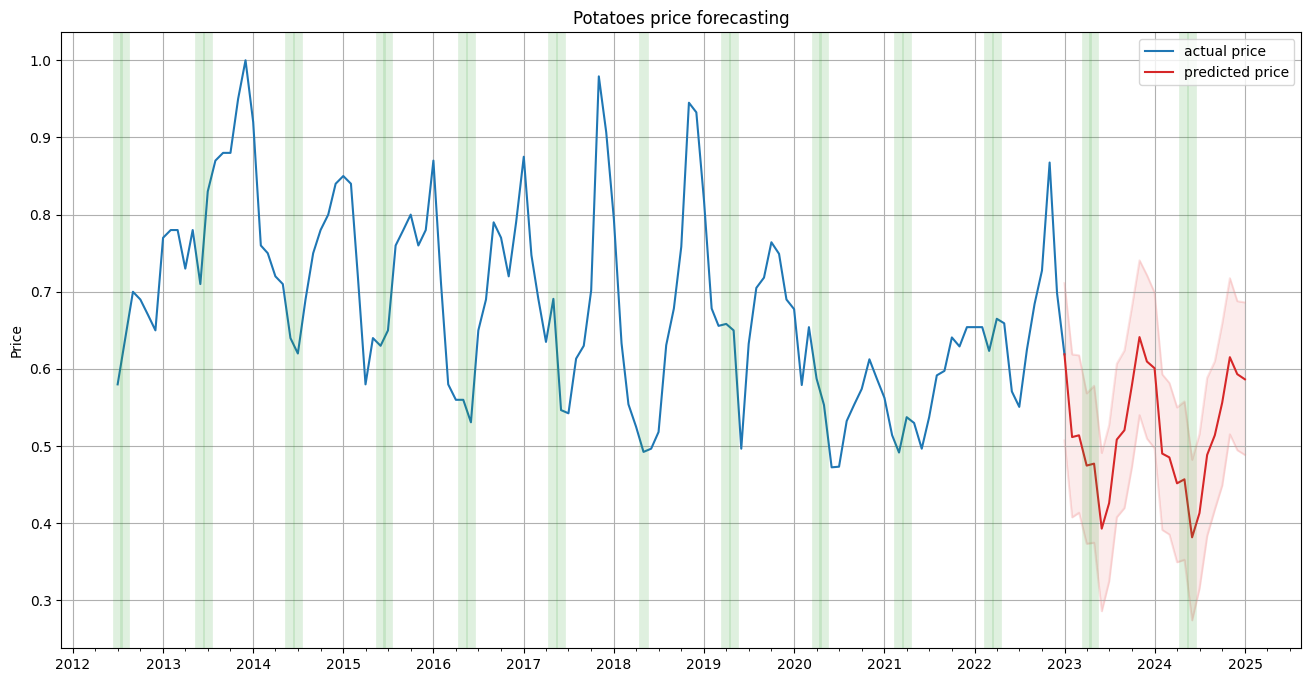

22:12:57 - cmdstanpy - INFO - Chain [1] start processing
22:12:57 - cmdstanpy - INFO - Chain [1] done processing


151


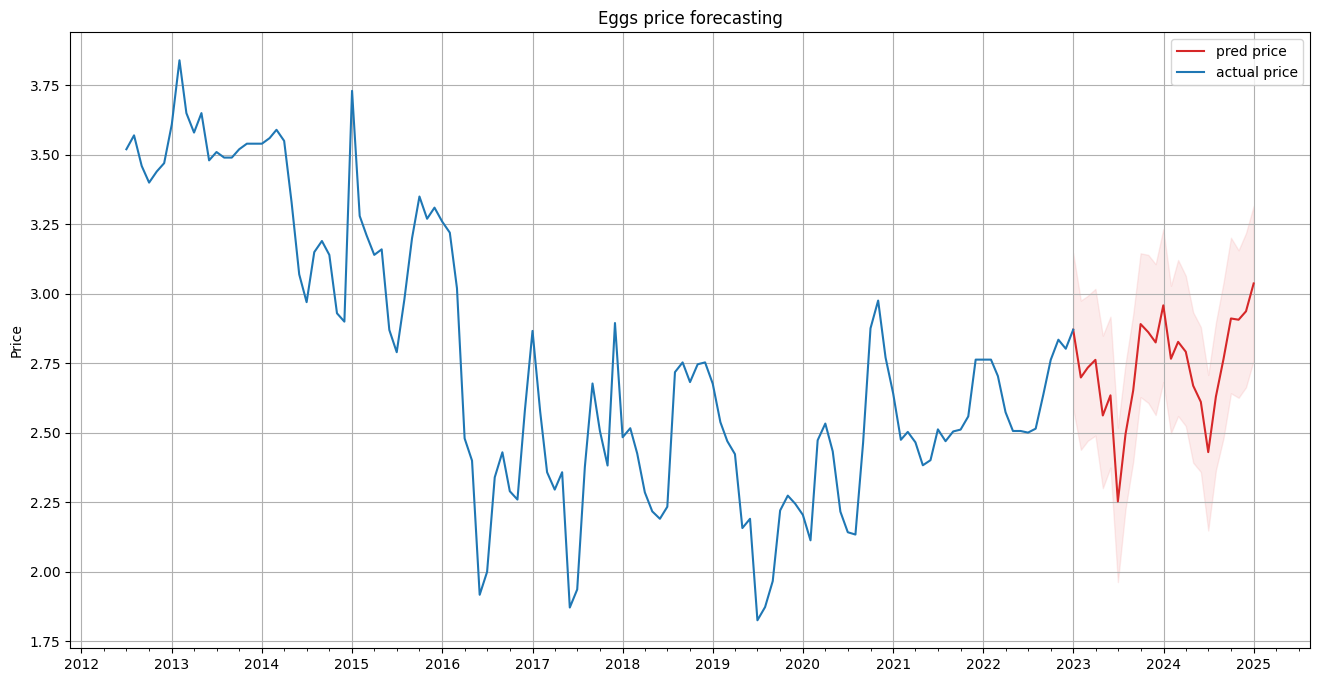

22:12:57 - cmdstanpy - INFO - Chain [1] start processing
22:12:57 - cmdstanpy - INFO - Chain [1] done processing


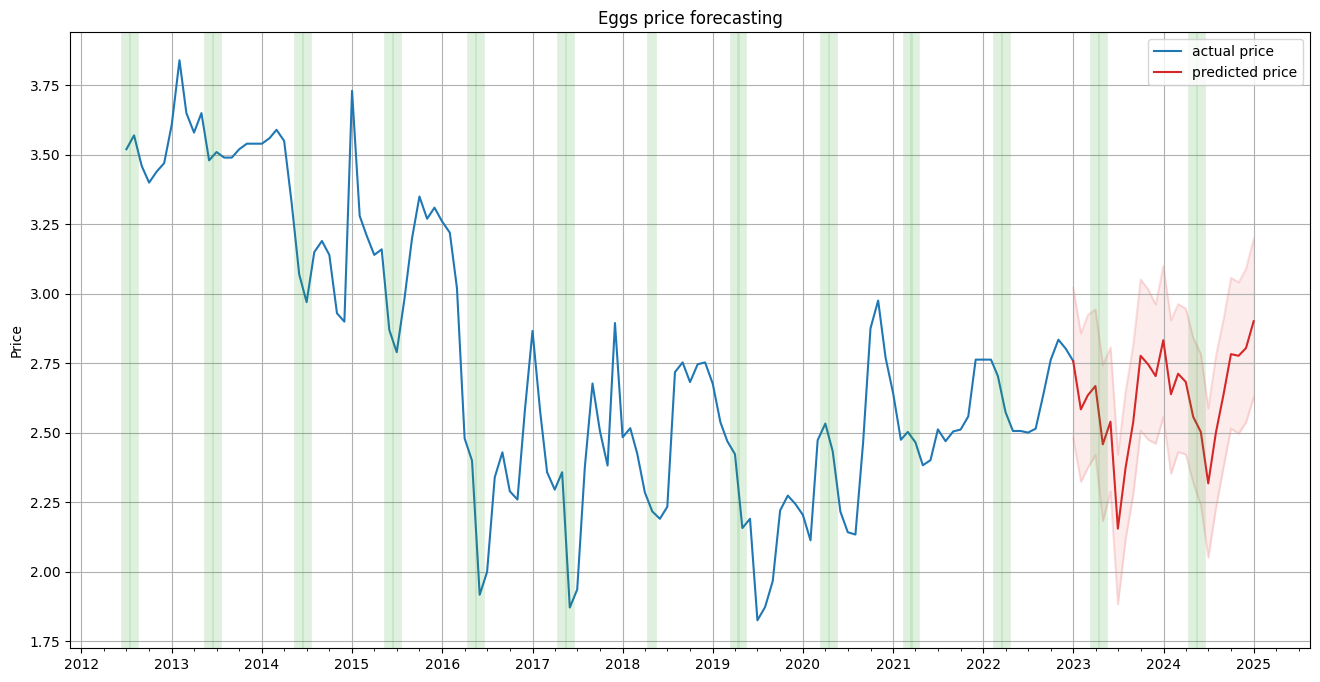

22:12:58 - cmdstanpy - INFO - Chain [1] start processing
22:12:58 - cmdstanpy - INFO - Chain [1] done processing


151


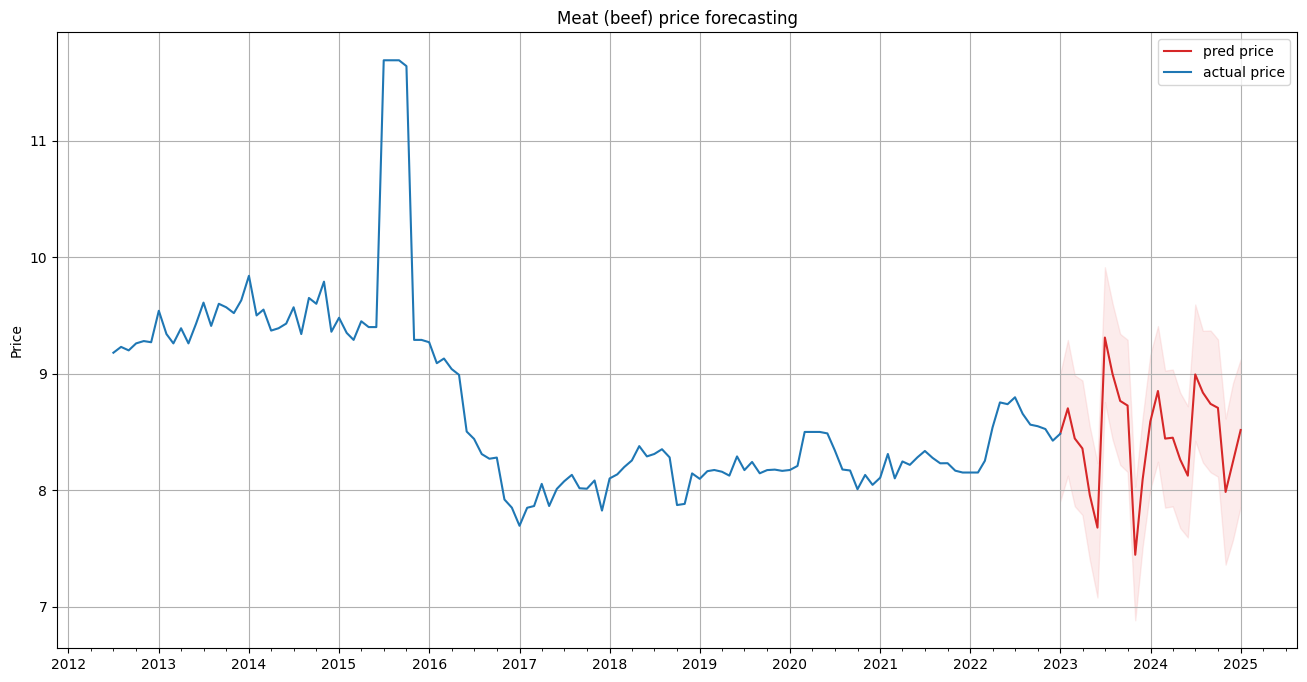

22:12:59 - cmdstanpy - INFO - Chain [1] start processing
22:12:59 - cmdstanpy - INFO - Chain [1] done processing


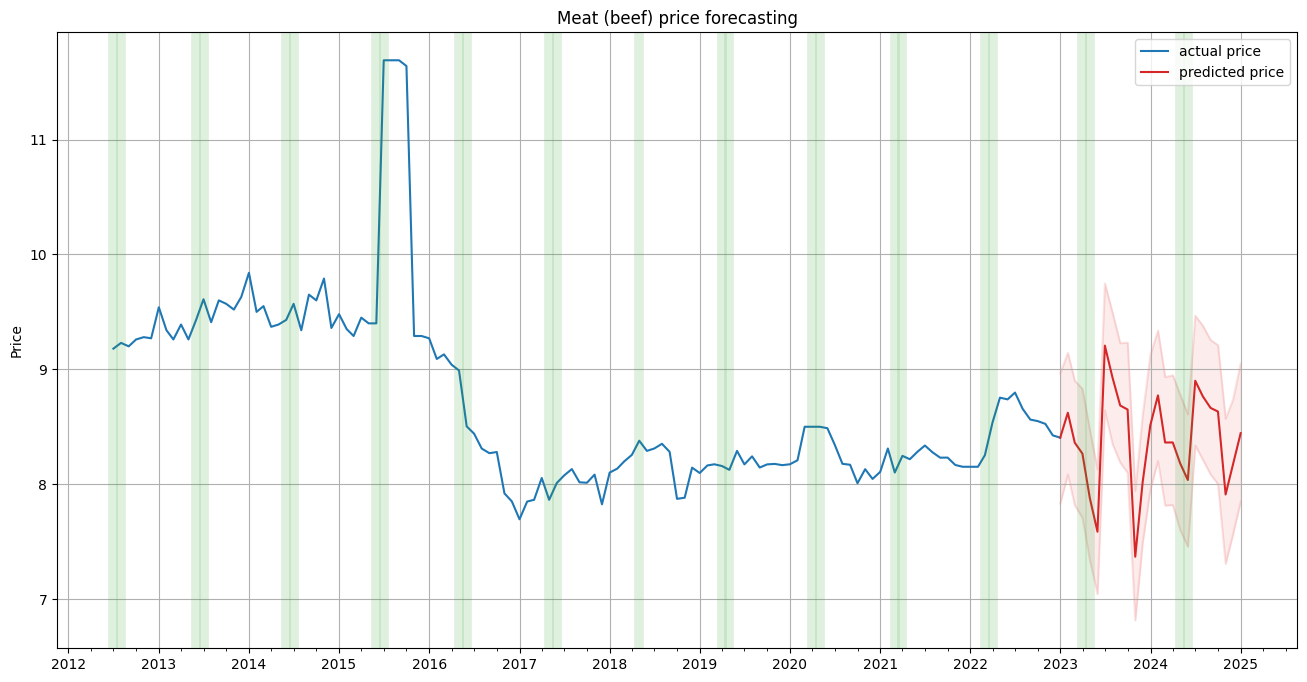

22:13:00 - cmdstanpy - INFO - Chain [1] start processing
22:13:00 - cmdstanpy - INFO - Chain [1] done processing


151


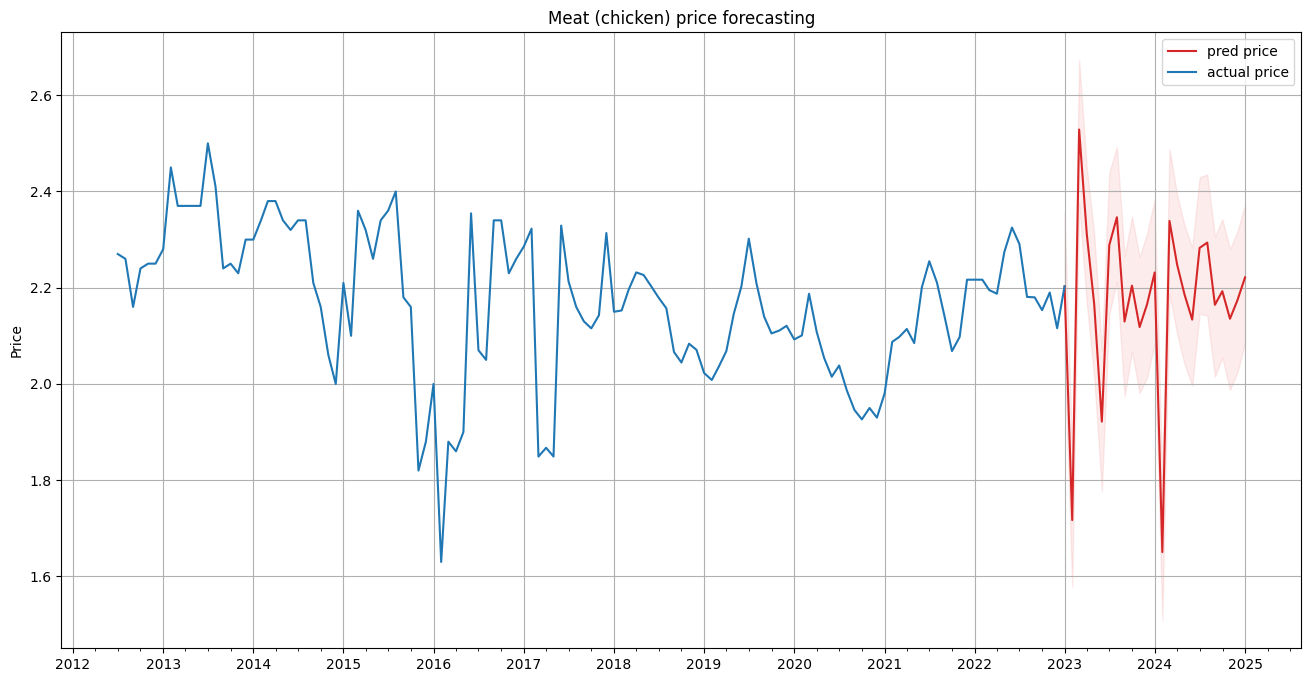

22:13:00 - cmdstanpy - INFO - Chain [1] start processing
22:13:00 - cmdstanpy - INFO - Chain [1] done processing


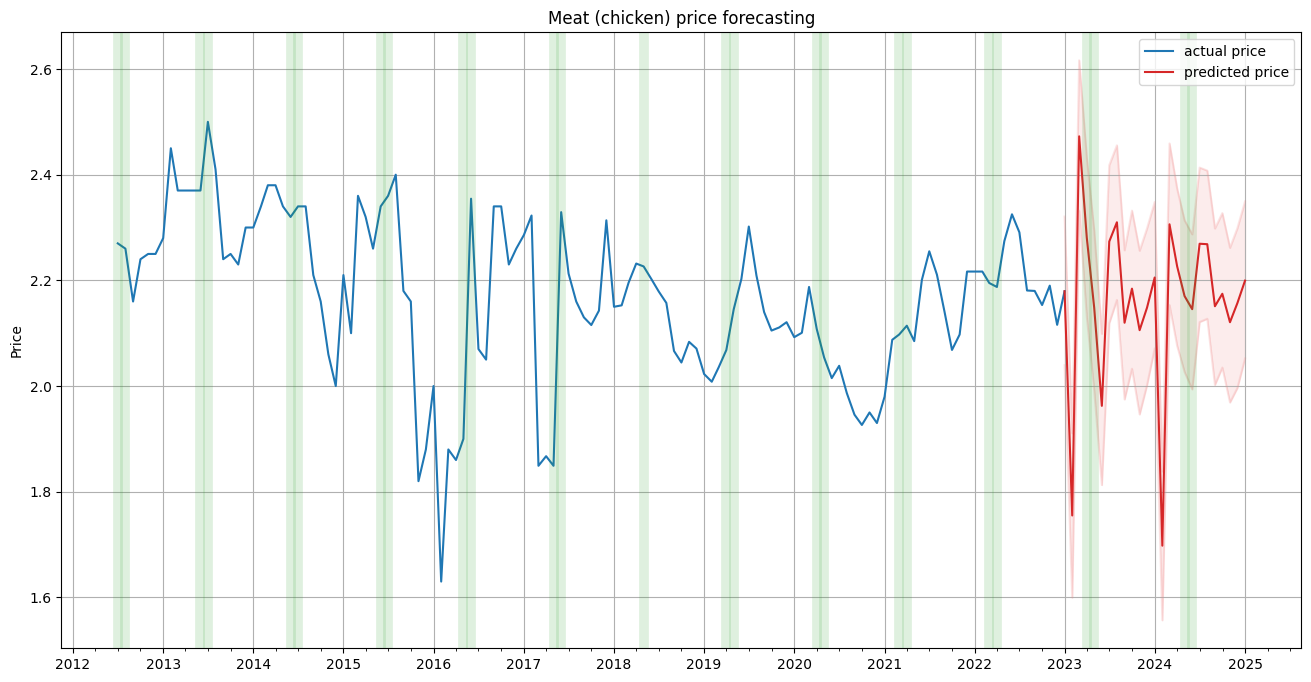

22:13:01 - cmdstanpy - INFO - Chain [1] start processing
22:13:01 - cmdstanpy - INFO - Chain [1] done processing


151


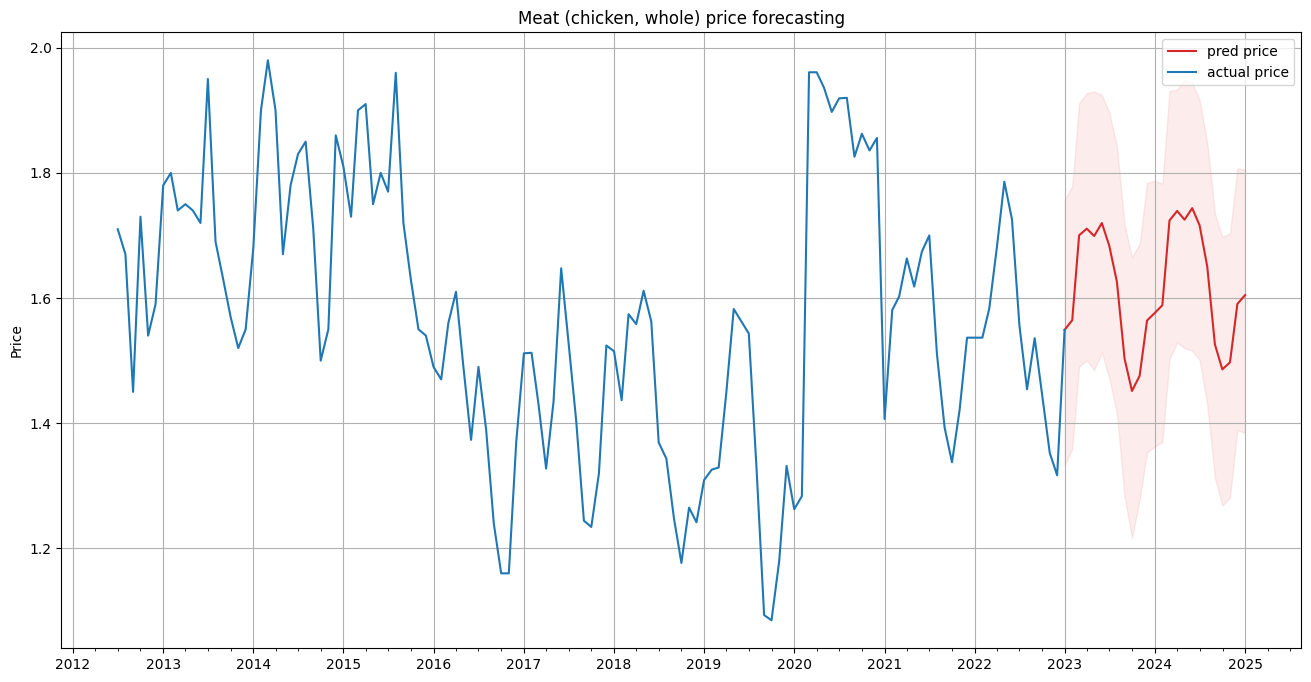

22:13:02 - cmdstanpy - INFO - Chain [1] start processing
22:13:02 - cmdstanpy - INFO - Chain [1] done processing


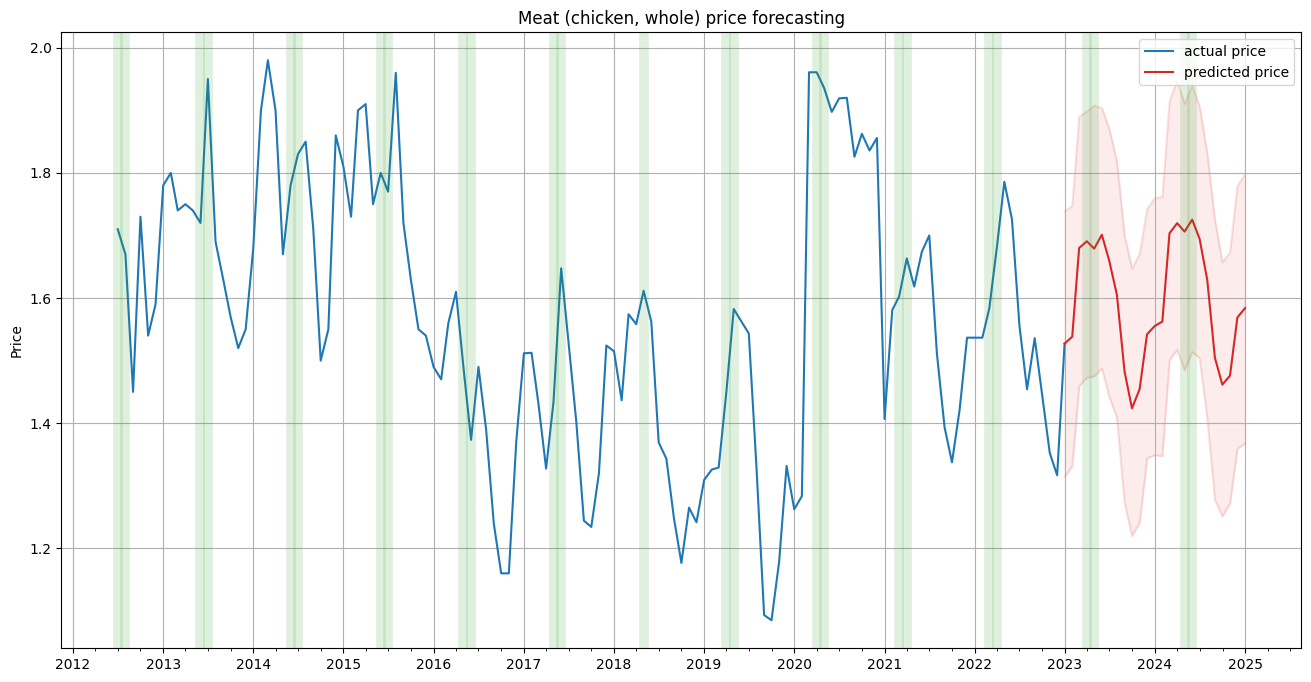

22:13:02 - cmdstanpy - INFO - Chain [1] start processing
22:13:02 - cmdstanpy - INFO - Chain [1] done processing


151


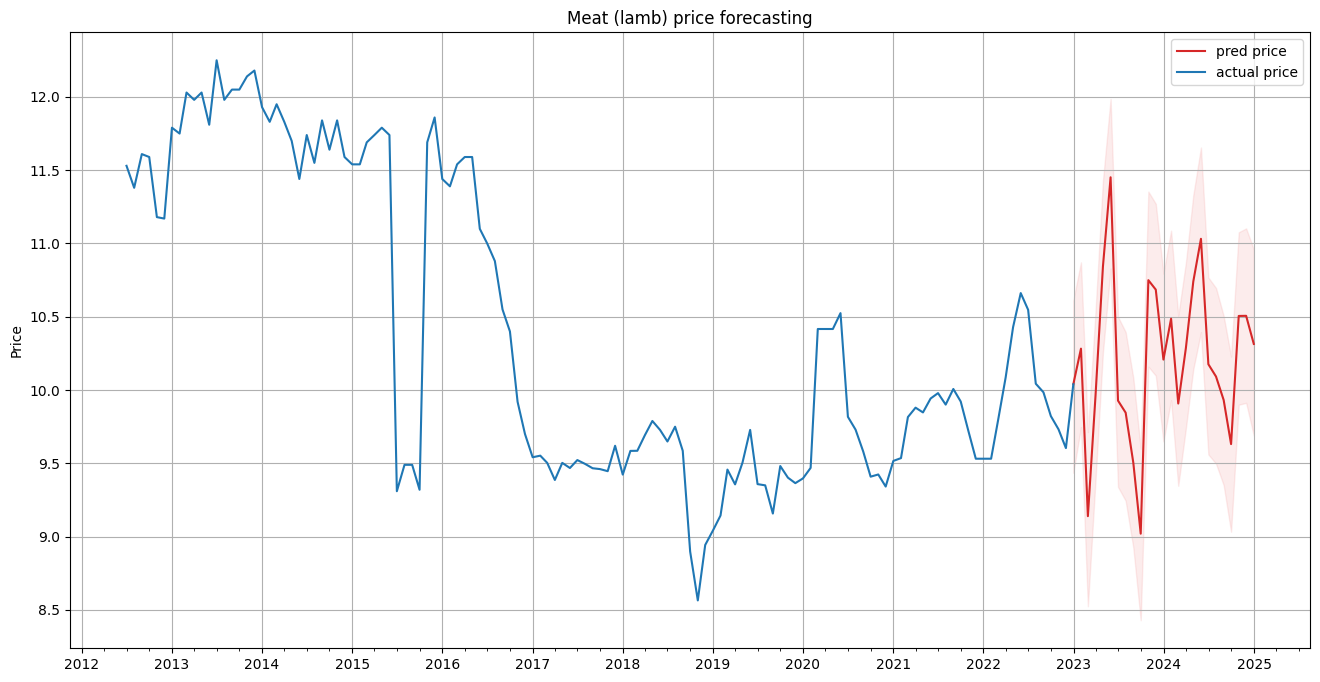

22:13:03 - cmdstanpy - INFO - Chain [1] start processing
22:13:03 - cmdstanpy - INFO - Chain [1] done processing


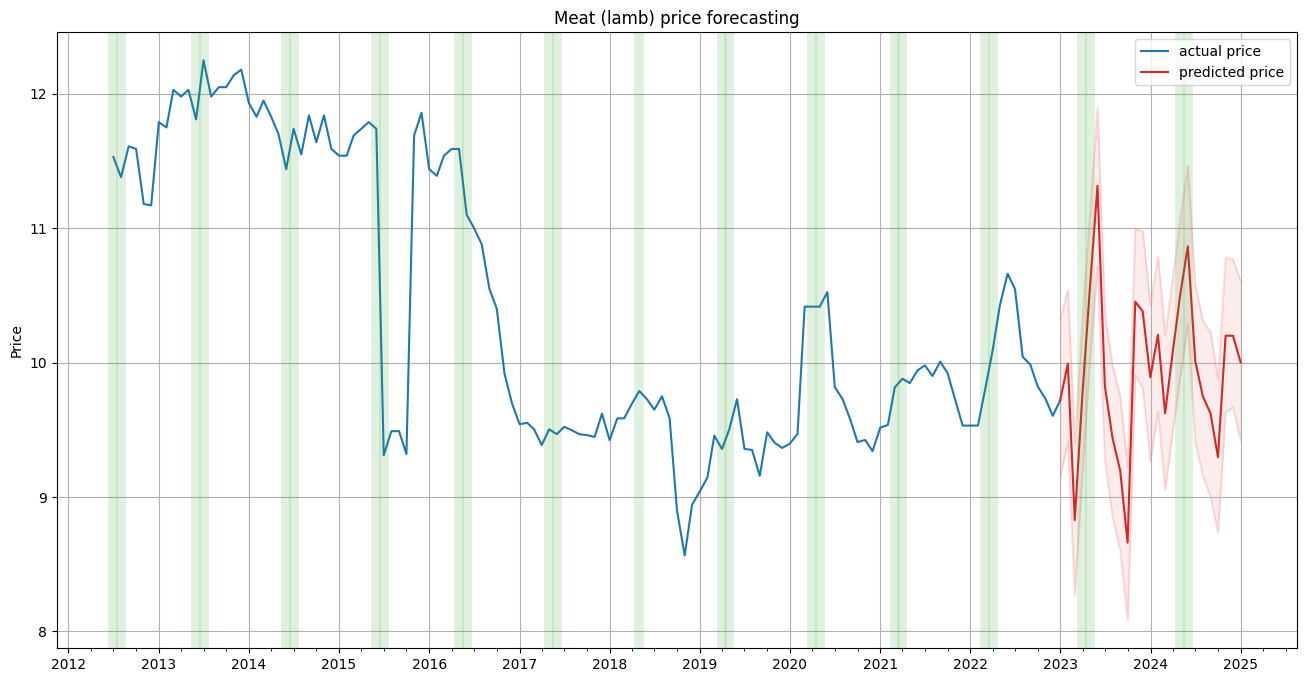

22:13:04 - cmdstanpy - INFO - Chain [1] start processing
22:13:04 - cmdstanpy - INFO - Chain [1] done processing


151


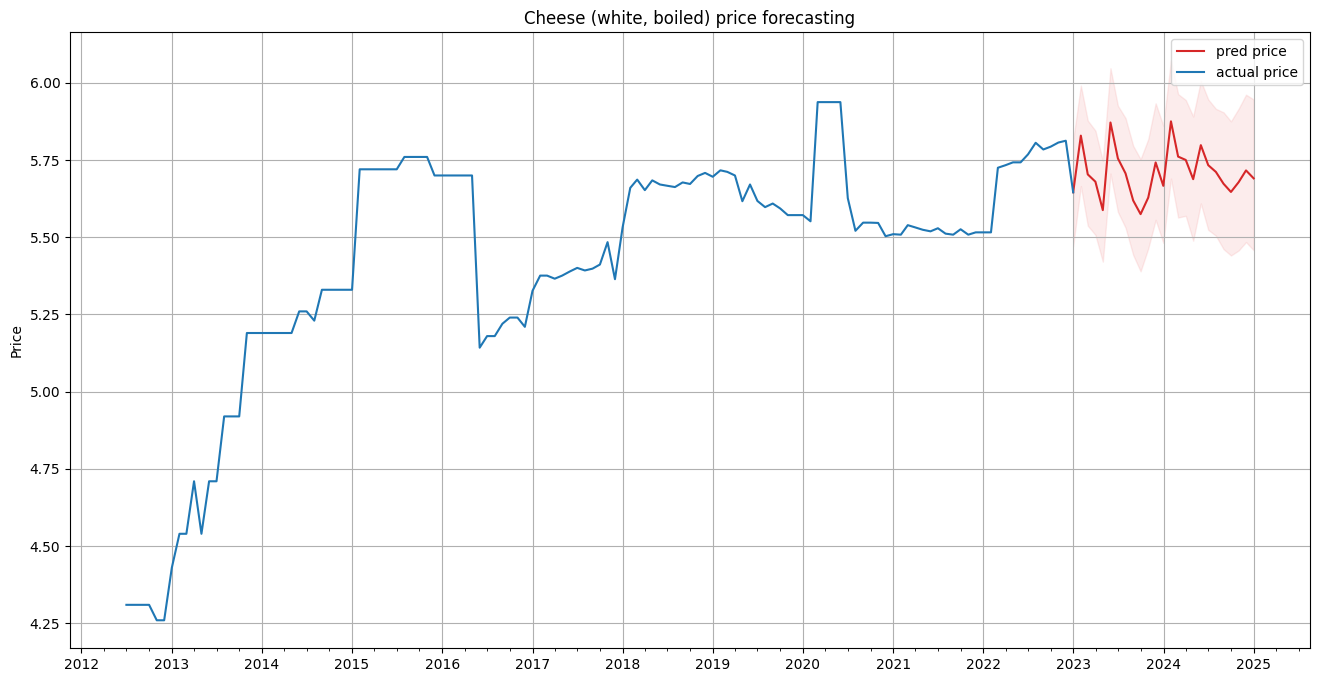

22:13:05 - cmdstanpy - INFO - Chain [1] start processing
22:13:05 - cmdstanpy - INFO - Chain [1] done processing


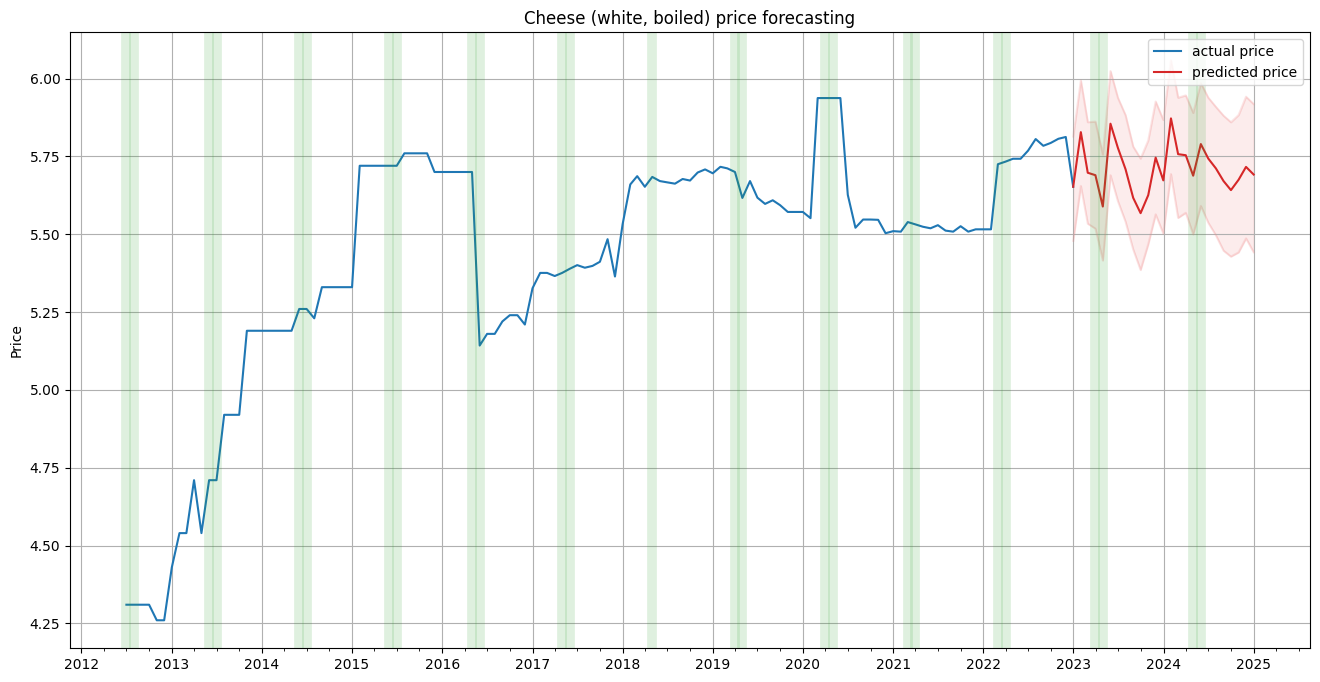

22:13:05 - cmdstanpy - INFO - Chain [1] start processing


151


22:13:05 - cmdstanpy - INFO - Chain [1] done processing


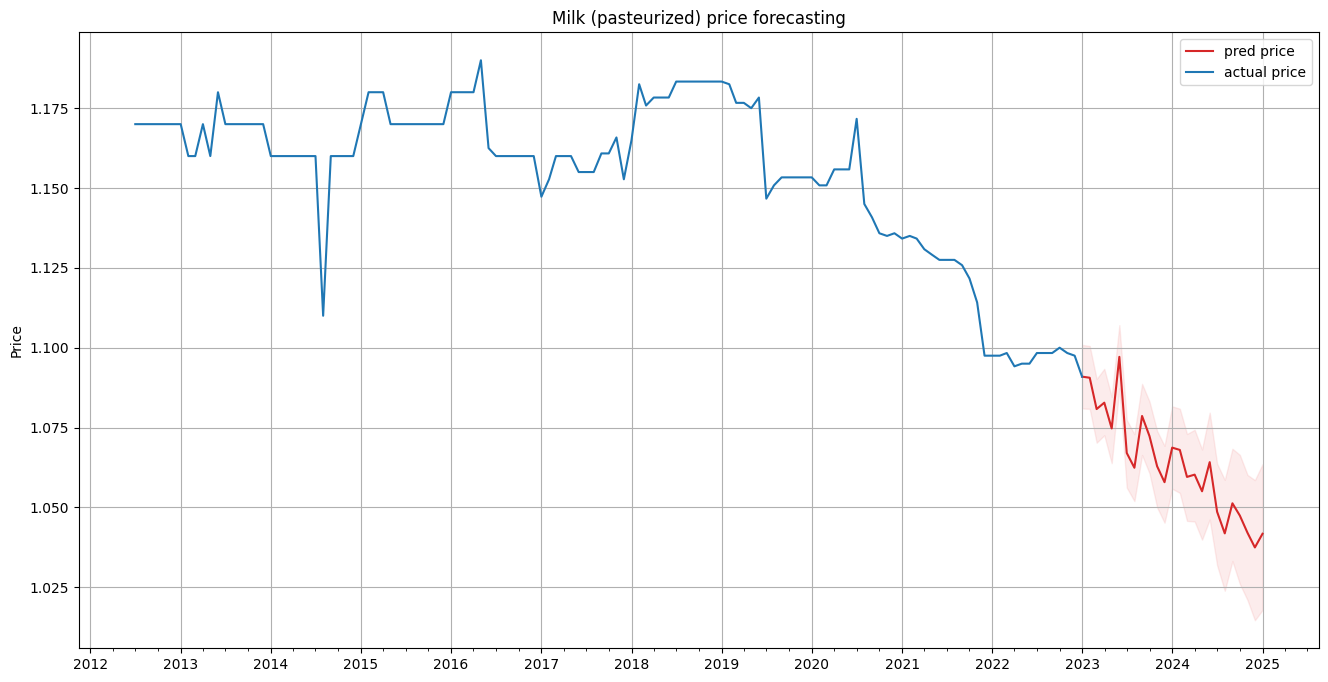

22:13:06 - cmdstanpy - INFO - Chain [1] start processing
22:13:06 - cmdstanpy - INFO - Chain [1] done processing


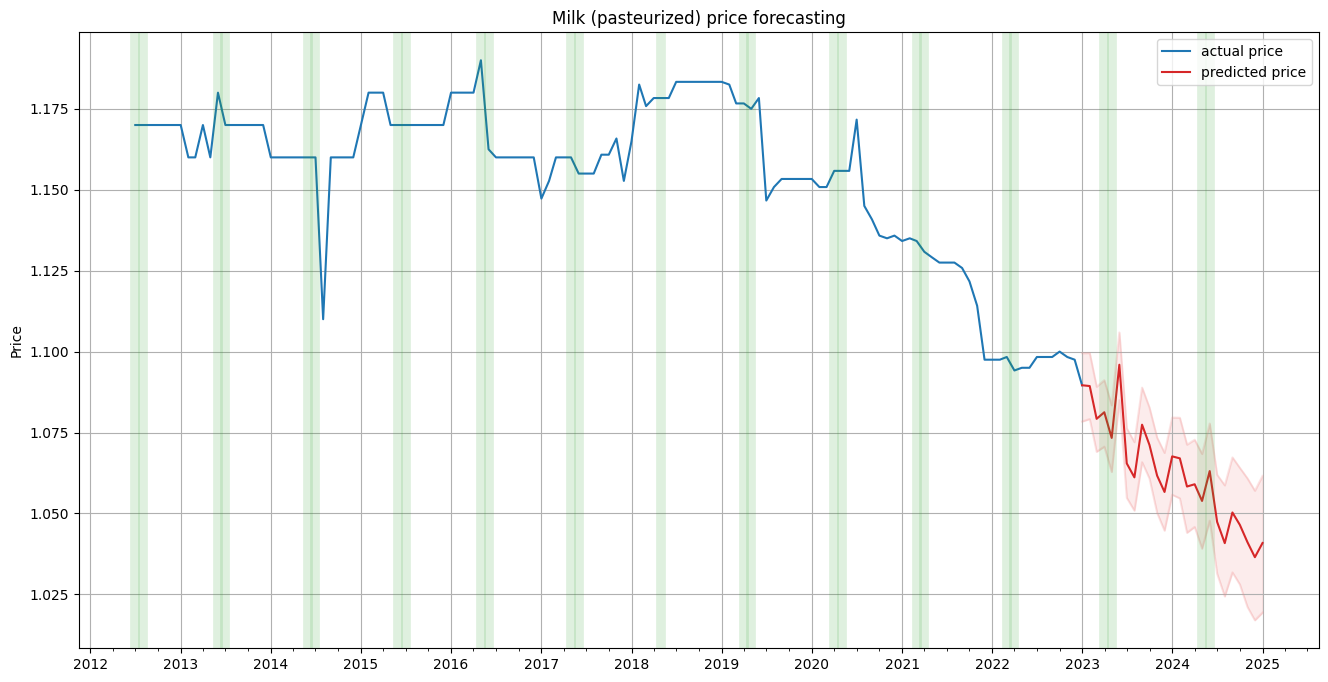

22:13:07 - cmdstanpy - INFO - Chain [1] start processing
22:13:07 - cmdstanpy - INFO - Chain [1] done processing


151


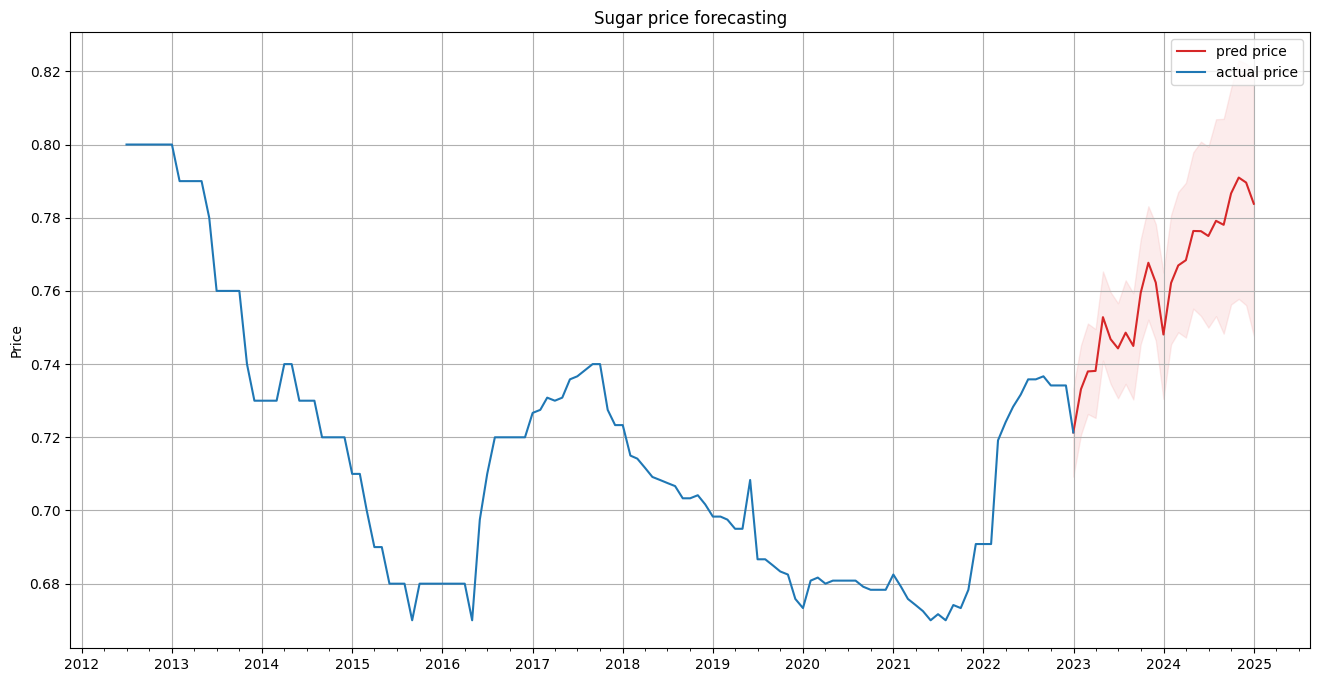

22:13:07 - cmdstanpy - INFO - Chain [1] start processing
22:13:07 - cmdstanpy - INFO - Chain [1] done processing


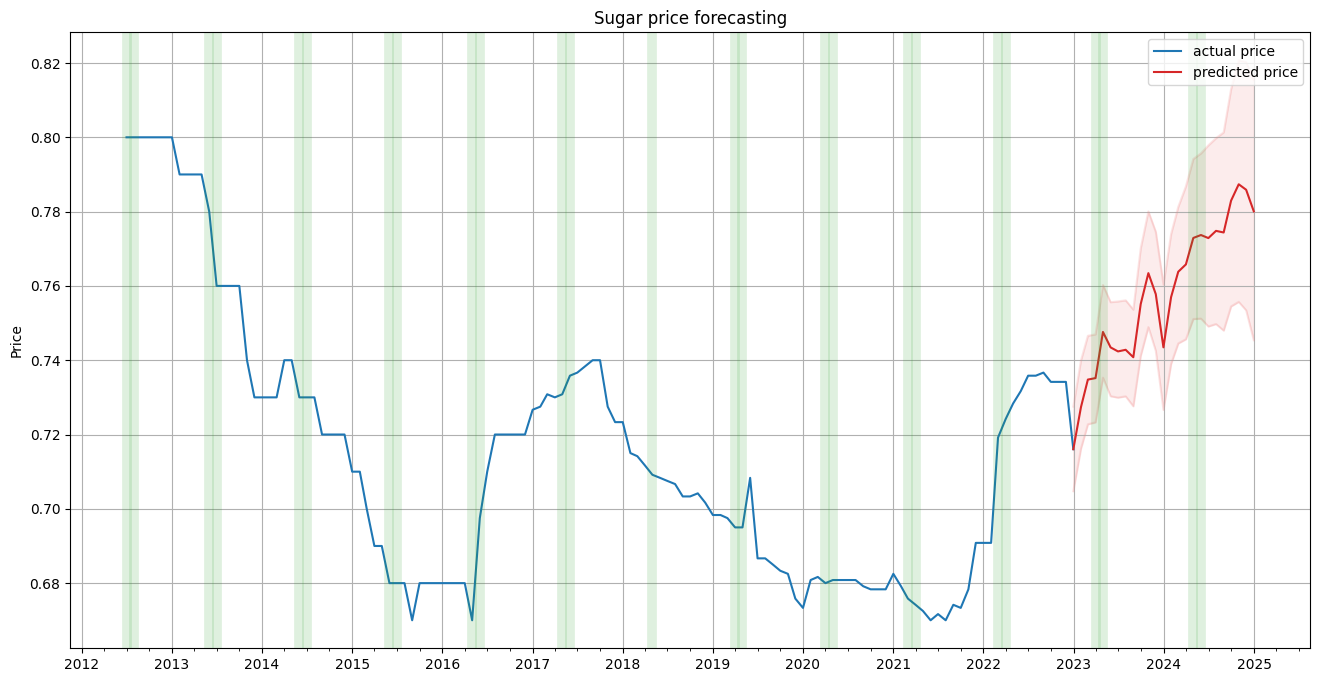

22:13:08 - cmdstanpy - INFO - Chain [1] start processing


151


22:13:08 - cmdstanpy - INFO - Chain [1] done processing


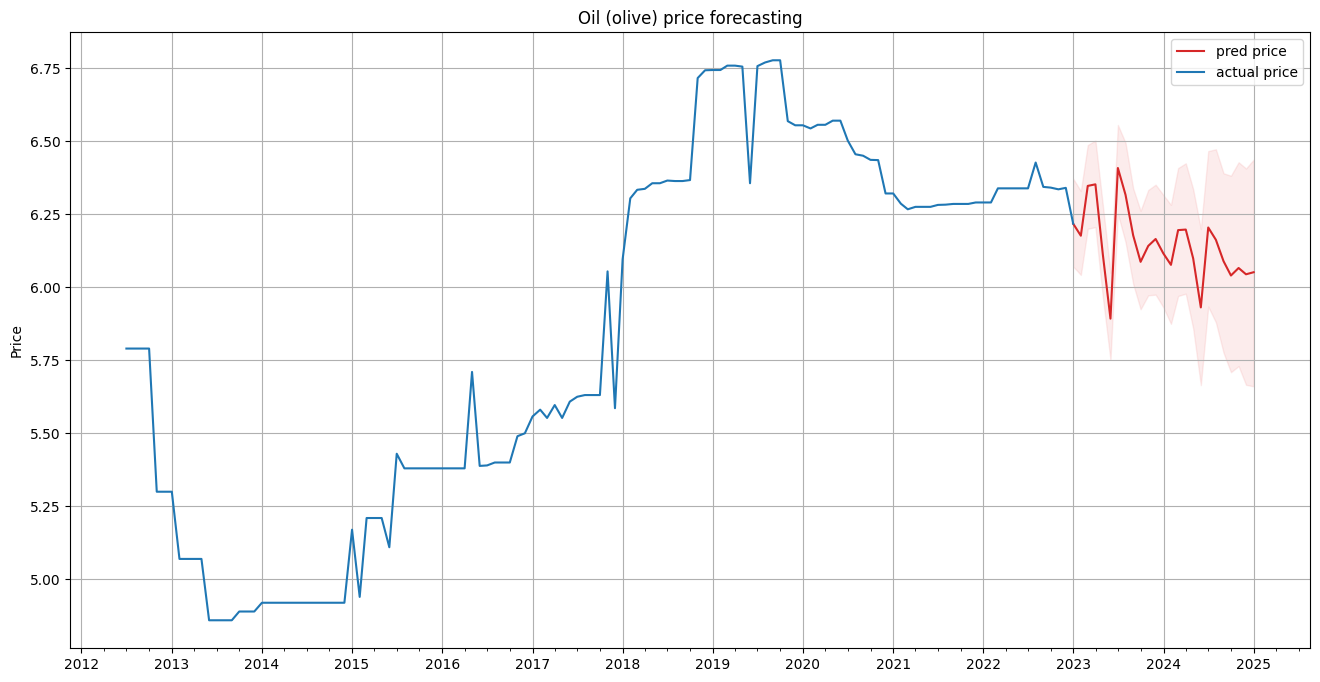

22:13:09 - cmdstanpy - INFO - Chain [1] start processing
22:13:09 - cmdstanpy - INFO - Chain [1] done processing


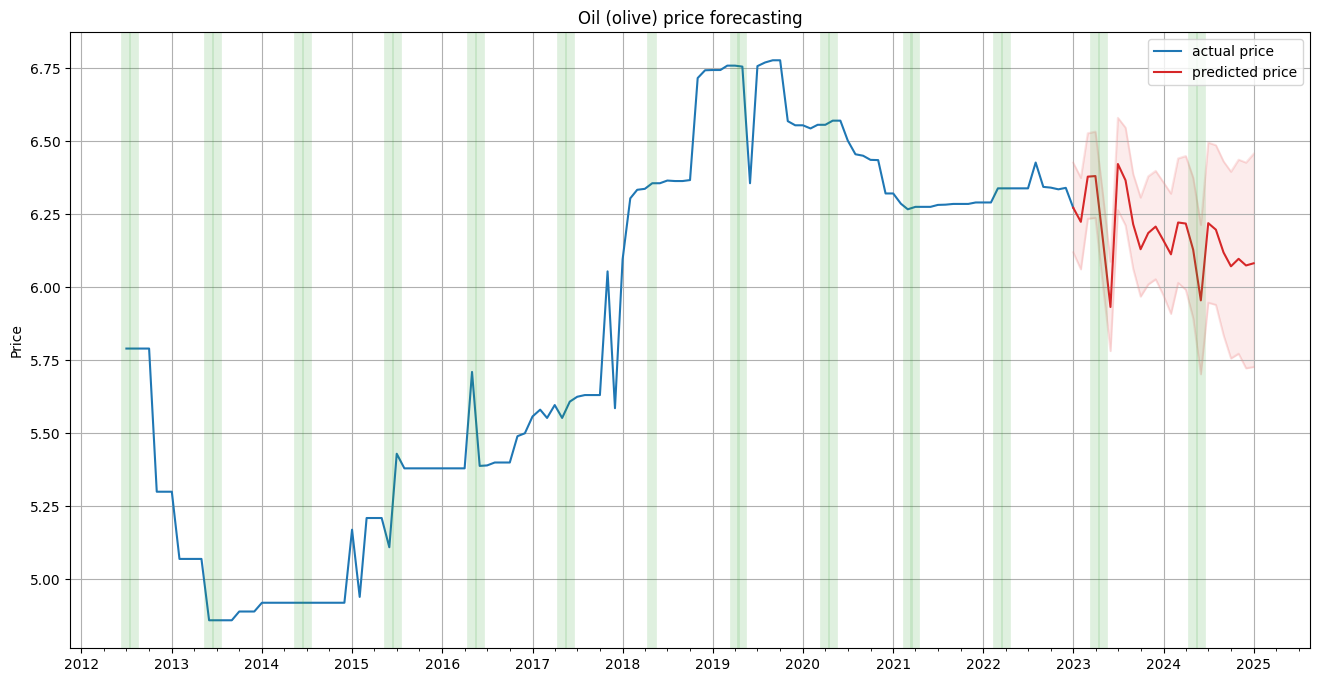

22:13:10 - cmdstanpy - INFO - Chain [1] start processing
22:13:10 - cmdstanpy - INFO - Chain [1] done processing


151


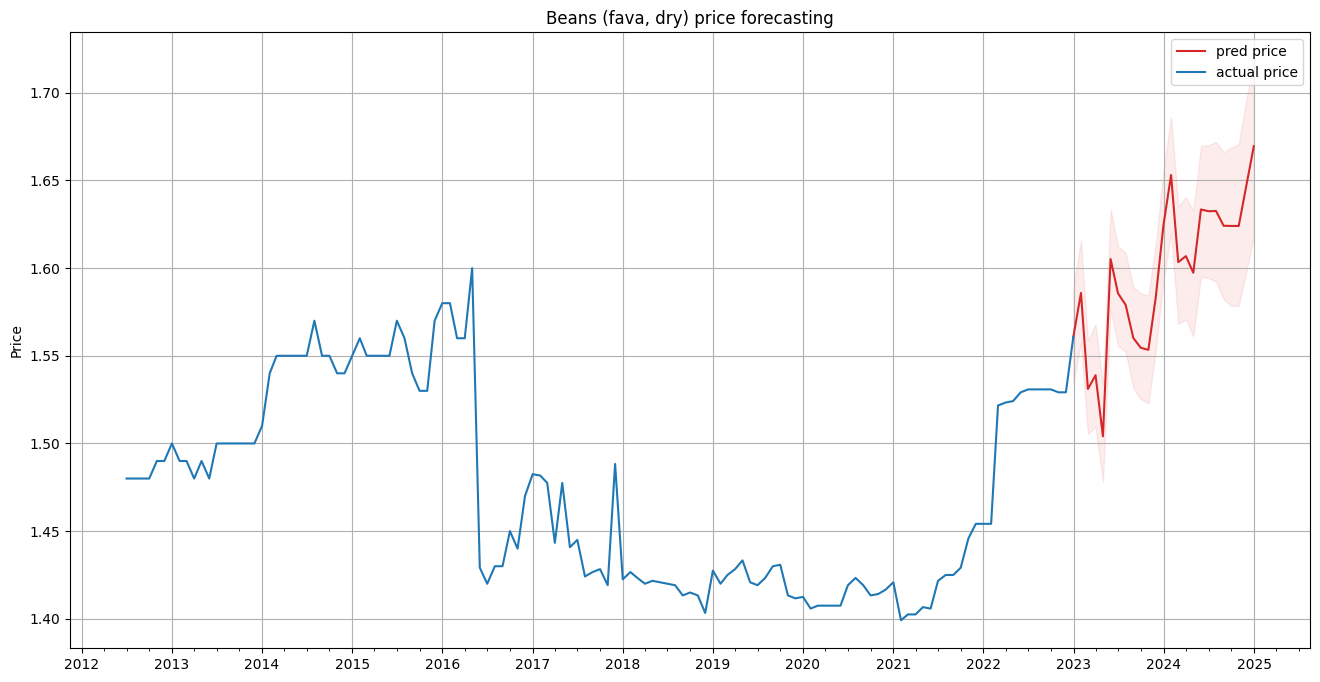

22:13:10 - cmdstanpy - INFO - Chain [1] start processing
22:13:10 - cmdstanpy - INFO - Chain [1] done processing


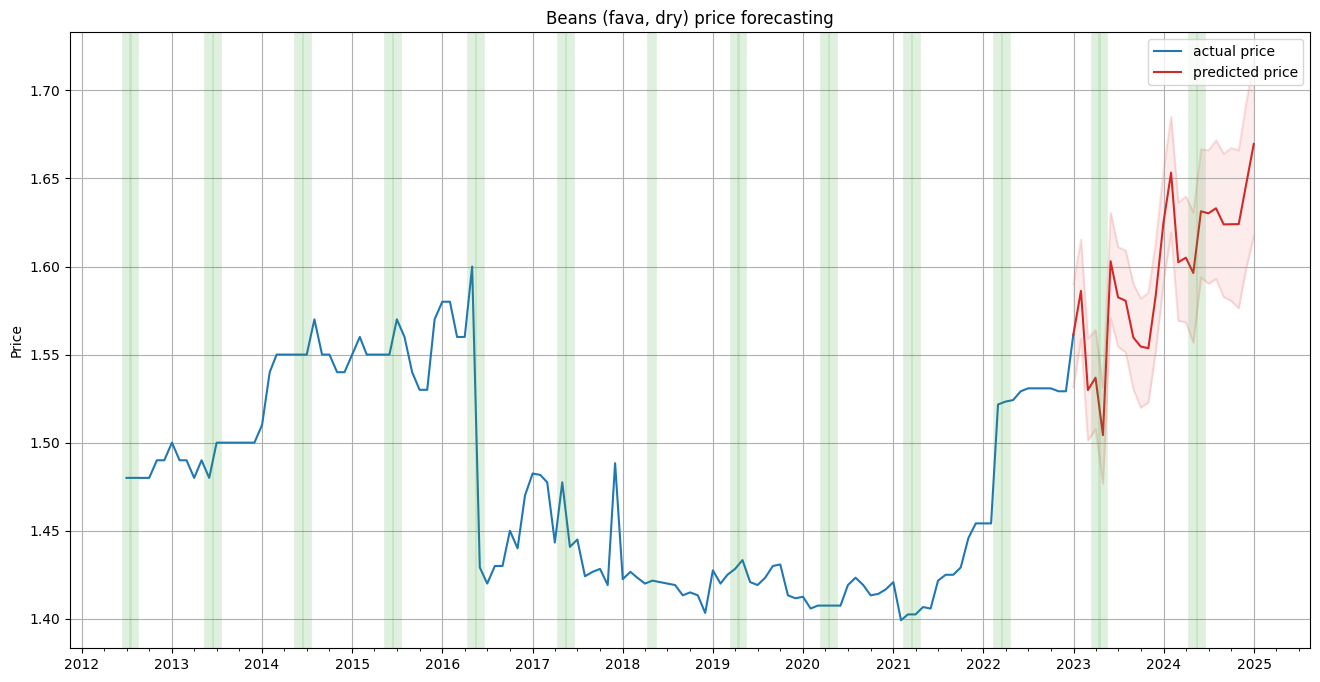

22:13:11 - cmdstanpy - INFO - Chain [1] start processing


151


22:13:11 - cmdstanpy - INFO - Chain [1] done processing


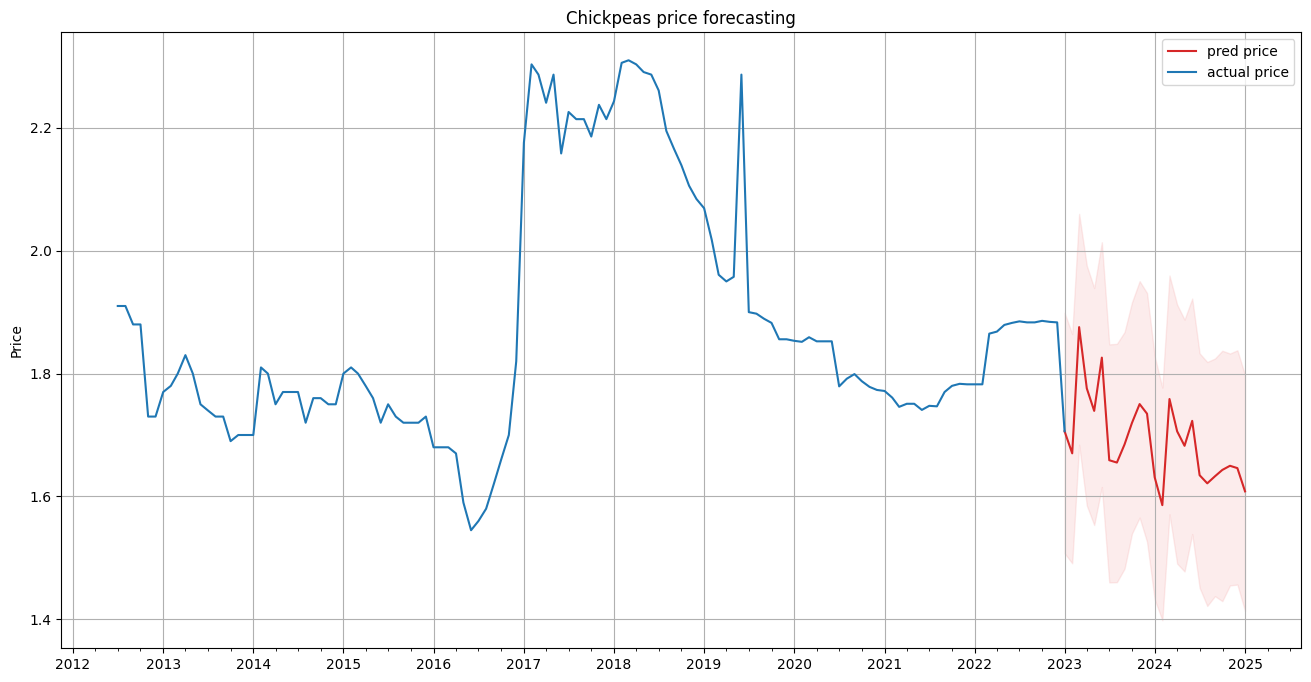

22:13:11 - cmdstanpy - INFO - Chain [1] start processing
22:13:11 - cmdstanpy - INFO - Chain [1] done processing


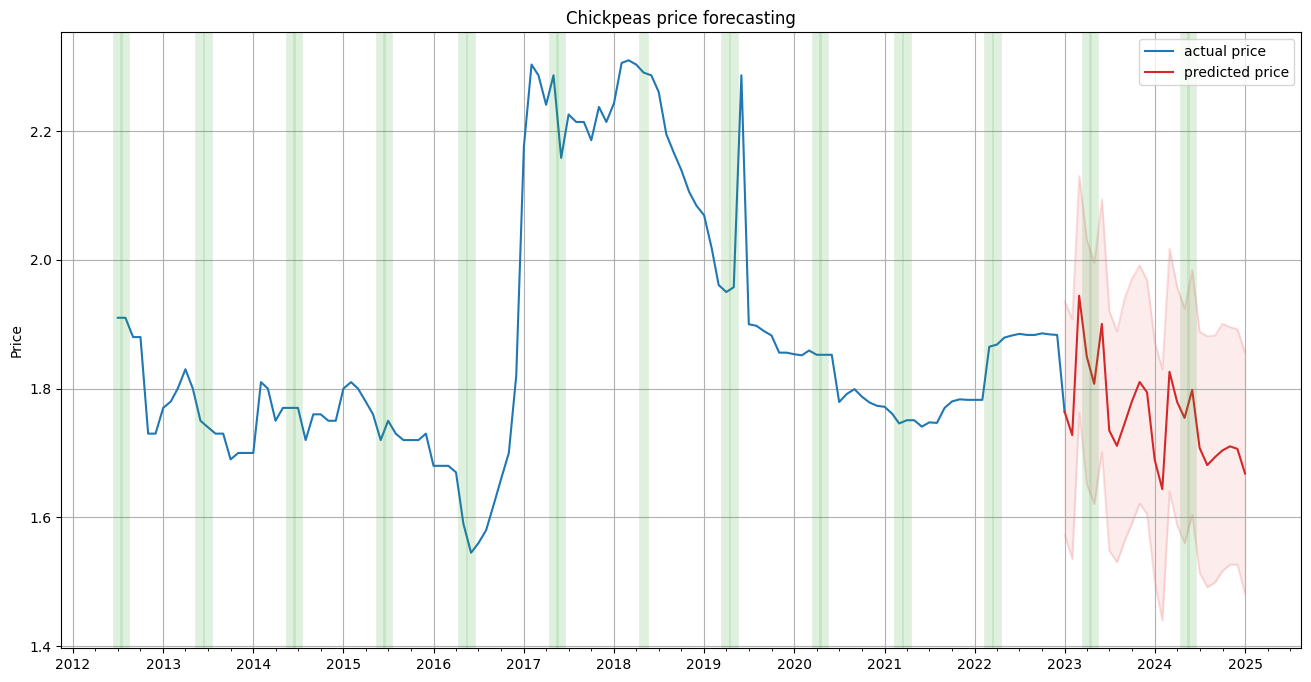

22:13:12 - cmdstanpy - INFO - Chain [1] start processing
22:13:12 - cmdstanpy - INFO - Chain [1] done processing


151


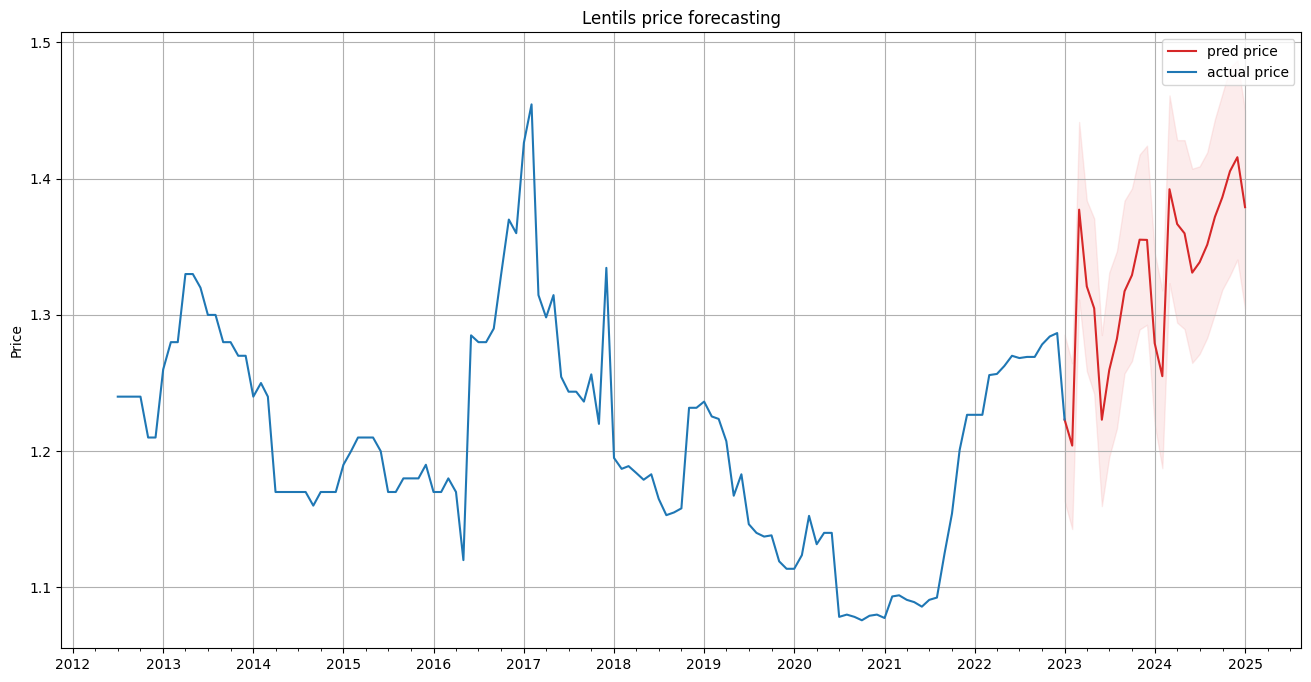

22:13:13 - cmdstanpy - INFO - Chain [1] start processing
22:13:13 - cmdstanpy - INFO - Chain [1] done processing


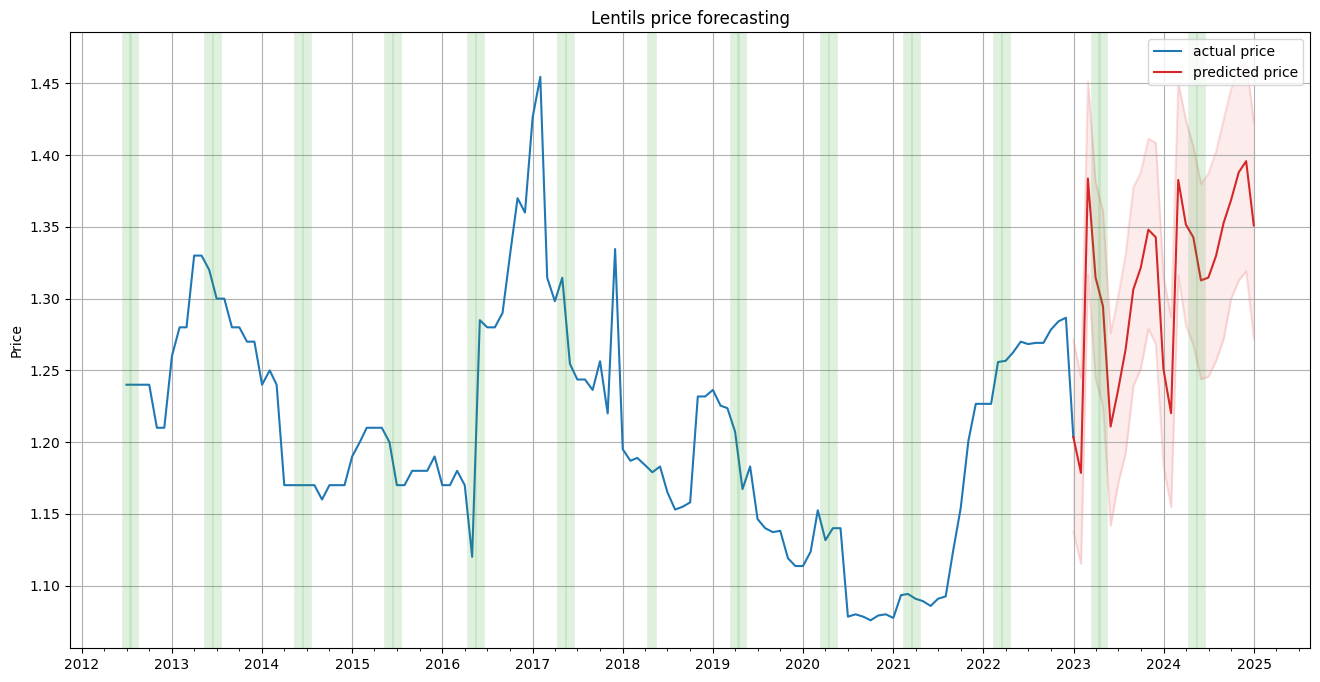

22:13:14 - cmdstanpy - INFO - Chain [1] start processing
22:13:14 - cmdstanpy - INFO - Chain [1] done processing


151


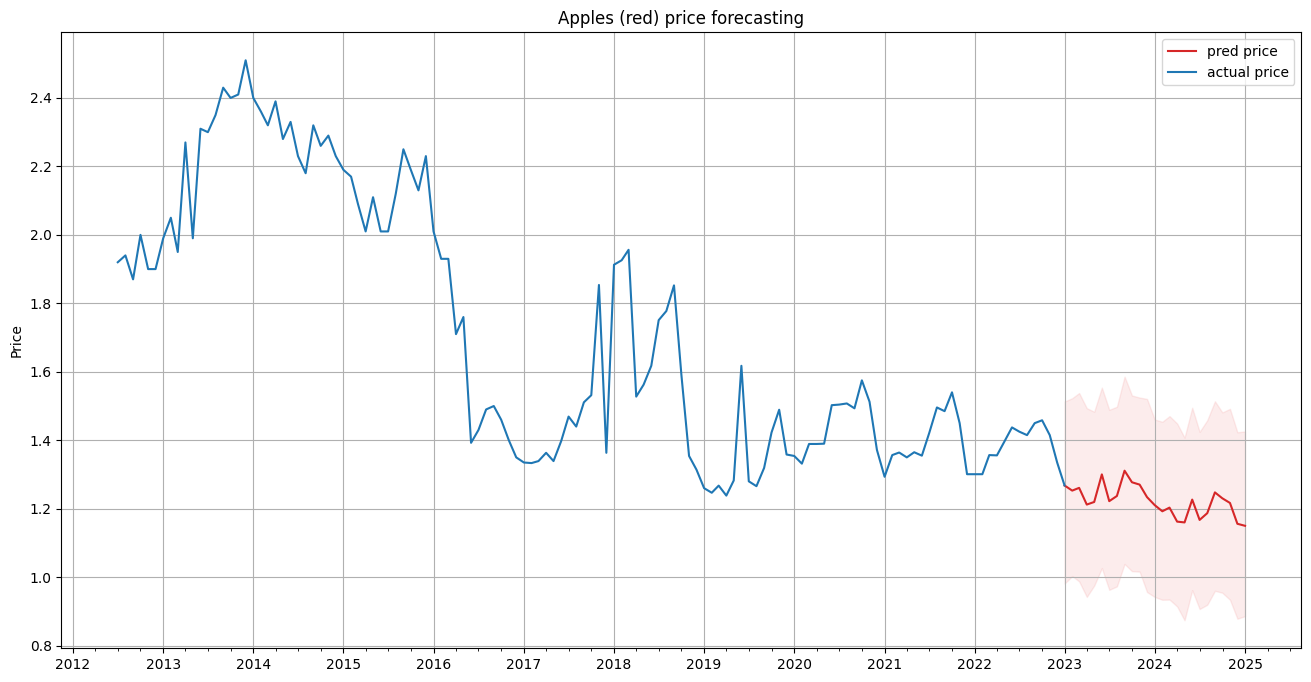

22:13:14 - cmdstanpy - INFO - Chain [1] start processing
22:13:14 - cmdstanpy - INFO - Chain [1] done processing


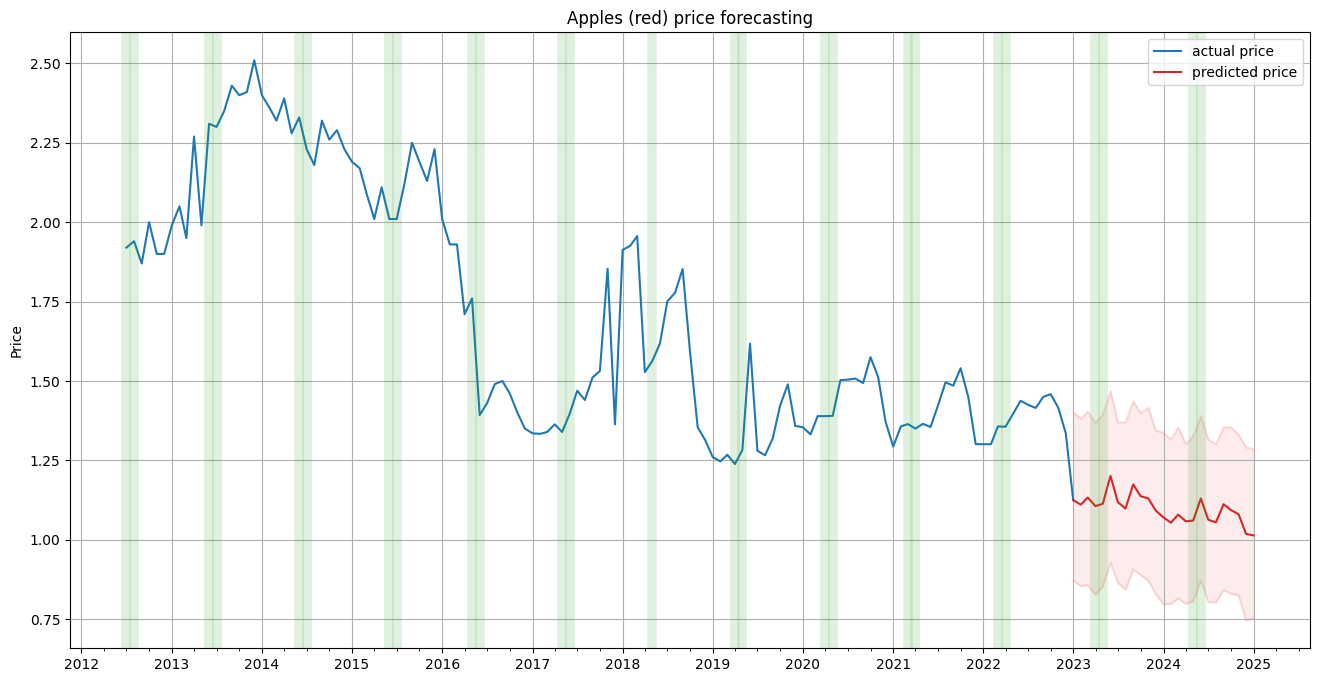

22:13:15 - cmdstanpy - INFO - Chain [1] start processing
22:13:15 - cmdstanpy - INFO - Chain [1] done processing


151


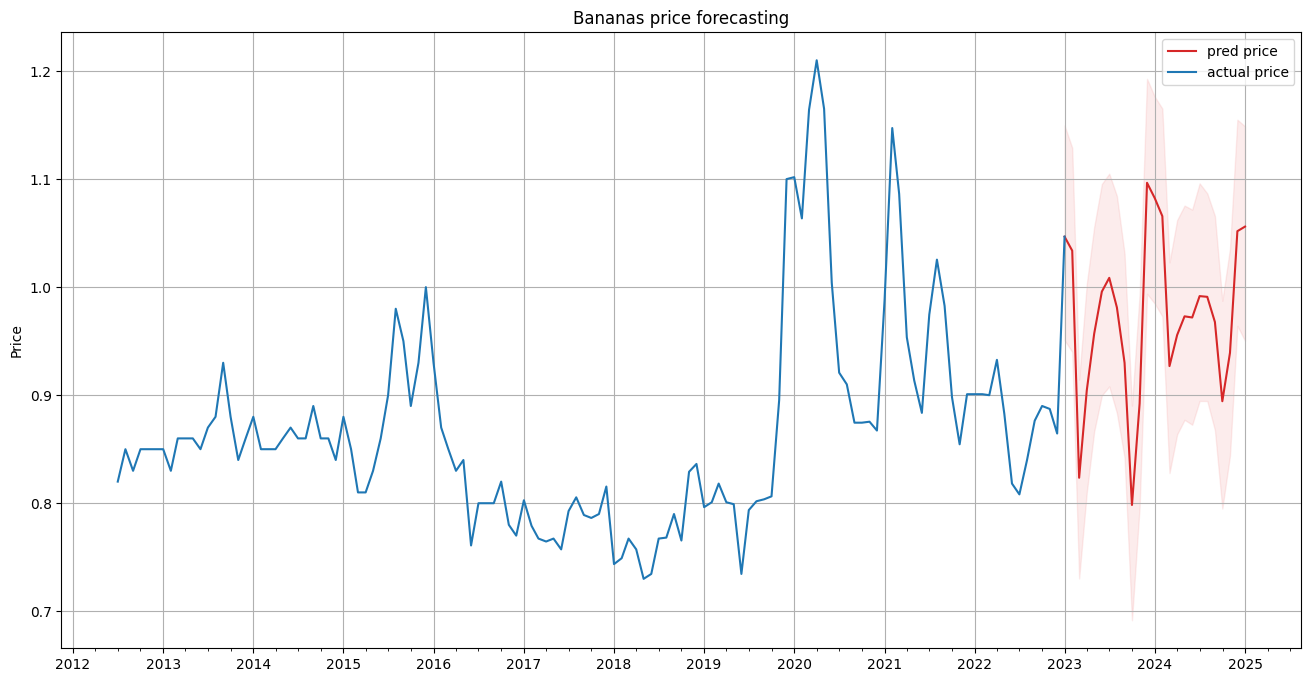

22:13:15 - cmdstanpy - INFO - Chain [1] start processing
22:13:15 - cmdstanpy - INFO - Chain [1] done processing


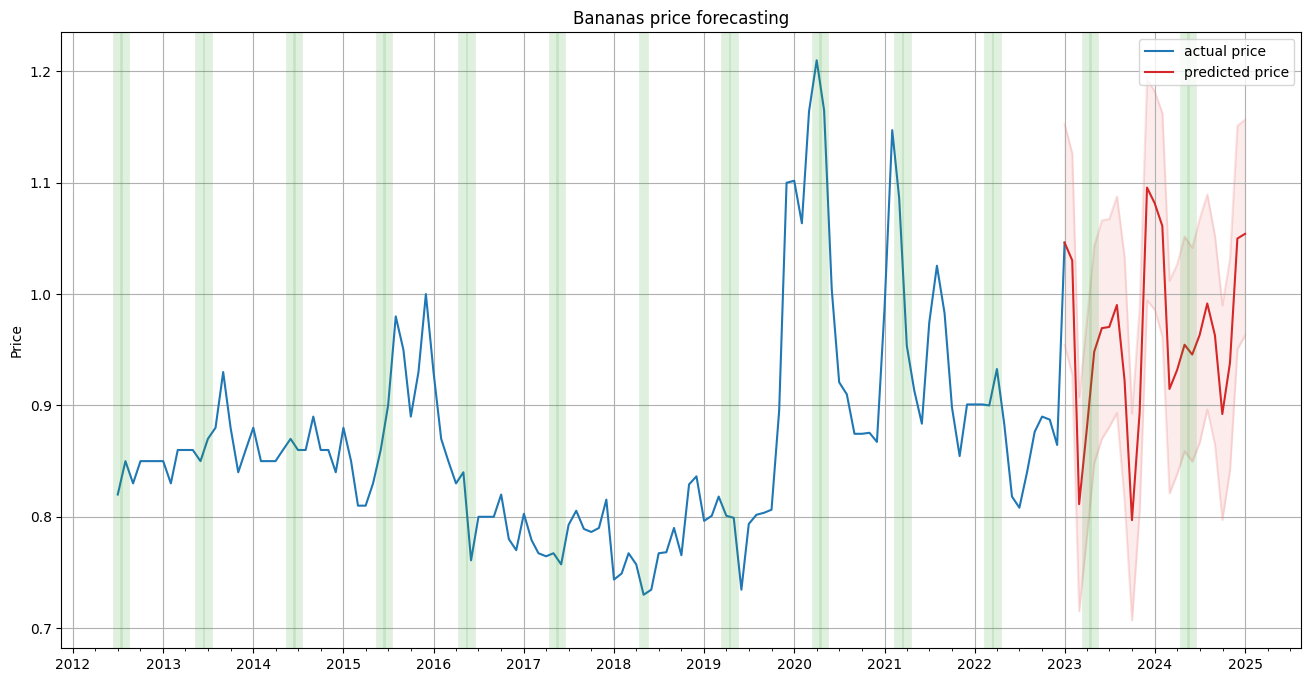

22:13:16 - cmdstanpy - INFO - Chain [1] start processing
22:13:16 - cmdstanpy - INFO - Chain [1] done processing


151


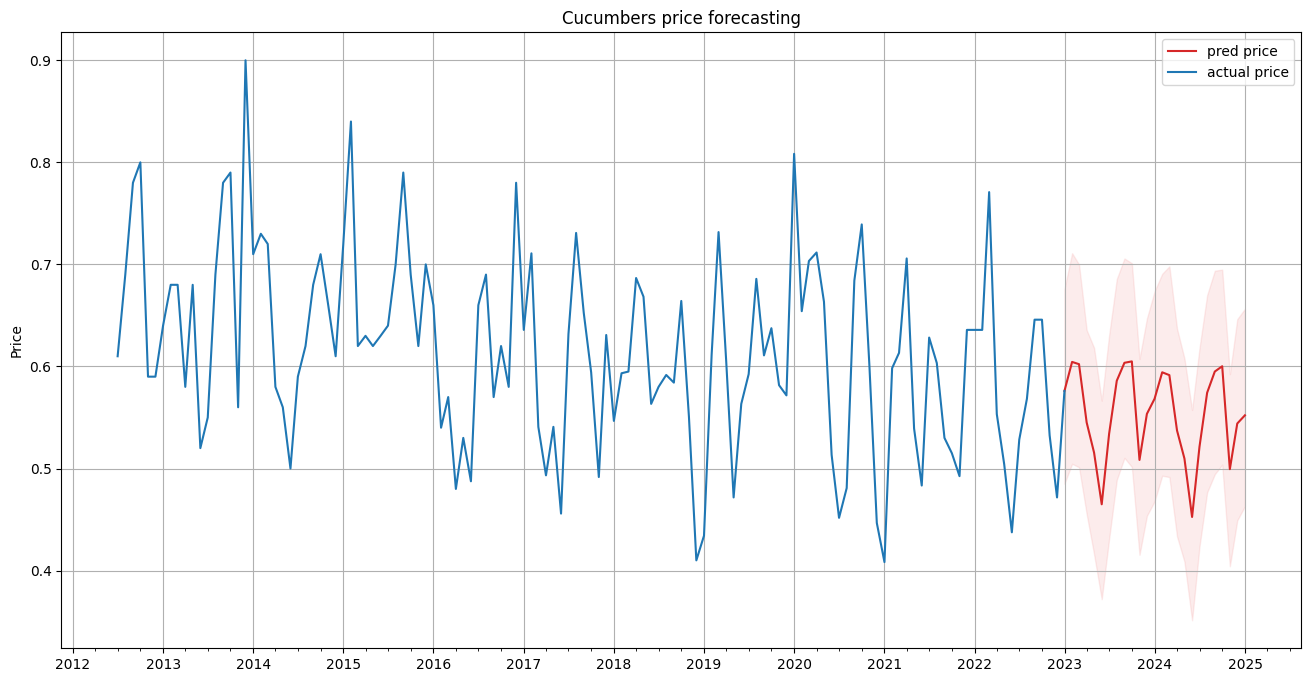

22:13:17 - cmdstanpy - INFO - Chain [1] start processing
22:13:17 - cmdstanpy - INFO - Chain [1] done processing


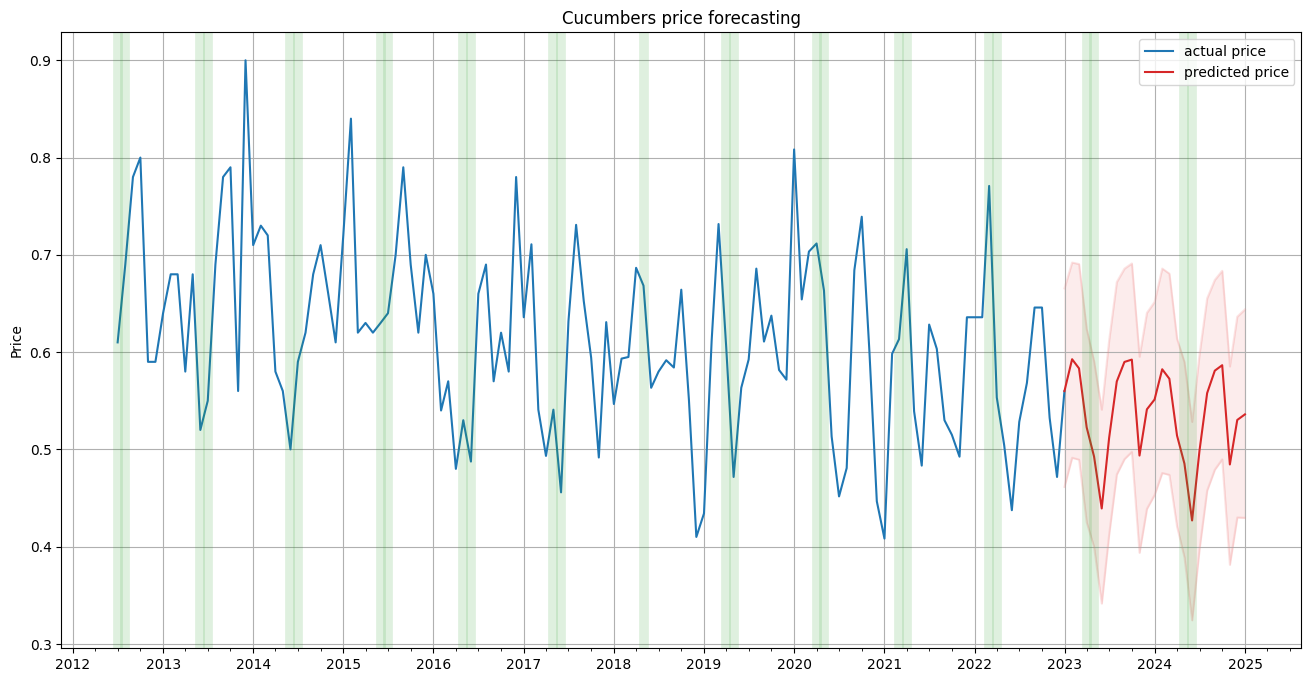

22:13:17 - cmdstanpy - INFO - Chain [1] start processing
22:13:17 - cmdstanpy - INFO - Chain [1] done processing


151


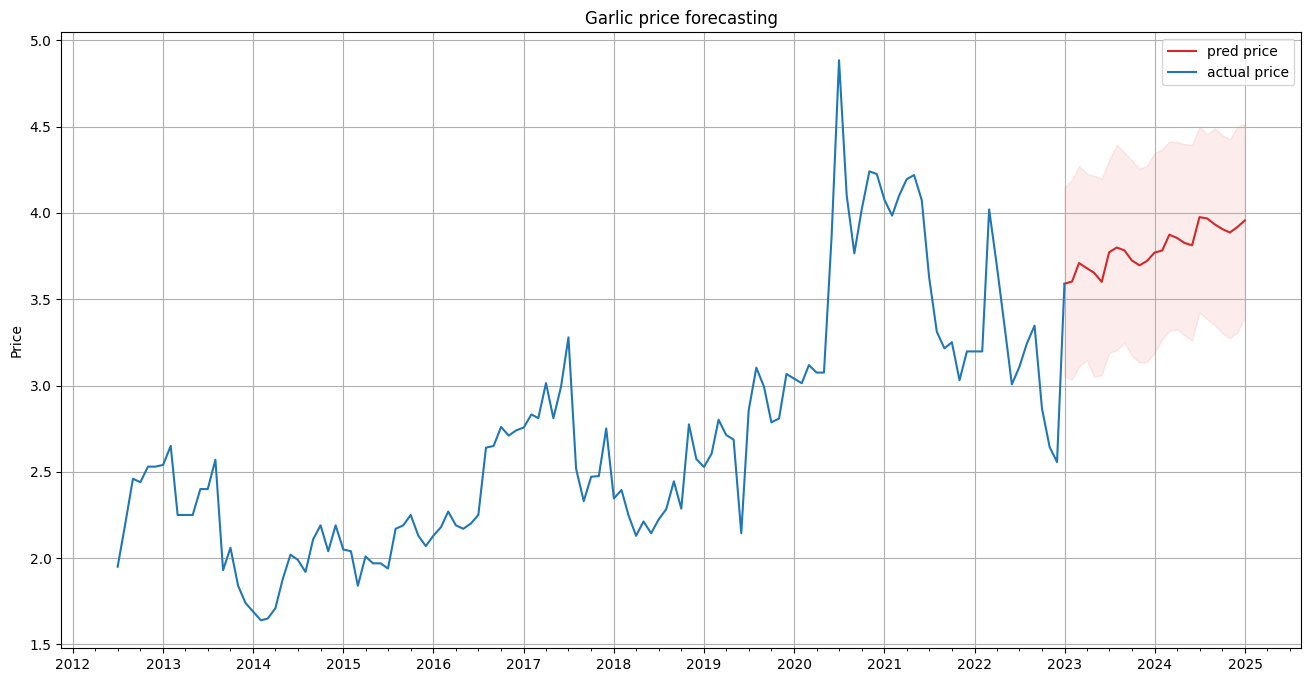

22:13:18 - cmdstanpy - INFO - Chain [1] start processing
22:13:18 - cmdstanpy - INFO - Chain [1] done processing


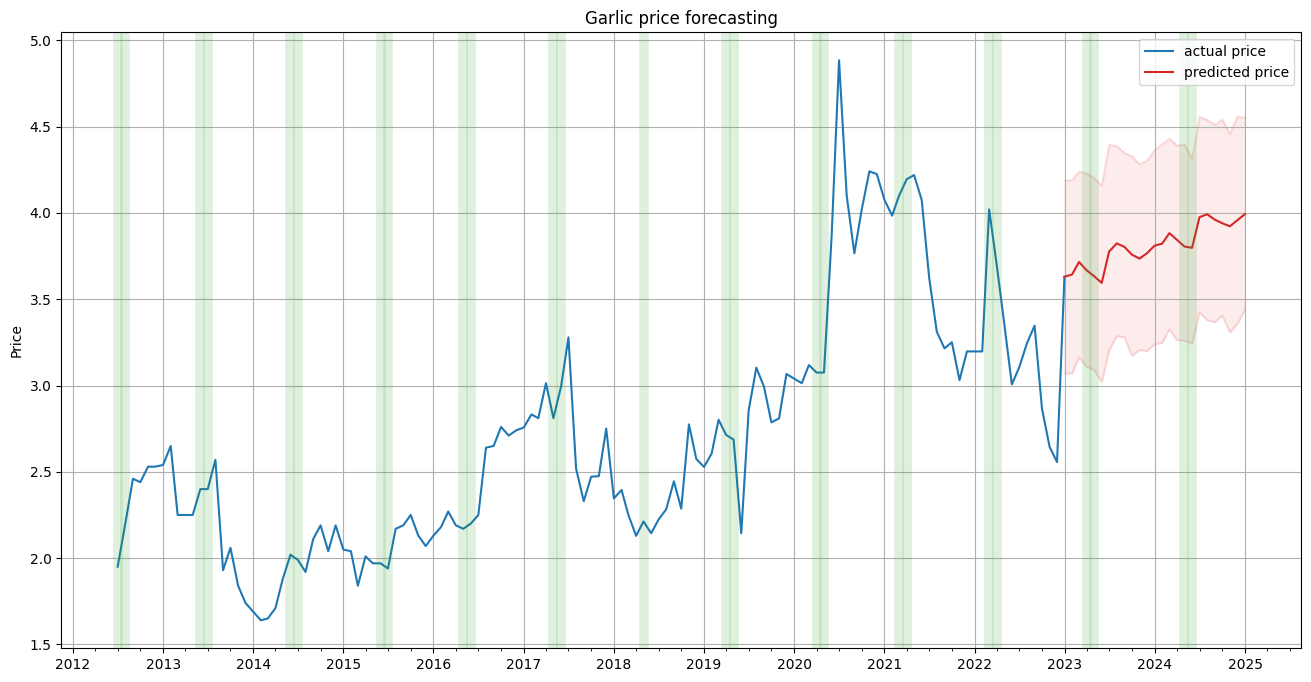

22:13:19 - cmdstanpy - INFO - Chain [1] start processing
22:13:19 - cmdstanpy - INFO - Chain [1] done processing


151


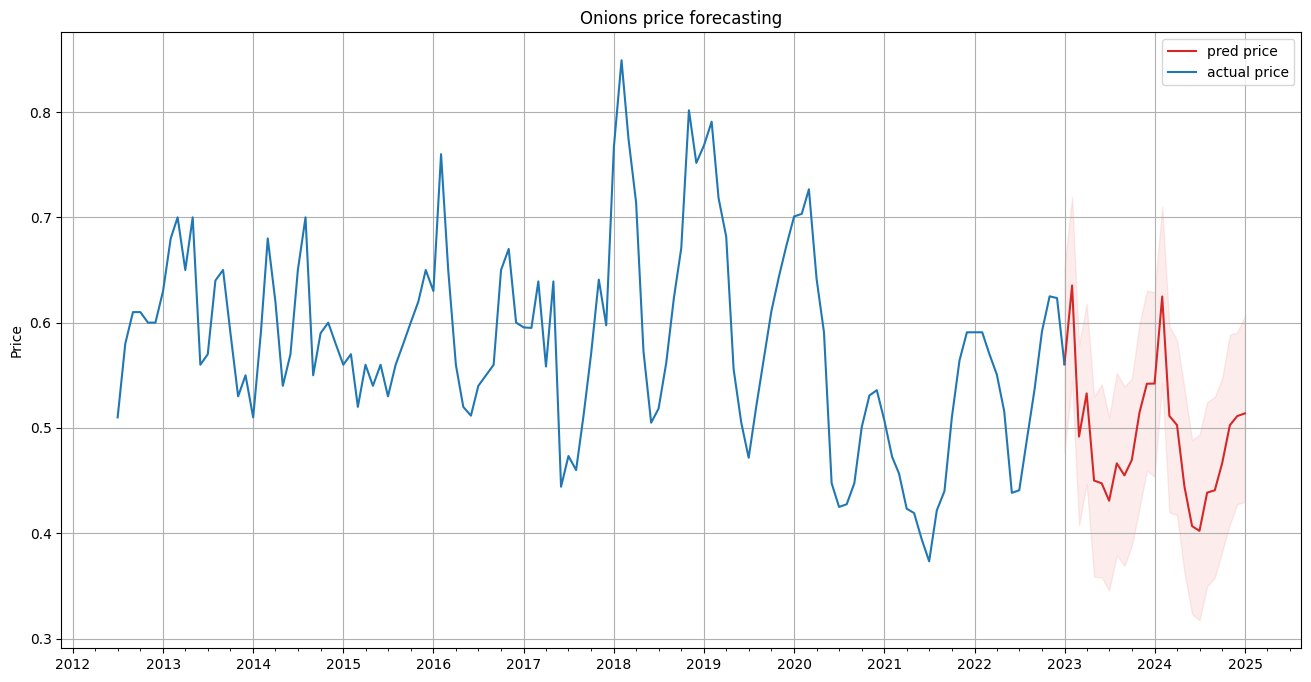

22:13:19 - cmdstanpy - INFO - Chain [1] start processing
22:13:19 - cmdstanpy - INFO - Chain [1] done processing


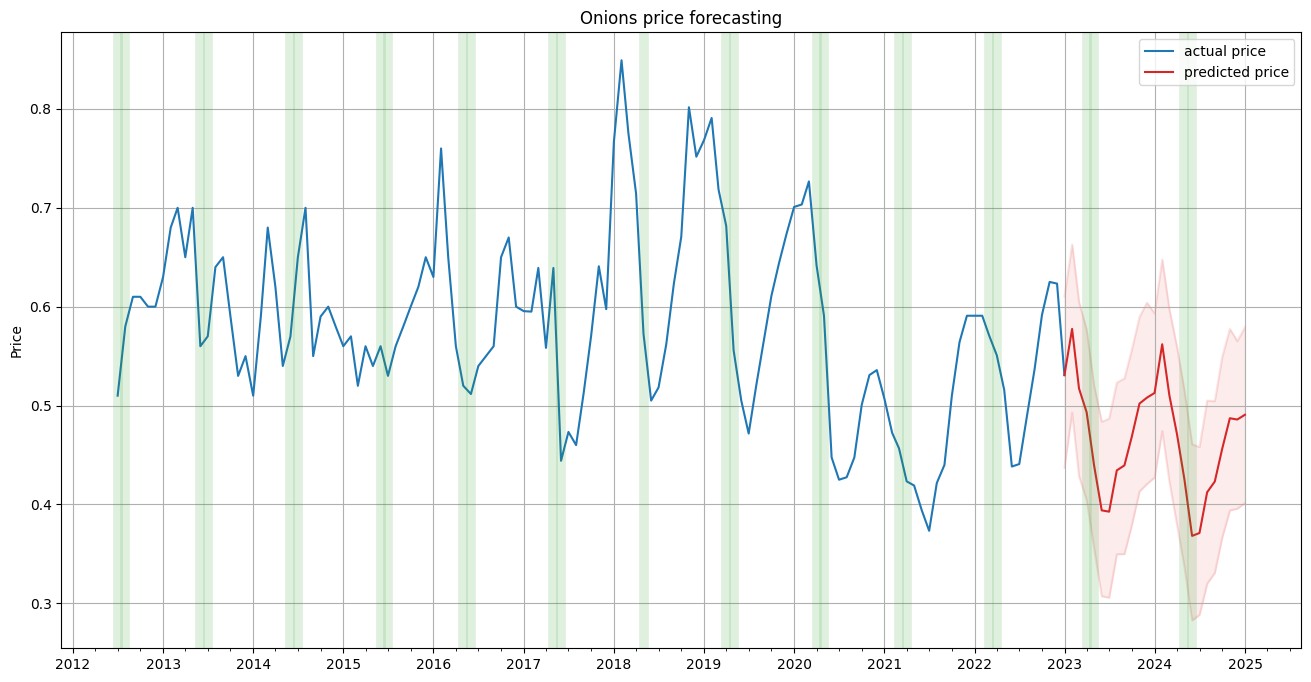

22:13:20 - cmdstanpy - INFO - Chain [1] start processing
22:13:20 - cmdstanpy - INFO - Chain [1] done processing


151


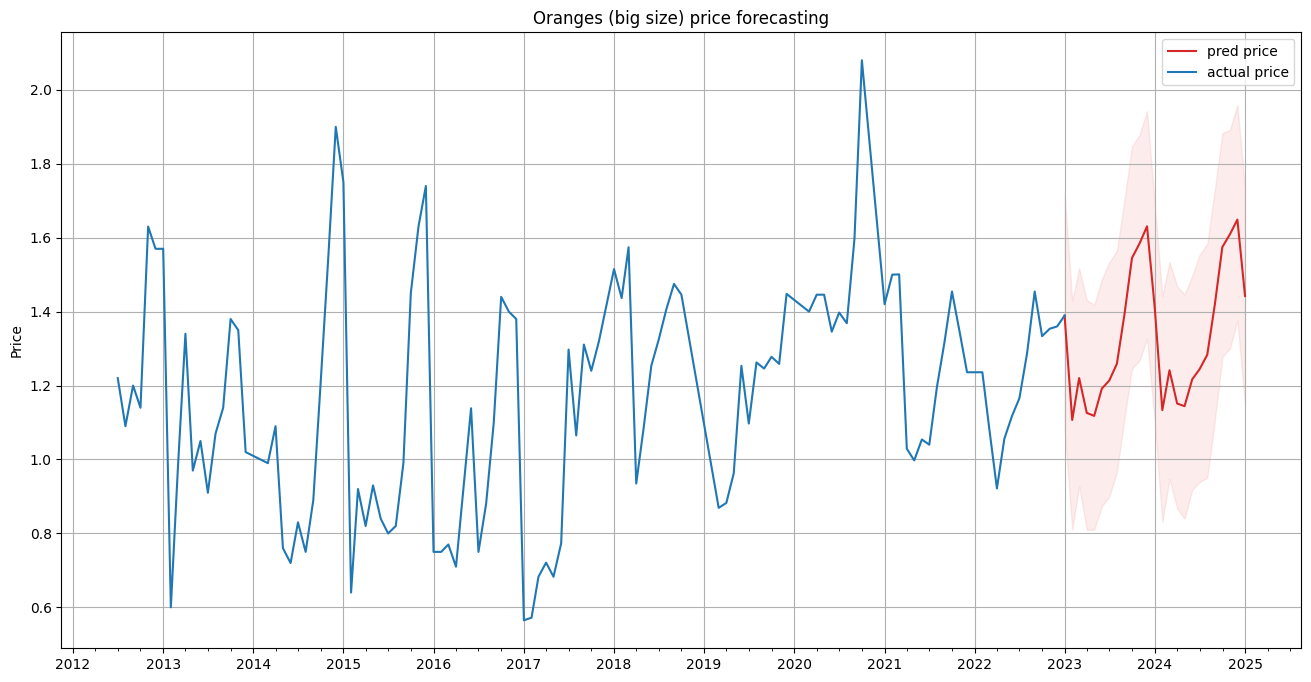

22:13:21 - cmdstanpy - INFO - Chain [1] start processing
22:13:21 - cmdstanpy - INFO - Chain [1] done processing


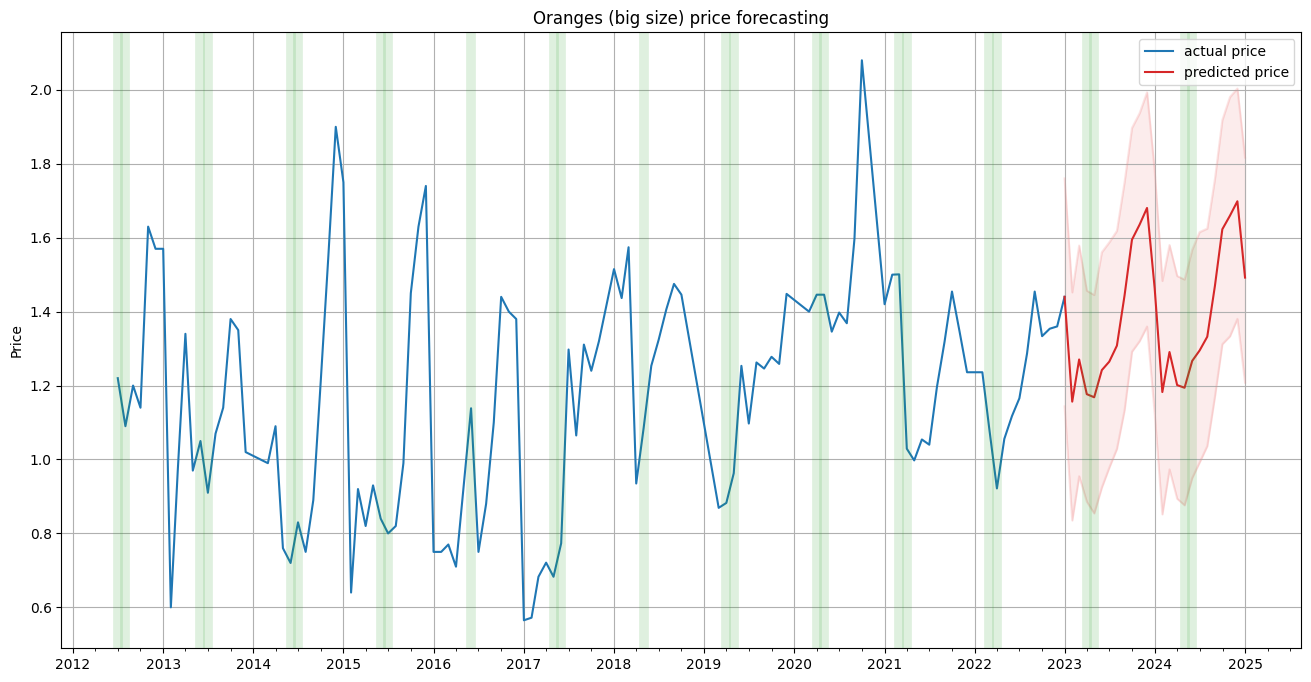

22:13:22 - cmdstanpy - INFO - Chain [1] start processing


139


22:13:22 - cmdstanpy - INFO - Chain [1] done processing


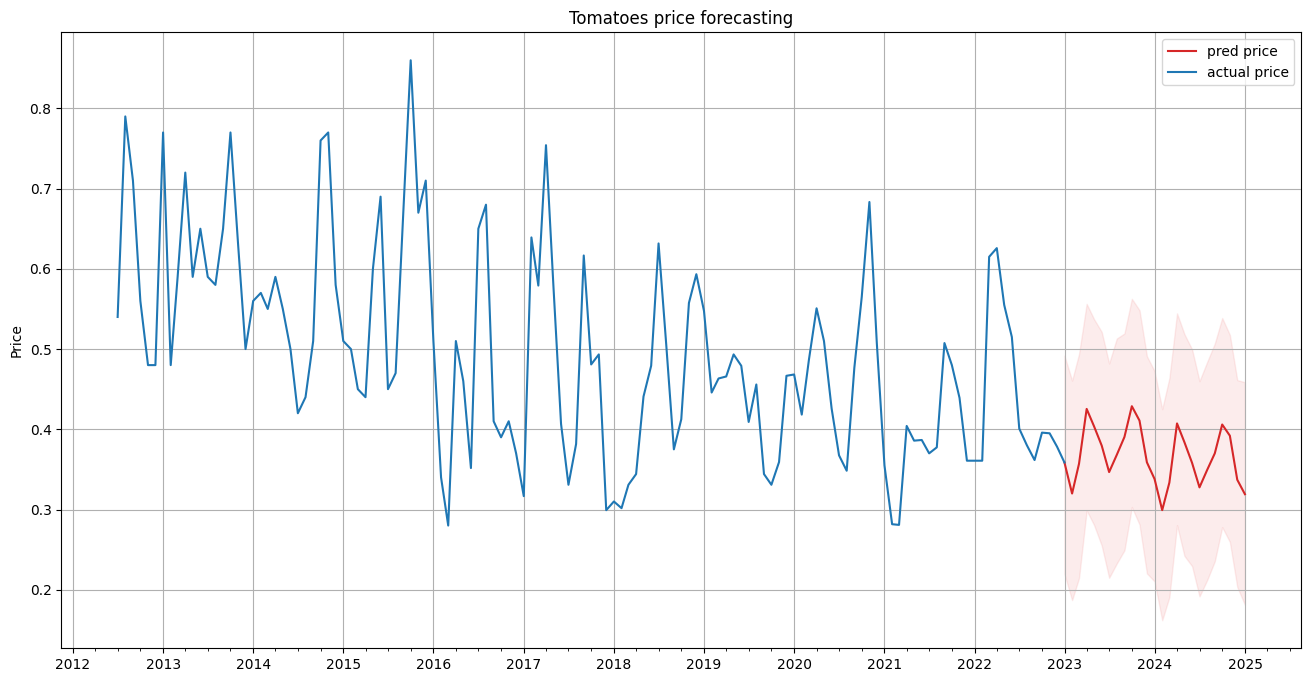

22:13:22 - cmdstanpy - INFO - Chain [1] start processing
22:13:22 - cmdstanpy - INFO - Chain [1] done processing


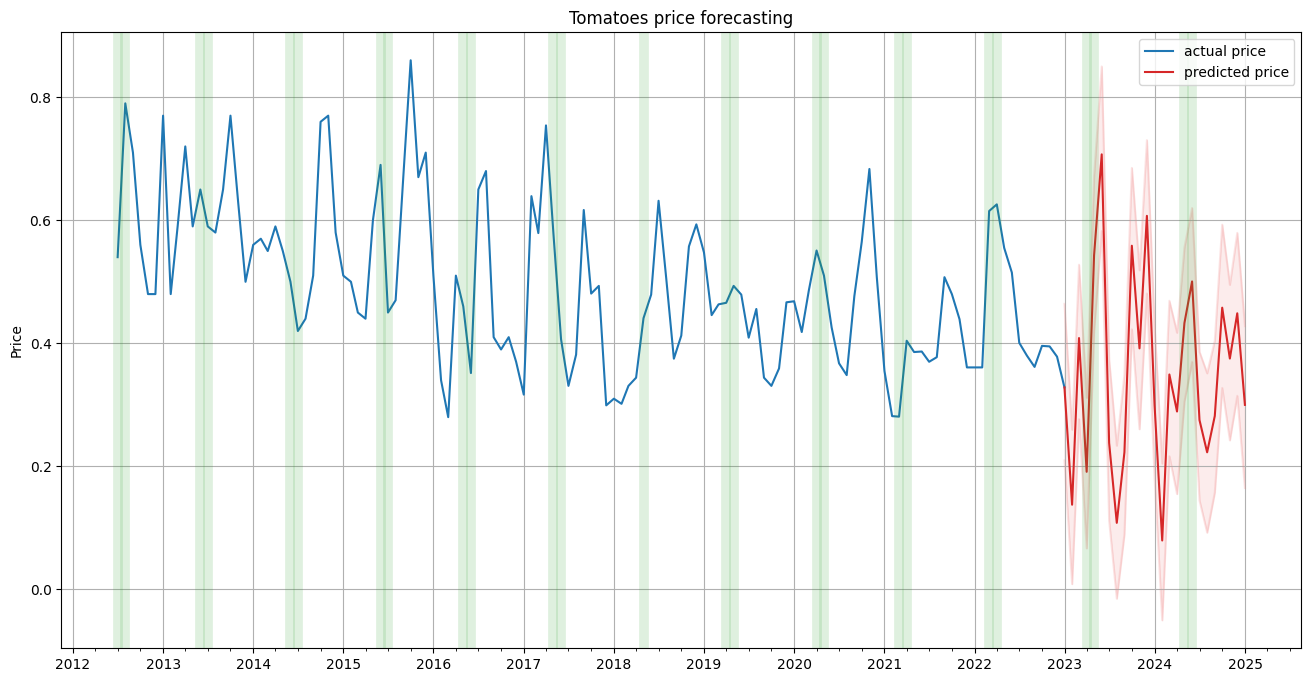

151


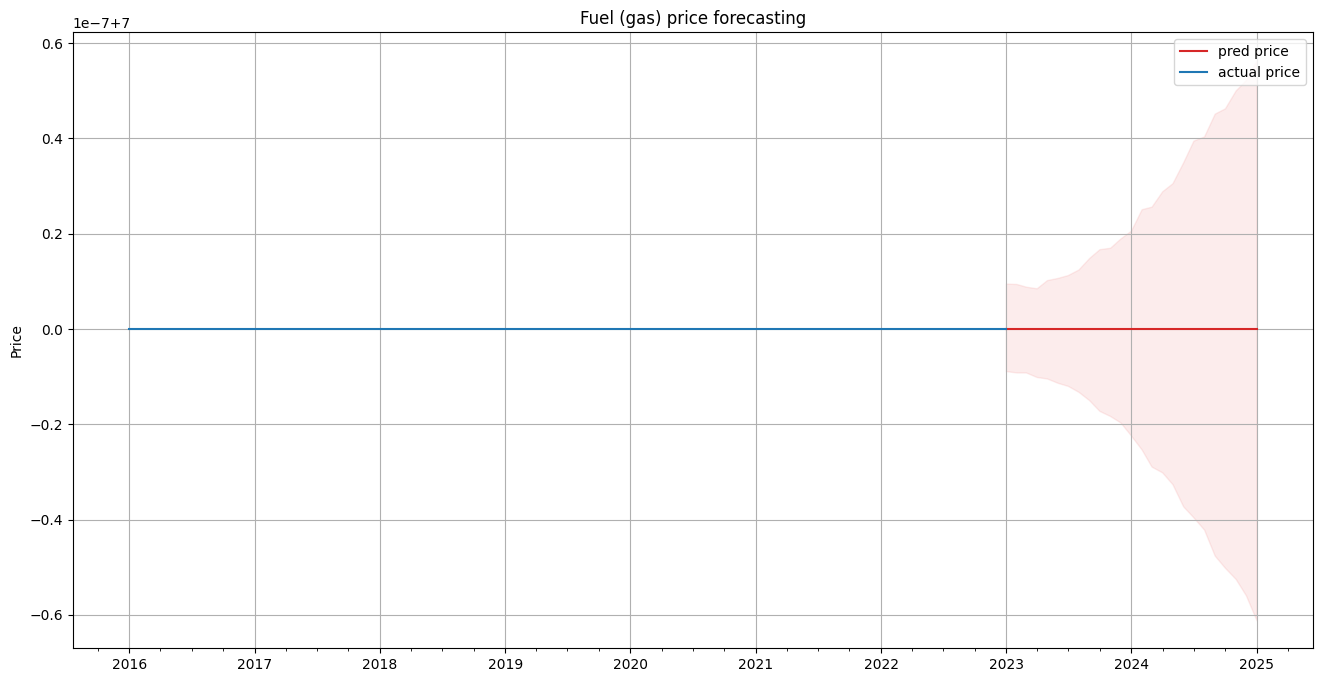

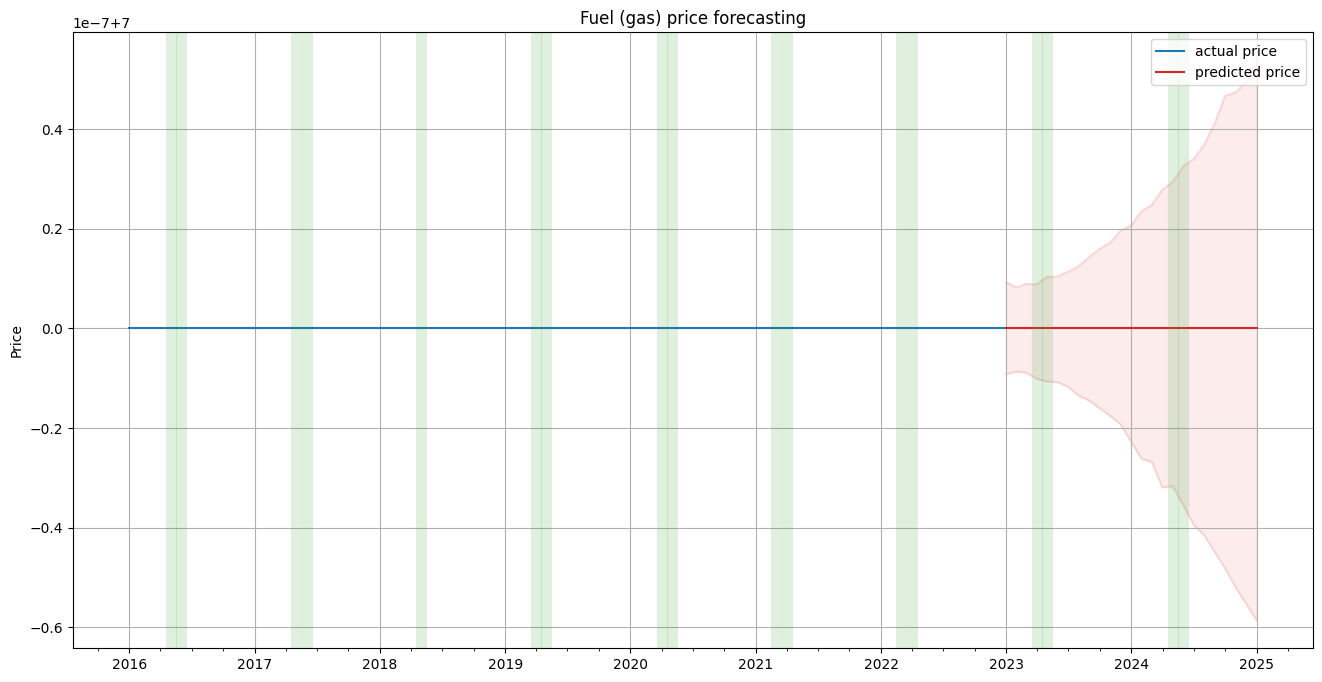

22:13:24 - cmdstanpy - INFO - Chain [1] start processing


109


22:13:25 - cmdstanpy - INFO - Chain [1] done processing


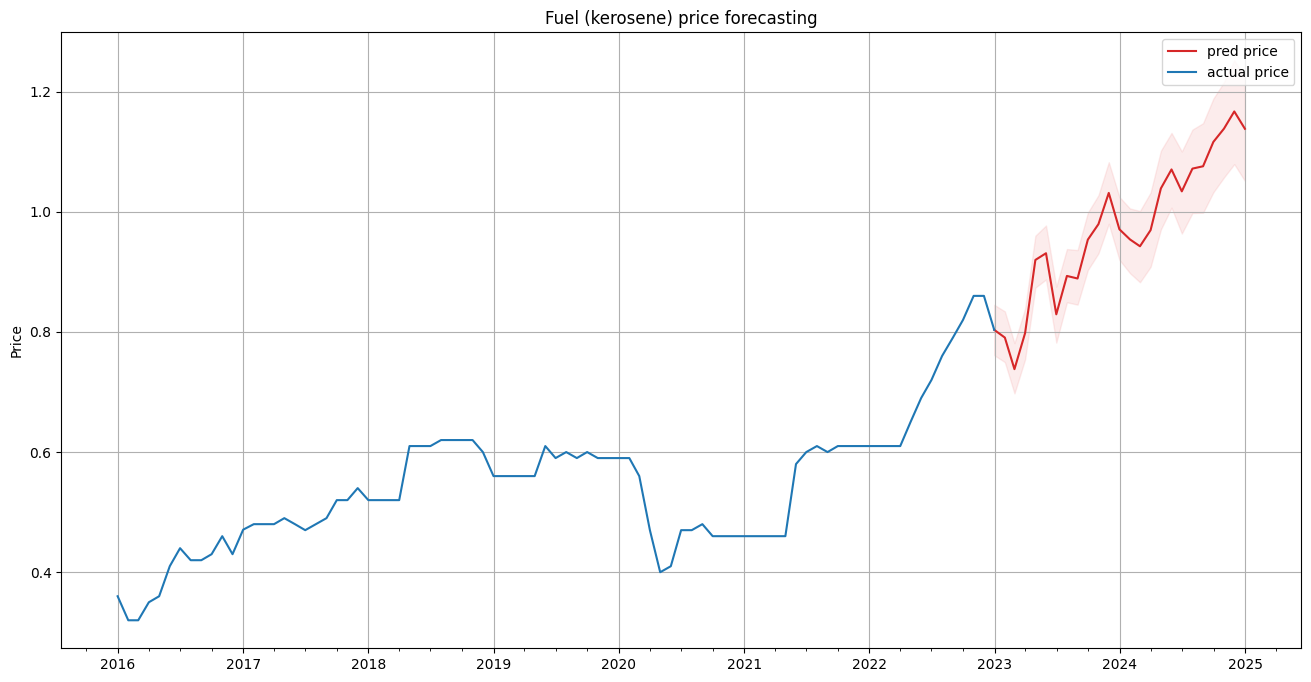

22:13:25 - cmdstanpy - INFO - Chain [1] start processing
22:13:26 - cmdstanpy - INFO - Chain [1] done processing


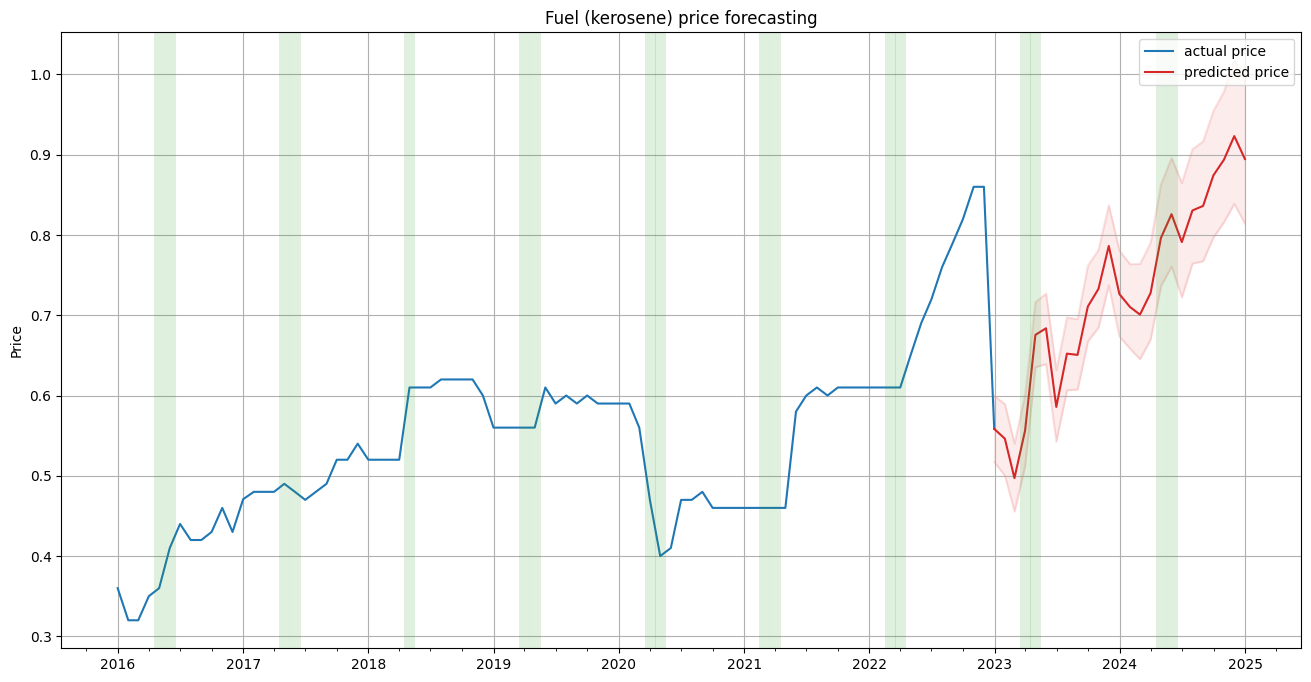

22:13:26 - cmdstanpy - INFO - Chain [1] start processing


109


22:13:27 - cmdstanpy - INFO - Chain [1] done processing


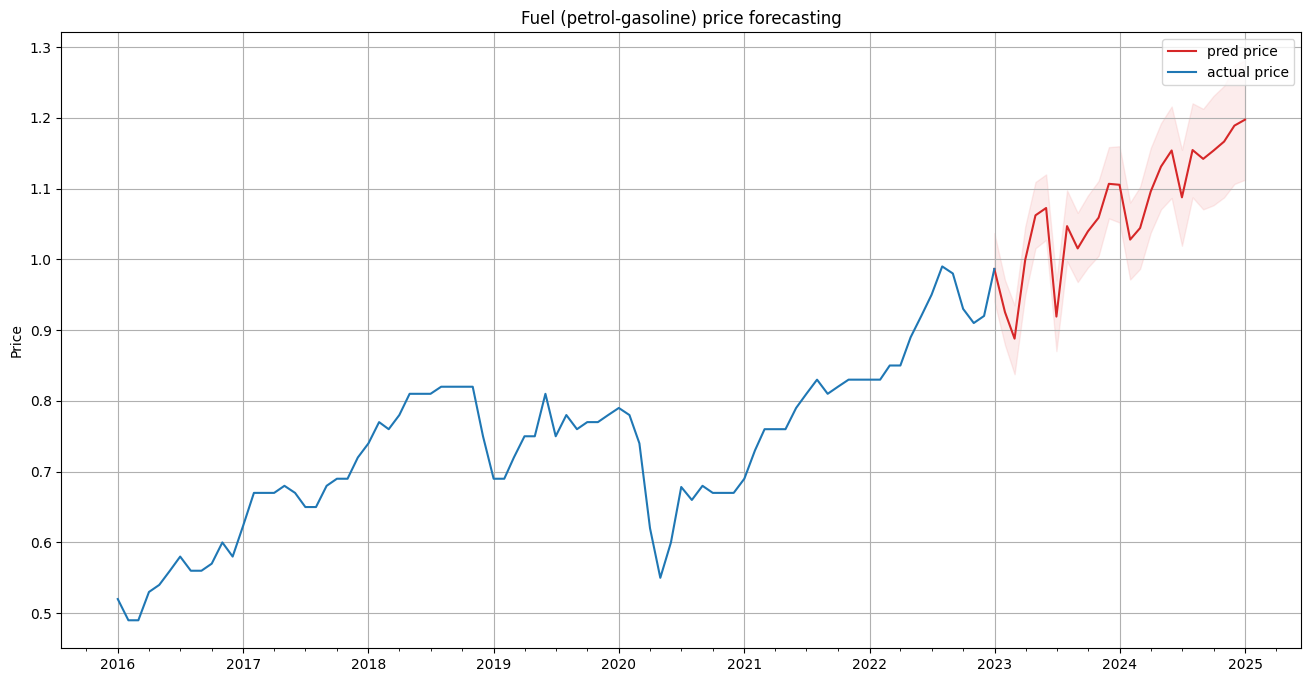

22:13:27 - cmdstanpy - INFO - Chain [1] start processing
22:13:28 - cmdstanpy - INFO - Chain [1] done processing


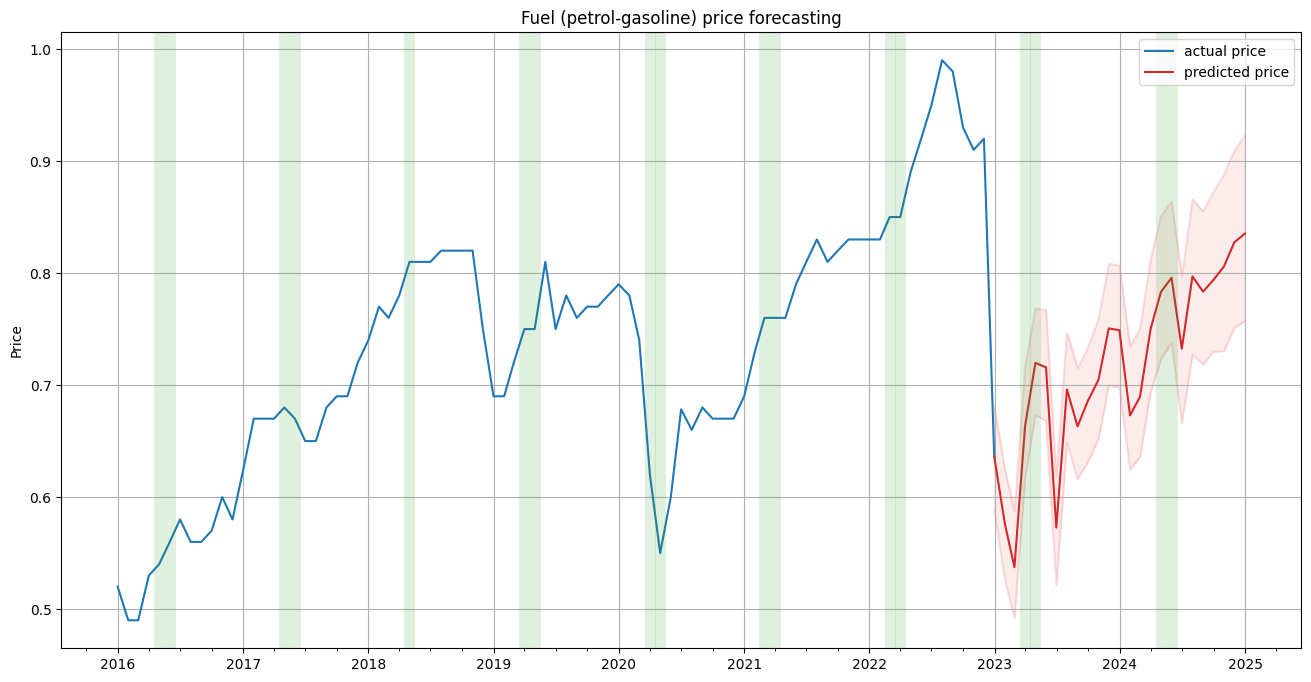

22:13:28 - cmdstanpy - INFO - Chain [1] start processing


109


22:13:29 - cmdstanpy - INFO - Chain [1] done processing


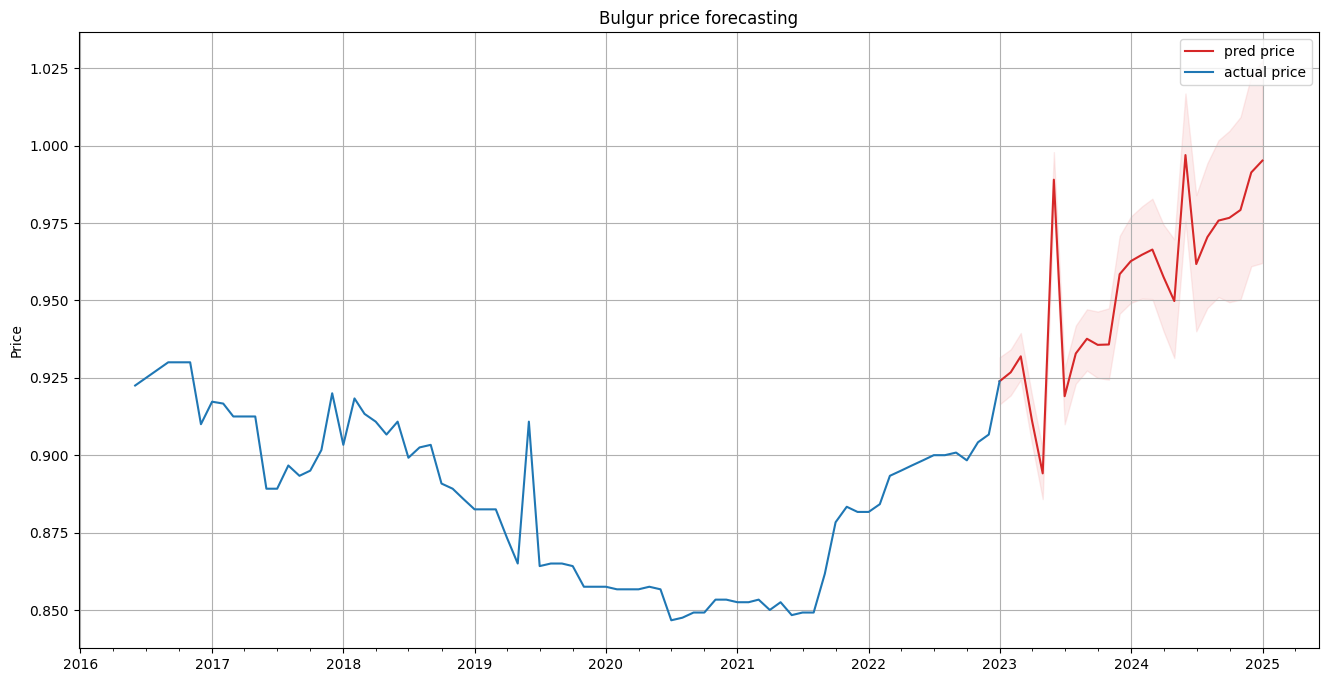

22:13:29 - cmdstanpy - INFO - Chain [1] start processing
22:13:30 - cmdstanpy - INFO - Chain [1] done processing


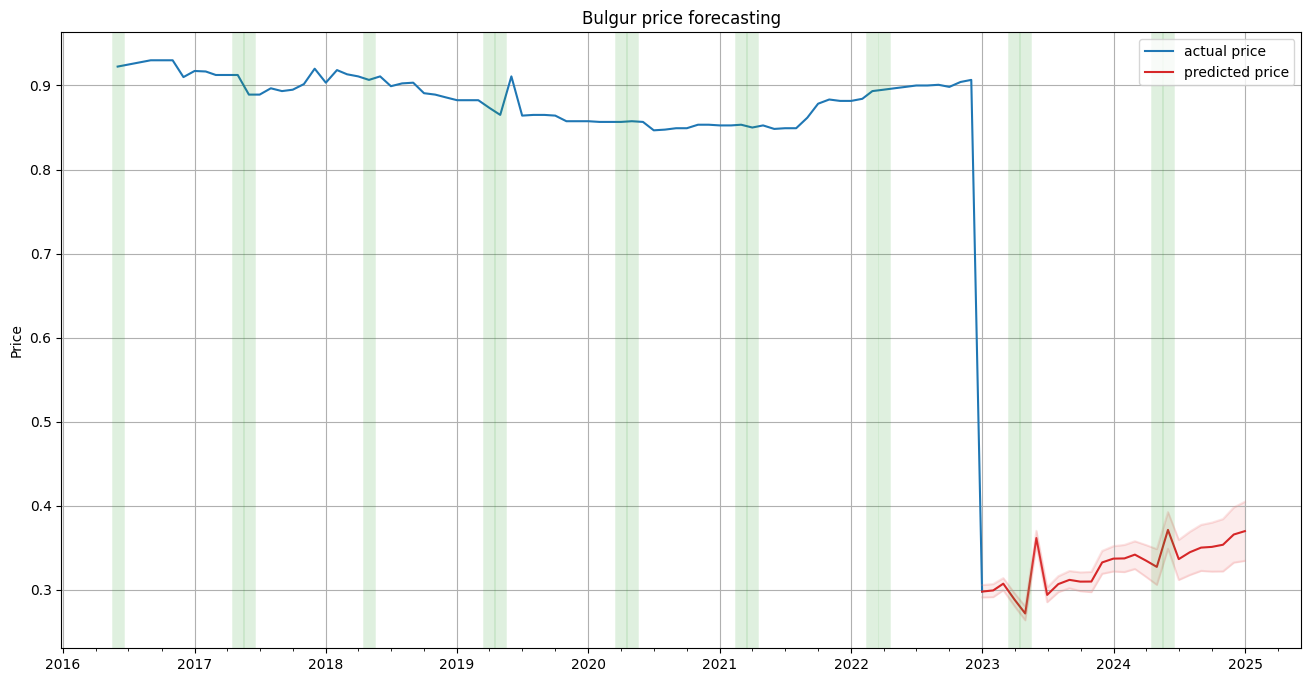

22:13:30 - cmdstanpy - INFO - Chain [1] start processing


102


22:13:31 - cmdstanpy - INFO - Chain [1] done processing


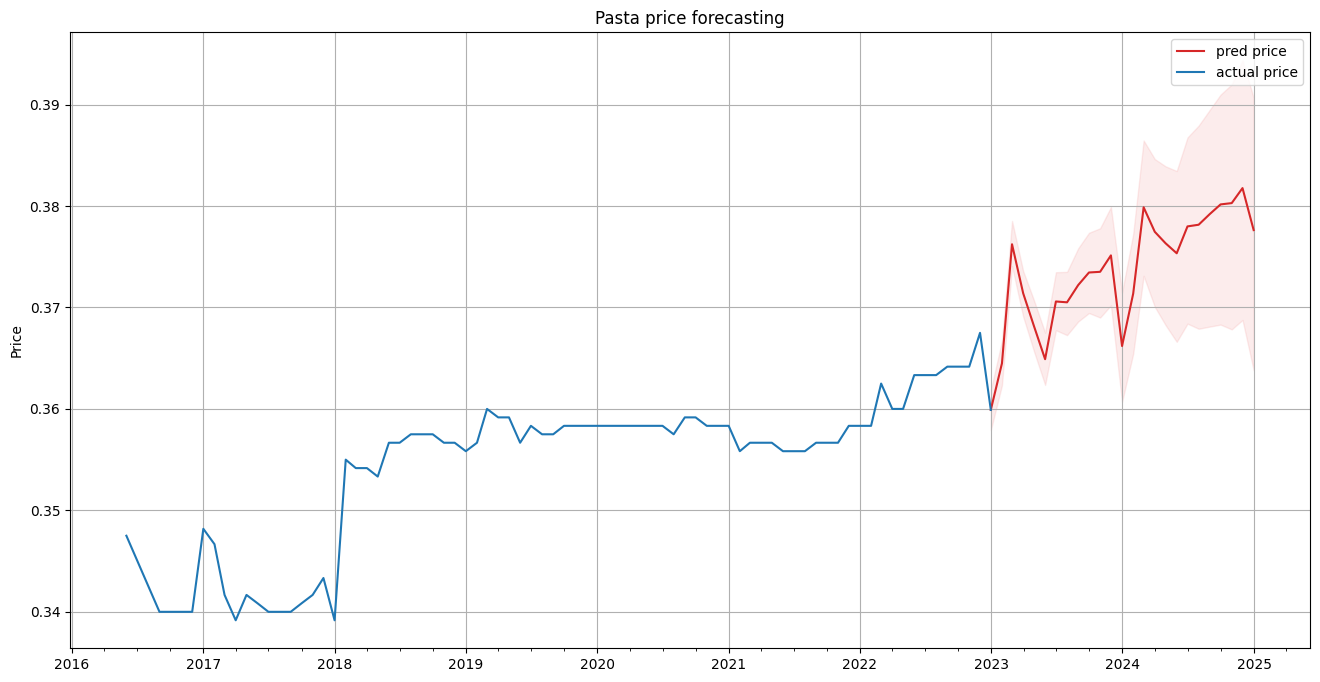

22:13:31 - cmdstanpy - INFO - Chain [1] start processing
22:13:32 - cmdstanpy - INFO - Chain [1] done processing


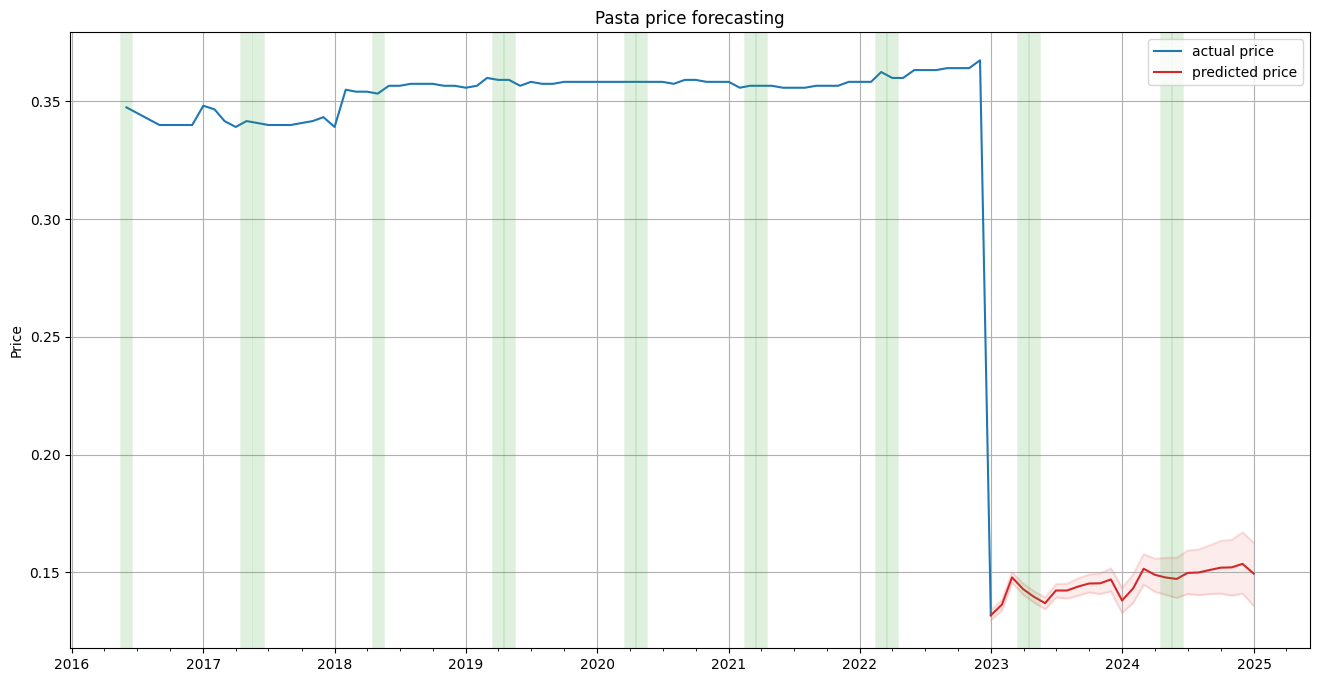

22:13:32 - cmdstanpy - INFO - Chain [1] start processing


102


22:13:33 - cmdstanpy - INFO - Chain [1] done processing


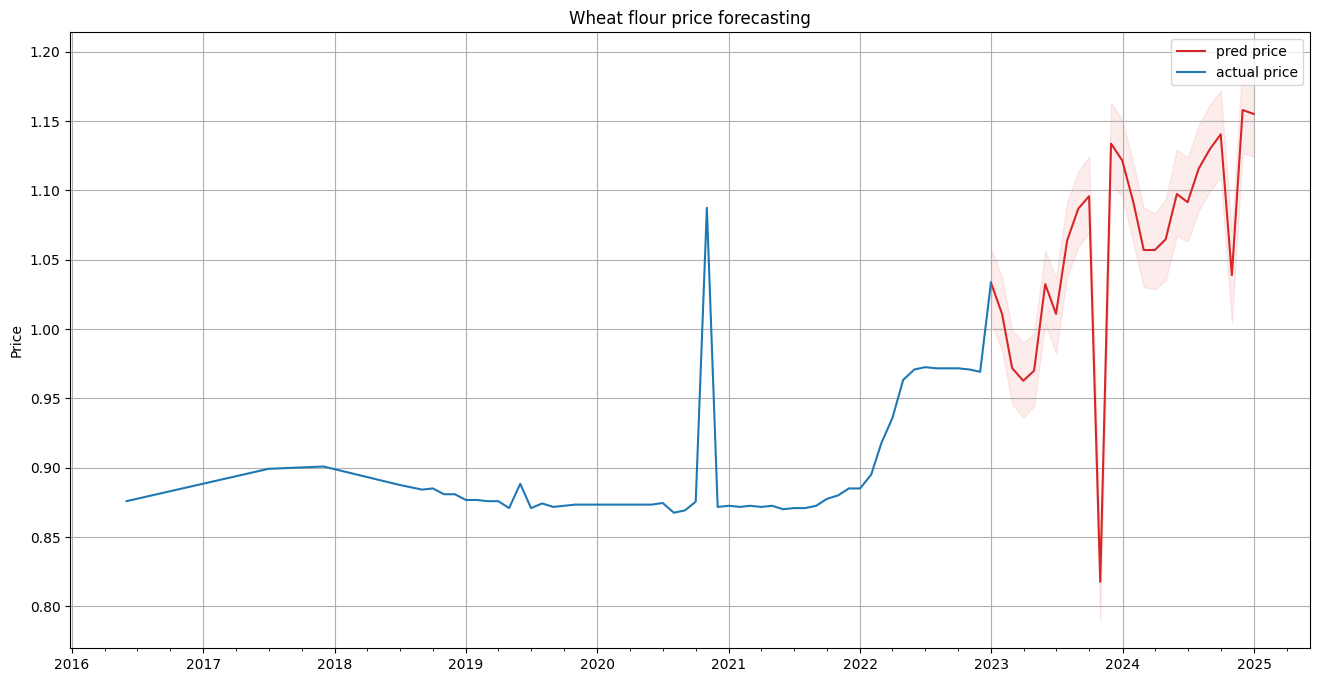

22:13:33 - cmdstanpy - INFO - Chain [1] start processing
22:13:33 - cmdstanpy - INFO - Chain [1] done processing


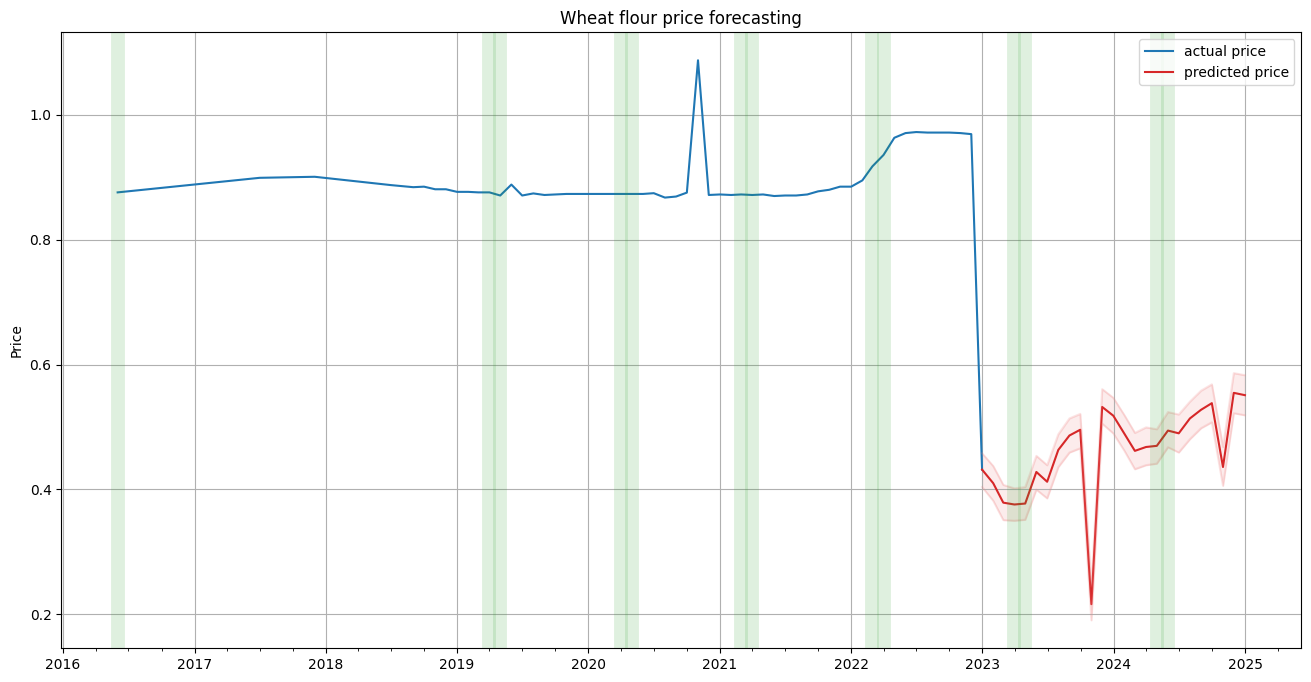

22:13:34 - cmdstanpy - INFO - Chain [1] start processing


82


22:13:35 - cmdstanpy - INFO - Chain [1] done processing


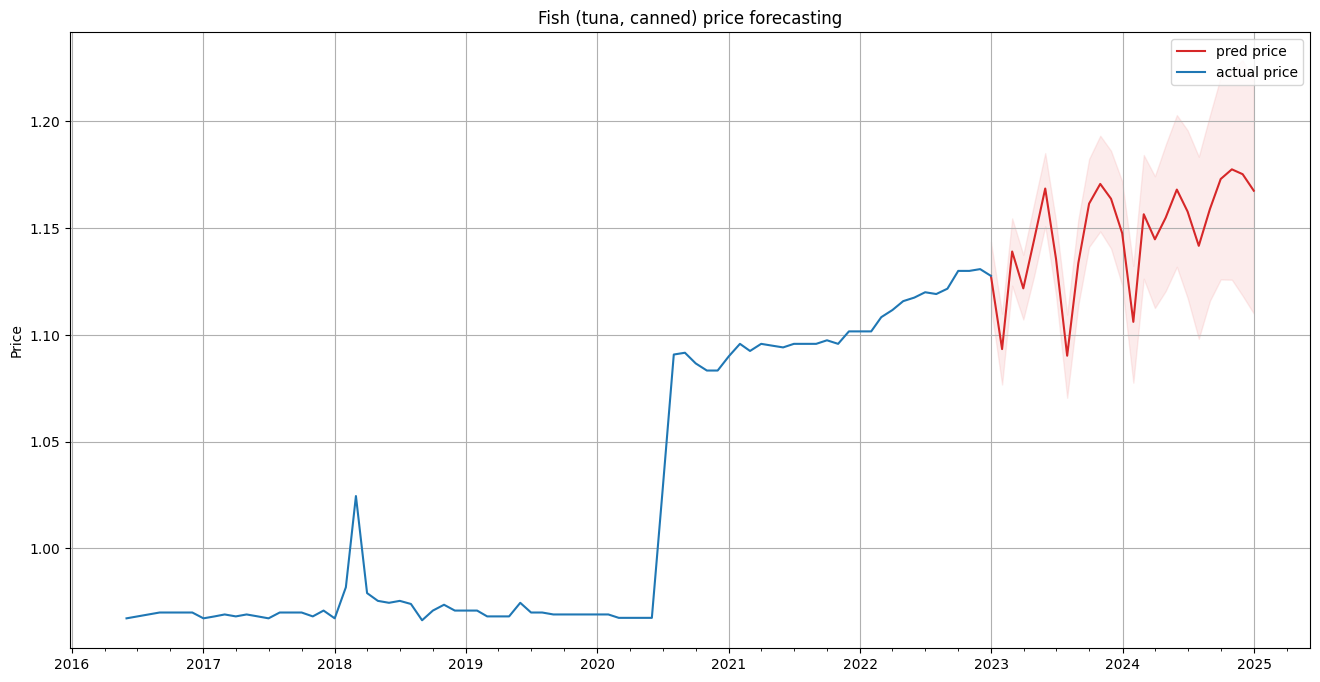

22:13:35 - cmdstanpy - INFO - Chain [1] start processing
22:13:36 - cmdstanpy - INFO - Chain [1] done processing


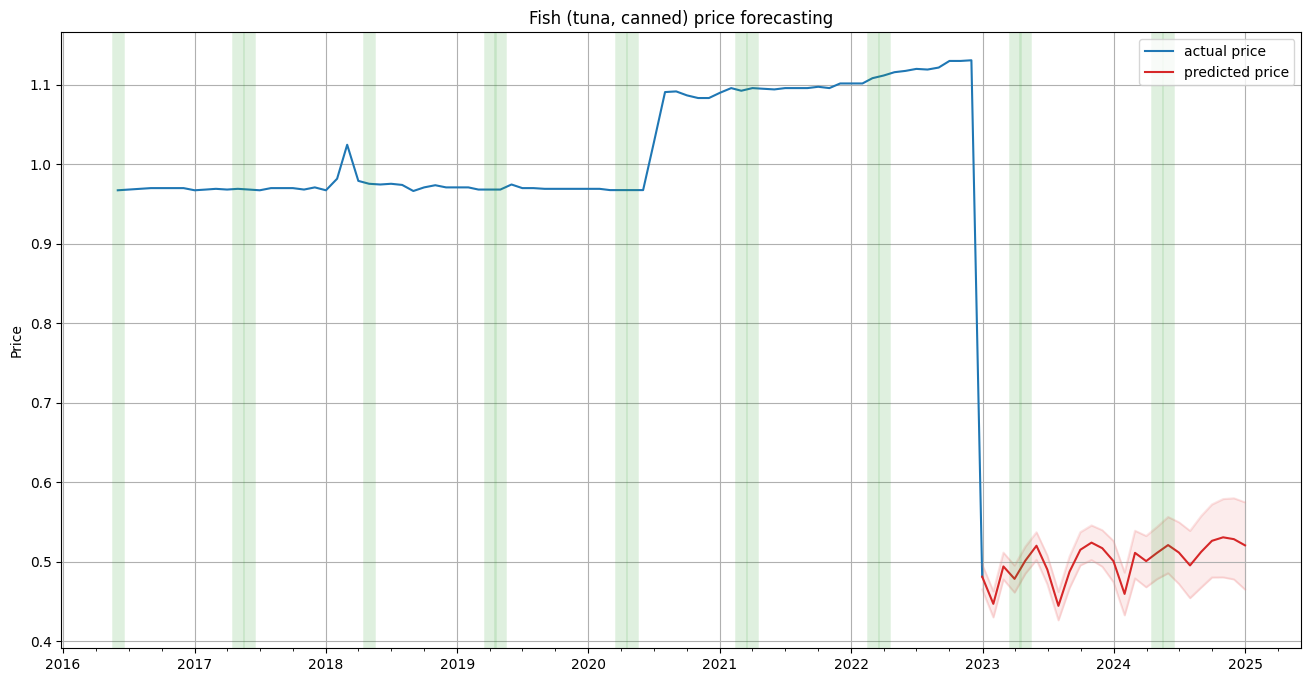

22:13:36 - cmdstanpy - INFO - Chain [1] start processing


102


22:13:37 - cmdstanpy - INFO - Chain [1] done processing


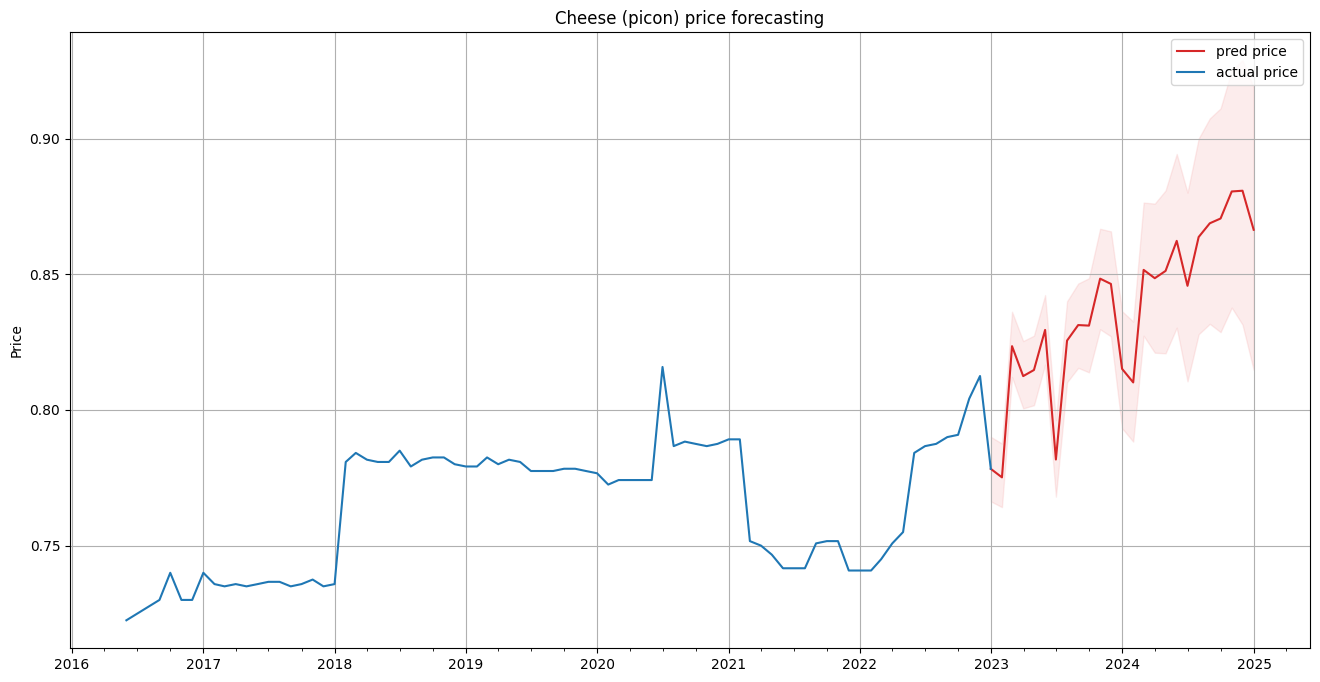

22:13:37 - cmdstanpy - INFO - Chain [1] start processing
22:13:37 - cmdstanpy - INFO - Chain [1] done processing


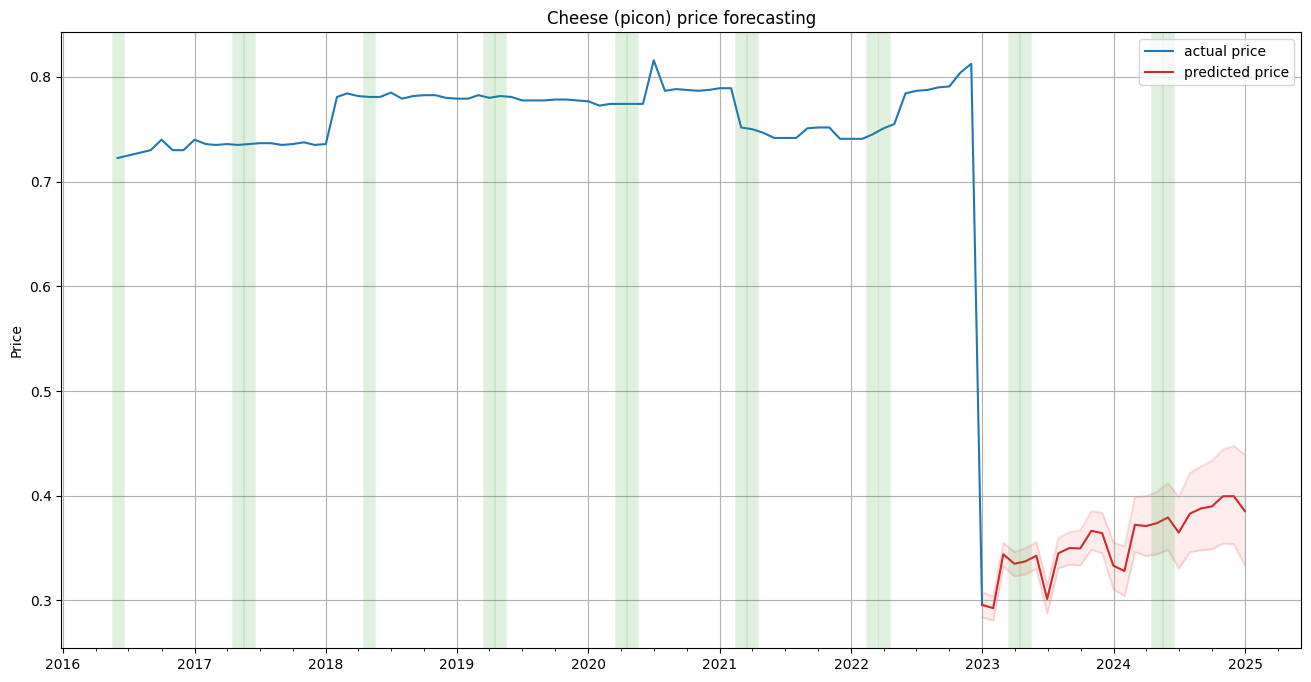

22:13:38 - cmdstanpy - INFO - Chain [1] start processing


102


22:13:38 - cmdstanpy - INFO - Chain [1] done processing


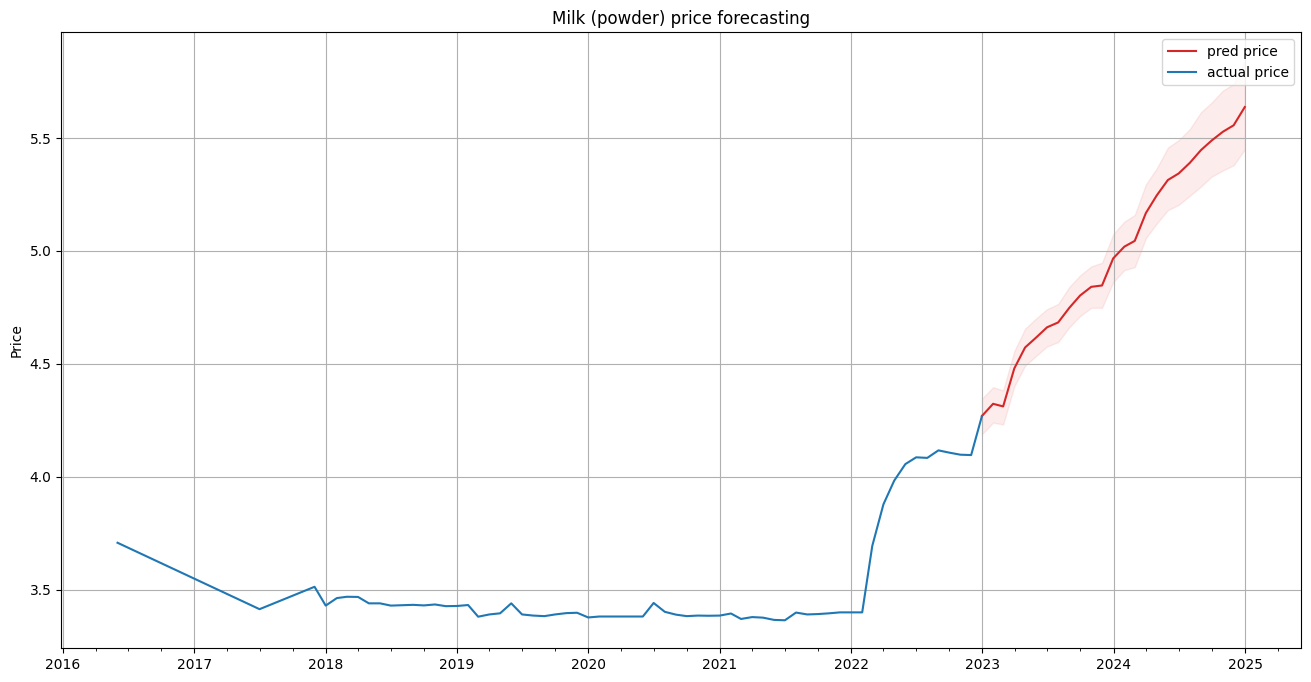

22:13:39 - cmdstanpy - INFO - Chain [1] start processing
22:13:40 - cmdstanpy - INFO - Chain [1] done processing


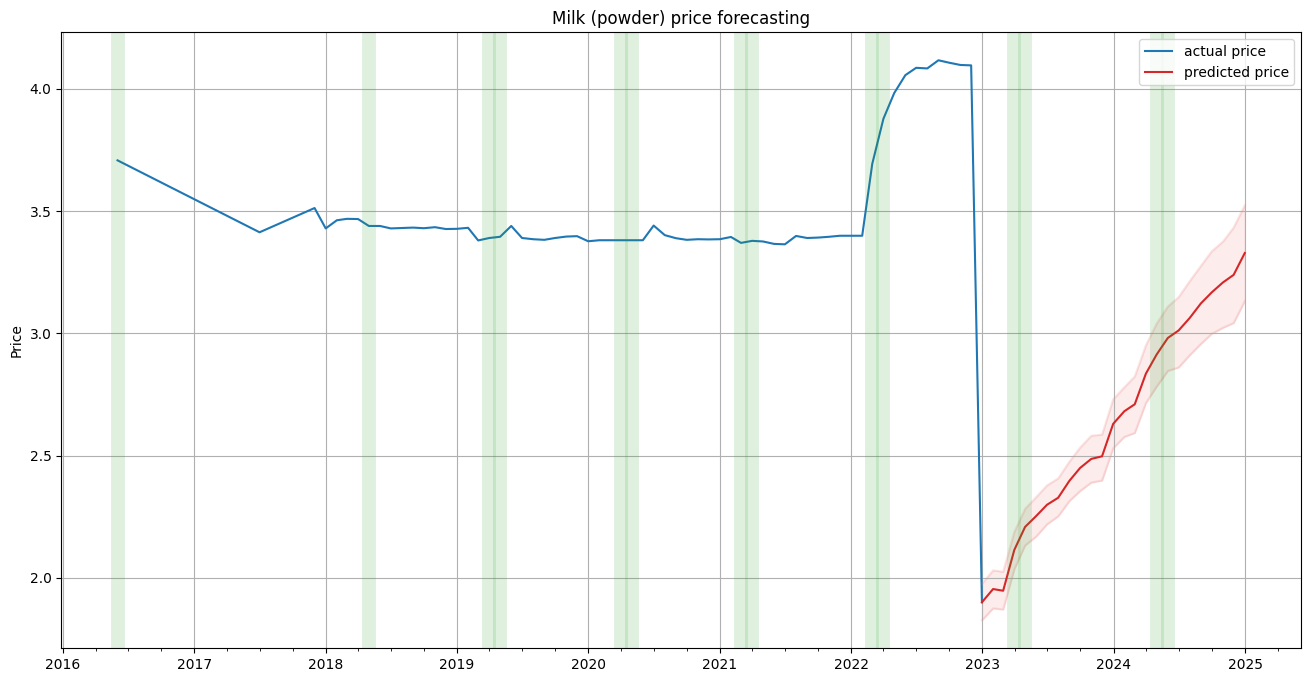

22:13:40 - cmdstanpy - INFO - Chain [1] start processing


88


22:13:40 - cmdstanpy - INFO - Chain [1] done processing


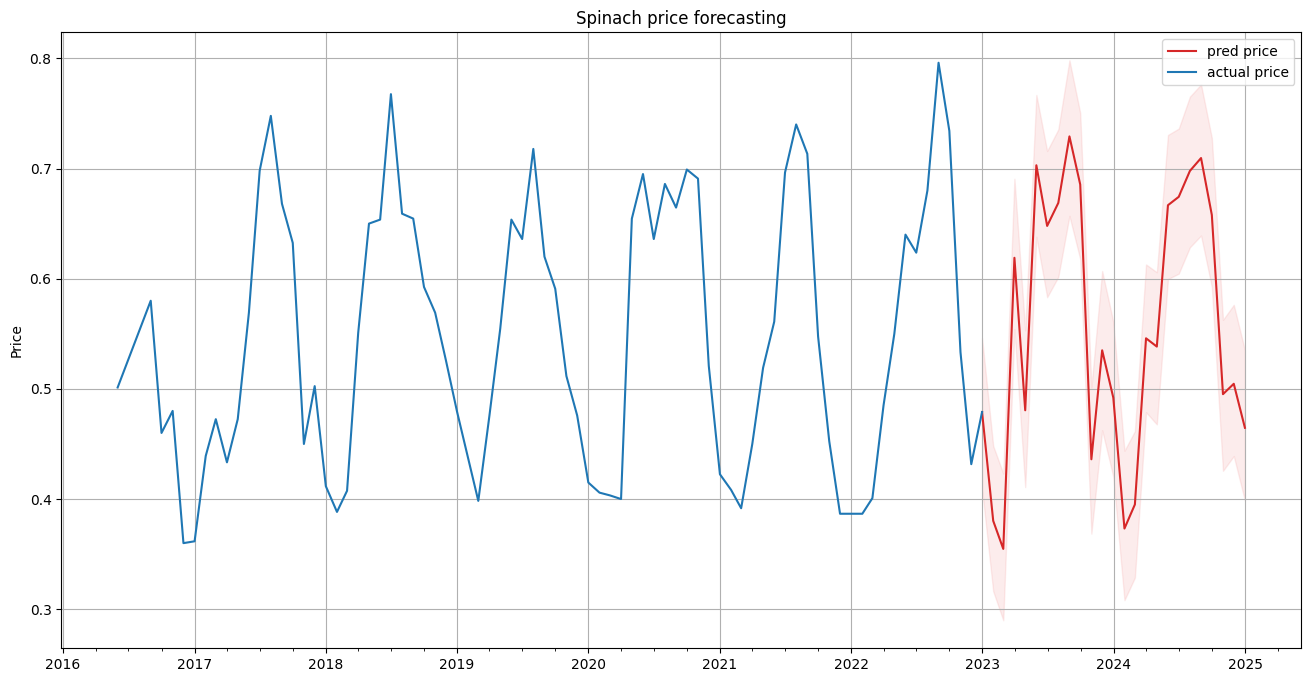

22:13:41 - cmdstanpy - INFO - Chain [1] start processing
22:13:41 - cmdstanpy - INFO - Chain [1] done processing


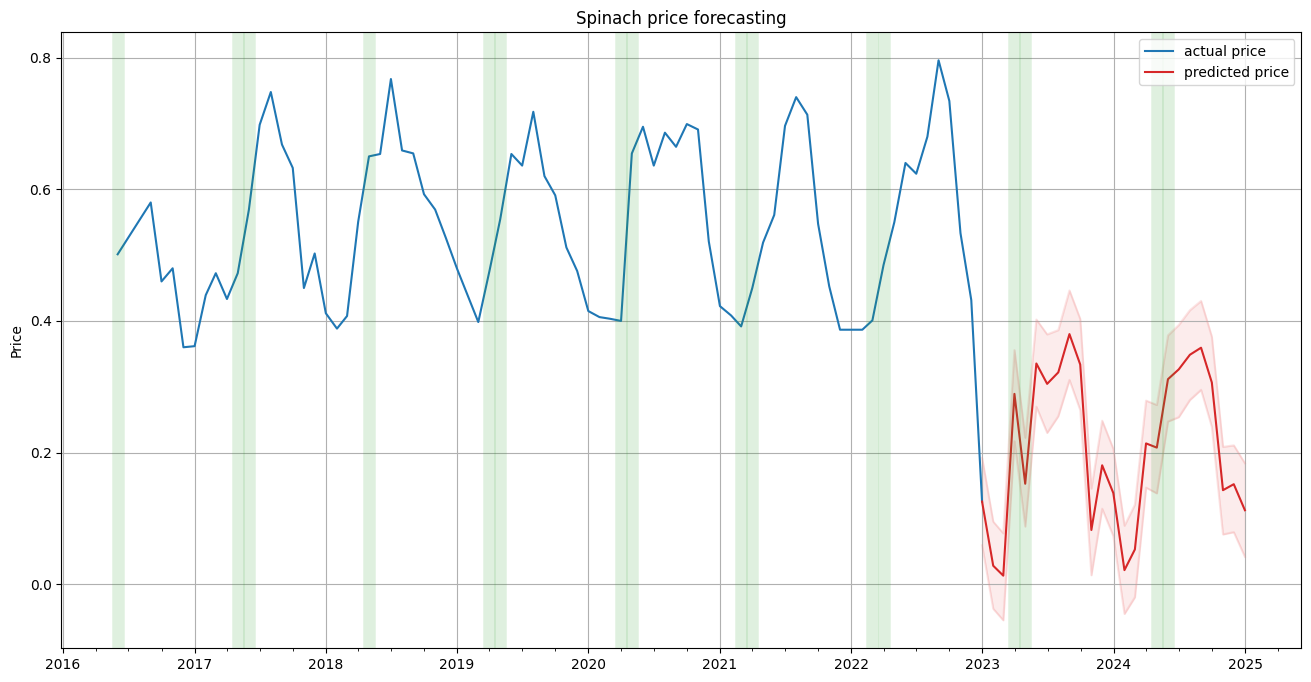

22:13:42 - cmdstanpy - INFO - Chain [1] start processing


102


22:13:42 - cmdstanpy - INFO - Chain [1] done processing


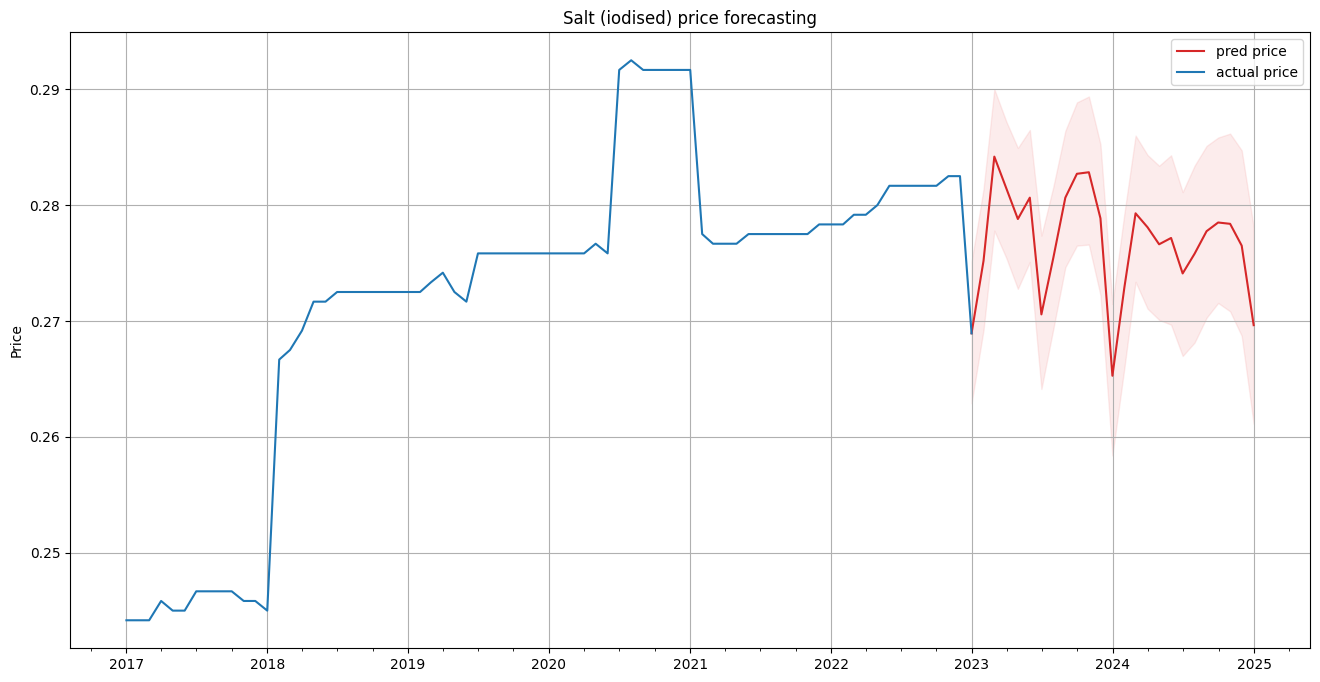

22:13:43 - cmdstanpy - INFO - Chain [1] start processing
22:13:43 - cmdstanpy - INFO - Chain [1] done processing


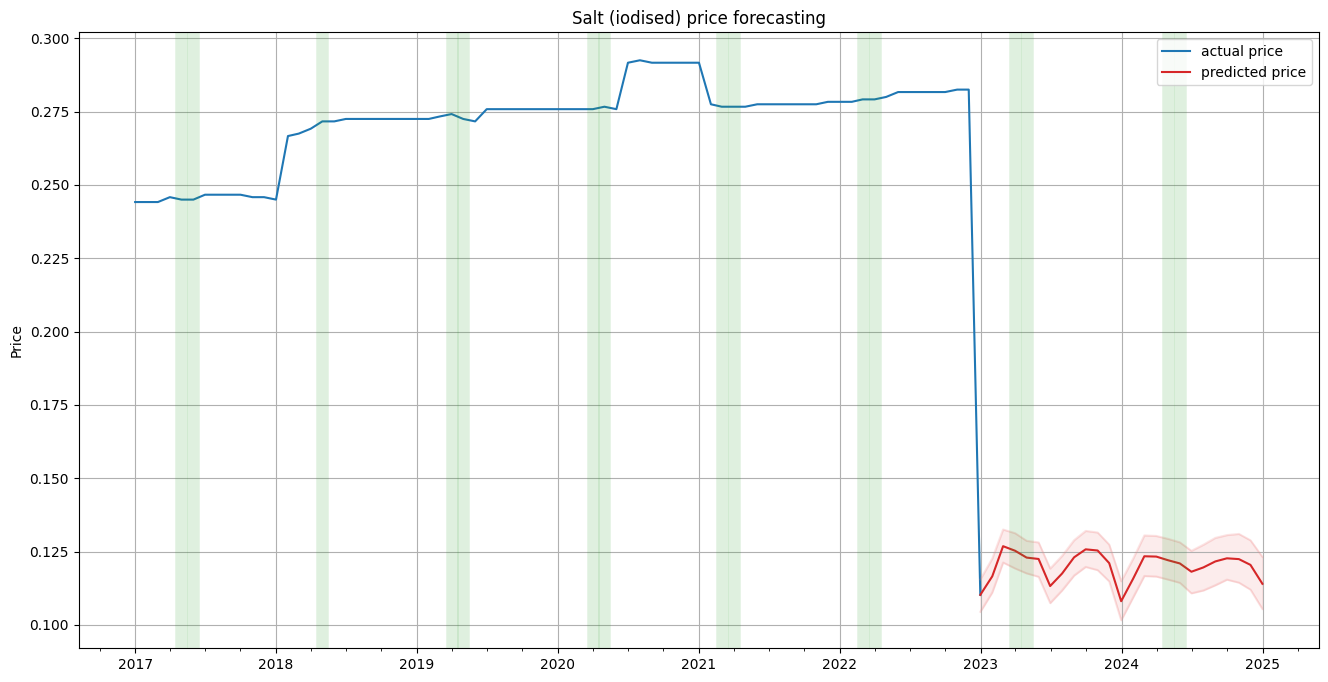

22:13:44 - cmdstanpy - INFO - Chain [1] start processing


97


22:13:44 - cmdstanpy - INFO - Chain [1] done processing


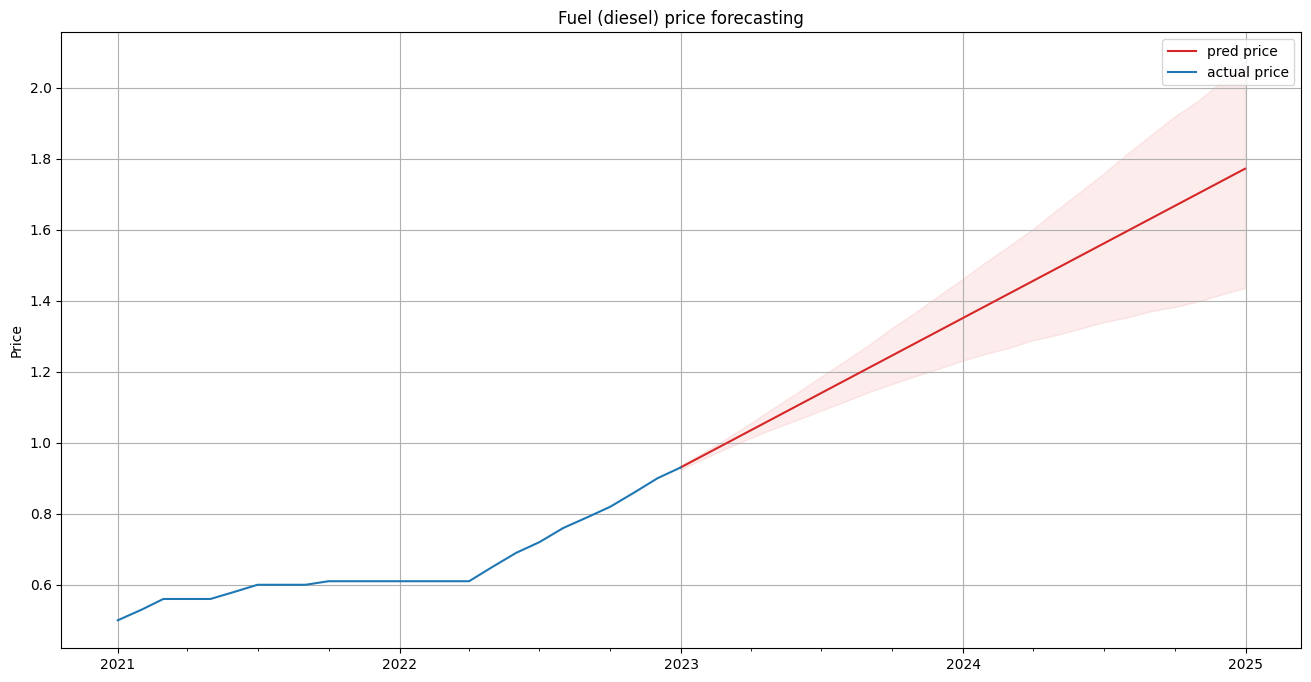

22:13:44 - cmdstanpy - INFO - Chain [1] start processing
22:13:44 - cmdstanpy - INFO - Chain [1] done processing


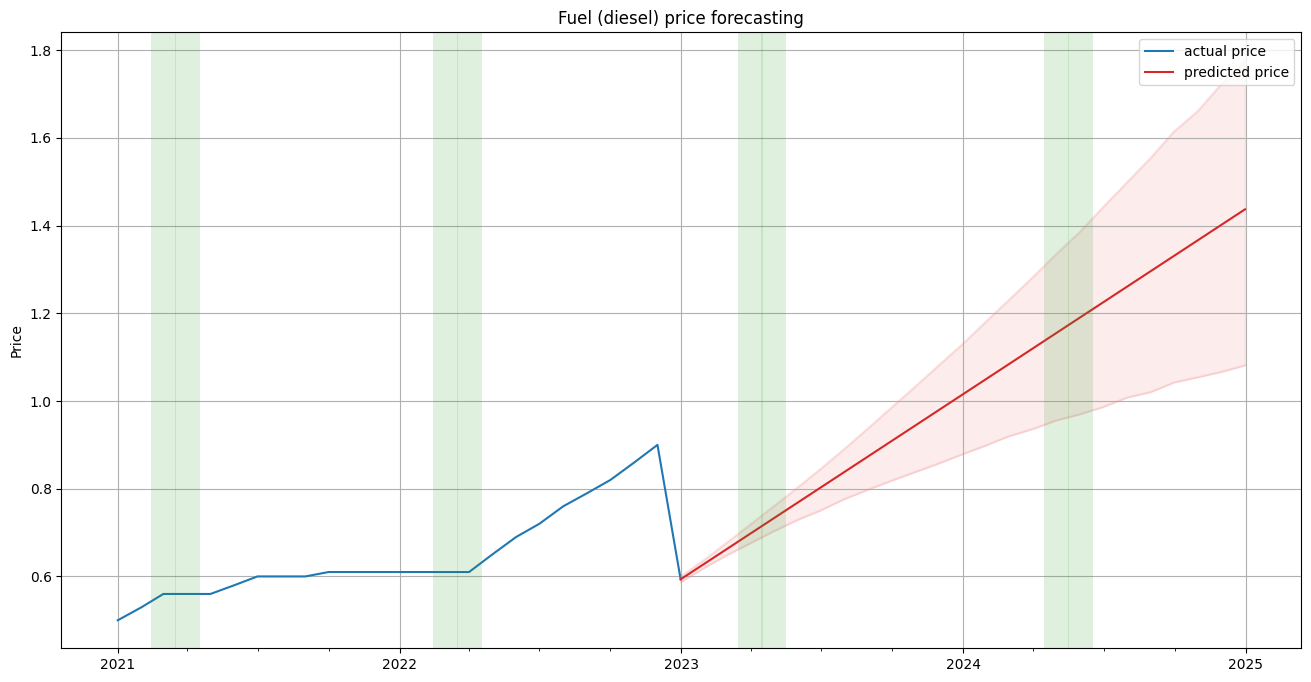

49


In [3]:
lst = []
se = {37, 49, 82, 88, 97, 102, 109, 139, 151, 157}
for com in range(len(commidity)):
    chosen_commidity=commidity[com]
    chosen_commidity
    df=pd.read_csv('food_prices_jor.csv')

    df.drop_duplicates(inplace=True) # droping the duplicates if there is any


    df['date'] = pd.to_datetime(df['date']).dt.to_period('M') # to make new columns year , month

    df=df.groupby(['H-date','date','category','commodity'])['price'].mean().reset_index()
    df.sort_values(by=['date','category','commodity'],inplace=True)

    df = df.loc[df['date'] > '2011-12-15' ] # filltering the data

    def is_ramadan(x):
        if int(x.split(sep='/')[1]) in [8,9]:
            return 1
        else : 
            return 0
    df['is_ramdan']=df['H-date'].apply(is_ramadan) # to make new columns with true false values (true when hijri months is equal to 8,9,10)

    newdata=df

    df=df.loc[df['commodity']==chosen_commidity] # to filter the df inrto one commodity df  

    df.set_index(df['date'],inplace=True)
    df.index=df.index.to_timestamp()

    df.drop(['H-date','category','commodity','date'],axis=1,inplace=True) # droping the un needed columns 
    data_2=newdata
    newdata=newdata[newdata['commodity']==chosen_commidity].drop(['H-date','category','commodity','is_ramdan'],axis=1).reset_index(drop=True).rename(columns={'date':'ds','price':'y'})
    newdata['ds']=newdata['ds'].dt.to_timestamp()

    train_newdata=newdata.iloc[:-20]
    test_newdata=newdata.iloc[-20:]

    model = prophet.Prophet()
    model.fit(newdata)

    prophet_pred=model.predict(newdata)
    future=model.make_future_dataframe(periods=25,freq='M',include_history=False)
    forecast=model.predict(future)


    xax=pd.concat([newdata['ds'],forecast['ds']], axis=0)
    yax=pd.concat([newdata['y'],forecast['yhat']], axis=0)
    # plot the prediction with the actual price 

    fig,ax=plt.subplots(figsize=(16,8))
    ax.plot(xax[-25:], yax[-25:], color='tab:red',label='pred price')
    ax.plot(xax[:-24], yax[:-24], color='tab:blue',label='actual price')

    plt.fill_between(forecast['ds'][-25:], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.15,color='lightcoral')


    # ax.set_xticks()
    # ax.set_xticklabels(alldata['ds'])
    ax.legend(loc='upper right')

    date_format = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.set_ylabel('Price')

    plt.title(f'{chosen_commidity} price forecasting')
    plt.grid()
    plt.savefig(f'price prediction with out ramdan/{chosen_commidity} price prediction')
    plt.show()





    data_2=data_2[data_2['commodity']==chosen_commidity].drop(['H-date','category','commodity','price'],axis=1).reset_index(drop=True).rename(columns={'date':'ds','is_ramdan':'holiday'})
    data_2['ds']=data_2['ds'].dt.to_timestamp()
    data_2['holiday']=data_2['holiday'].replace({1:'ramdan',
                                             0:'not ramdan'})
    train_data_2=data_2.iloc[:-20]
    test_data_2=data_2.iloc[-20:]

    model2 = prophet.Prophet(holidays=data_2)
    model2.fit(newdata)

    prophet_pred=model2.predict(newdata)


    future=model2.make_future_dataframe(periods=25,freq='M',include_history=False)
    forecast=model2.predict(future)

    newdata['holiday']=data_2['holiday']
    future['holiday']=('not ramdan',)*3+('ramdan',)*2+('not ramdan',)*8+('not ramdan',)*3+('ramdan',)*2+('not ramdan',)*7
    future['y']=forecast['yhat']

    alldata=pd.concat([newdata,future], axis=0)





    # plot the prediction with the actual price 

    fig,ax=plt.subplots(figsize=(16,8))
    ax.plot(alldata['ds'][:-24], alldata['y'][:-24], color='tab:blue',label='actual price')
    ax.plot(alldata['ds'][-25:], alldata['y'][-25:], color='tab:red',label='predicted price')

    plt.fill_between(alldata['ds'][-25:], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.15,color='lightcoral')

    ax.plot(alldata['ds'][-25:], forecast['yhat_lower'], color='lightcoral', alpha=0.2)
    ax.plot(alldata['ds'][-25:], forecast['yhat_upper'], color='lightcoral', alpha=0.2)

    for x in alldata[alldata['holiday']=='ramdan']['ds']:
        if len(alldata) == 157:
            l = 6
        elif len(alldata) == 37:
            l = 24
        elif len(alldata) == 151:
            l = 7
        elif len(alldata) == 139:
            l = 7
        elif len(alldata) == 109:
            l = 8
        elif len(alldata) == 102:
            l = 9
        elif len(alldata) == 82:
            l = 10
        elif len(alldata) == 88:
            l = 10
        elif len(alldata) == 97:
            l = 9
        else:
            l = 18
        ax.axvline(x=x,color='tab:green',alpha=0.15,linewidth=l)
    ax.set_ylabel('Price')

    # ax.set_xticks()
    # ax.set_xticklabels(alldata['ds'])

    ax.legend(loc='upper right')
    date_format = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))

    plt.title(f'{chosen_commidity} price forecasting')
    plt.grid()
    plt.savefig(f'price prediction with ramdan/{chosen_commidity} price prediction')
    plt.show()
    print(len(alldata))

In [4]:
set(lst)

set()

In [5]:
len(('not ramdan',)*3+('ramdan',)*2+('not ramdan',)*8+('not ramdan',)*3+('ramdan',)*2+('not ramdan',)*7)

25

In [6]:
data_2

ds     holiday
0  2021-01-01  not ramdan
1  2021-02-01  not ramdan
2  2021-03-01      ramdan
3  2021-04-01      ramdan
4  2021-05-01  not ramdan
5  2021-06-01  not ramdan
6  2021-07-01  not ramdan
7  2021-08-01  not ramdan
8  2021-09-01  not ramdan
9  2021-10-01  not ramdan
10 2021-11-01  not ramdan
11 2021-12-01  not ramdan
12 2022-01-01  not ramdan
13 2022-02-01  not ramdan
14 2022-03-01      ramdan
15 2022-04-01      ramdan
16 2022-05-01  not ramdan
17 2022-06-01  not ramdan
18 2022-07-01  not ramdan
19 2022-08-01  not ramdan
20 2022-09-01  not ramdan
21 2022-10-01  not ramdan
22 2022-11-01  not ramdan
23 2022-12-01  not ramdan

In [7]:
future

ds     holiday         y
0  2022-12-31  not ramdan  0.593376
1  2023-01-31  not ramdan  0.629160
2  2023-02-28  not ramdan  0.661481
3  2023-03-31      ramdan  0.697264
4  2023-04-30      ramdan  0.731893
5  2023-05-31  not ramdan  0.767677
6  2023-06-30  not ramdan  0.802306
7  2023-07-31  not ramdan  0.838090
8  2023-08-31  not ramdan  0.873873
9  2023-09-30  not ramdan  0.908503
10 2023-10-31  not ramdan  0.944286
11 2023-11-30  not ramdan  0.978916
12 2023-12-31  not ramdan  1.014699
13 2024-01-31  not ramdan  1.050483
14 2024-02-29  not ramdan  1.083958
15 2024-03-31  not ramdan  1.119741
16 2024-04-30      ramdan  1.154371
17 2024-05-31      ramdan  1.190154
18 2024-06-30  not ramdan  1.224783
19 2024-07-31  not ramdan  1.260567
20 2024-08-31  not ramdan  1.296351
21 2024-09-30  not ramdan  1.330980
22 2024-10-31  not ramdan  1.366763
23 2024-11-30  not ramdan  1.401393
24 2024-12-31  not ramdan  1.437176

In [8]:
xax

0    2021-01-01
1    2021-02-01
2    2021-03-01
3    2021-04-01
4    2021-05-01
5    2021-06-01
6    2021-07-01
7    2021-08-01
8    2021-09-01
9    2021-10-01
10   2021-11-01
11   2021-12-01
12   2022-01-01
13   2022-02-01
14   2022-03-01
15   2022-04-01
16   2022-05-01
17   2022-06-01
18   2022-07-01
19   2022-08-01
20   2022-09-01
21   2022-10-01
22   2022-11-01
23   2022-12-01
0    2022-12-31
1    2023-01-31
2    2023-02-28
3    2023-03-31
4    2023-04-30
5    2023-05-31
6    2023-06-30
7    2023-07-31
8    2023-08-31
9    2023-09-30
10   2023-10-31
11   2023-11-30
12   2023-12-31
13   2024-01-31
14   2024-02-29
15   2024-03-31
16   2024-04-30
17   2024-05-31
18   2024-06-30
19   2024-07-31
20   2024-08-31
21   2024-09-30
22   2024-10-31
23   2024-11-30
24   2024-12-31
Name: ds, dtype: datetime64[ns]

In [9]:
yax

0     0.500000
1     0.530000
2     0.560000
3     0.560000
4     0.560000
5     0.580000
6     0.600000
7     0.600000
8     0.600000
9     0.610000
10    0.610000
11    0.610000
12    0.610000
13    0.610000
14    0.610000
15    0.610000
16    0.650000
17    0.690000
18    0.720000
19    0.760000
20    0.790000
21    0.820000
22    0.860000
23    0.900000
0     0.930492
1     0.966180
2     0.998415
3     1.034104
4     1.068641
5     1.104329
6     1.138867
7     1.174555
8     1.210244
9     1.244781
10    1.280470
11    1.315007
12    1.350695
13    1.386384
14    1.419770
15    1.455458
16    1.489996
17    1.525684
18    1.560222
19    1.595910
20    1.631599
21    1.666136
22    1.701824
23    1.736362
24    1.772050
dtype: float64